<a href="https://colab.research.google.com/github/nandeeshhu/DV_PROJECT_DA-591/blob/main/Data_Visualization_on_BioInformatics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Visualization project on Bio-Informatics

**Group:** FOUR

**Team members:** Nandeesh H U(234161018), Prakhar Shankar(234161007), Bhushan Patil (234161015)

Dataset: https://drive.google.com/file/d/1opmwEo1yrXxzmJynTXiRJlV0qGoI-14j/view?usp=sharing

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import warnings
warnings.filterwarnings('ignore')

import scipy.stats as stat
import pylab

import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.ensemble import IsolationForest

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

In [ ]:
# Replace '/content/dataset' with the path to your dataset directory in Google Colab
files = []
for dirname, _, filenames in os.walk('/content/dataset'):
    for filename in filenames:
        files.append(os.path.join(dirname, filename))
files.sort()


The above code recursively collects file paths from the directory '/content/dataset' and its subdirectories, then sorts them alphabetically.

In [ ]:
!mkdir dataset

In [ ]:
len(files)

42

The 7th and the 6th files would serve as our train and test data , so let's extract and store them accordingly

In [ ]:
train = pd.read_csv(files[7])
test =  pd.read_csv(files[6])
print("train : ",files[7])
print("test : ",files[6])

train :  /content/dataset/AID1608red_train.csv
test :  /content/dataset/AID1608red_test.csv


Let's see how our train and test dataset looks like.

In [ ]:
train.head(5)

NEG_01_NEG  NEG_02_NEG  NEG_03_NEG  NEG_04_NEG  NEG_05_NEG  NEG_06_NEG  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   NEG_07_NEG  NEG_03_POS  NEG_04_POS  NEG_05_POS  ...  WBN_LP_H_1.00  XLogP  \
0           0           0           0           0  ...         3.2686  1.218   
1           0           0           0           0  ...         3.3202  0.908   
2           0           0           0           0  ...         3.2172  3.803   
3           0           0           0           0  ...         3.0106  4.858   
4           0           0           0           0  ...         3.4535  4.746   

      PSA  NumRot  NumHBA  NumHBD       MW  BBB  BadGroup  Outcome  
0  121.24       6       7       2  364.423    0         0   Inconc  
1   57.53       1       3       2  138.122    0         0   Inconc  
2   89.05       3       5       1  396.549    0         2   Inconc  
3  133.14      10      10       3  668.908    0         0   Inconc  
4  133.52      13       8       4  590.797    0         0   Inconc  

[5 rows x 155 columns]

In [ ]:
test.head(5)

NEG_01_NEG  NEG_02_NEG  NEG_03_NEG  NEG_04_NEG  NEG_05_NEG  NEG_06_NEG  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   NEG_07_NEG  NEG_03_POS  NEG_04_POS  NEG_05_POS  ...  WBN_LP_H_1.00  XLogP  \
0           0           0           0           0  ...         3.1838  5.110   
1           0           0           0           0  ...         3.1935 -3.705   
2           0           0           0           0  ...         3.4254  2.170   
3           0           0           0           0  ...         3.4272 -1.144   
4           0           0           0           0  ...         3.3180 -0.637   

      PSA  NumRot  NumHBA  NumHBD       MW  BBB  BadGroup  Outcome  
0  161.21      12      11       4  751.010    0         0   Inconc  
1  201.63      11      11       4  415.424    0         2   Inconc  
2   92.21       2       5       2  352.452    0         2   Inconc  
3  227.65       8      12       2  454.519    0         0   Inconc  
4  181.73       9      12       3  517.564    0         1   Inconc  

[5 rows x 155 columns]

Let's now look at the unique values that our train and test dataset includes.

In [ ]:
print(train.Outcome.unique())
print(test.Outcome.unique())

['Inconc' 'Active']
['Inconc' 'Active']


Check if train & test data contains null value or not

In [ ]:
train.isnull().sum().sort_values(ascending=False)

NEG_01_NEG    0
ARC_05_ARC    0
HBA_05_HYP    0
HBA_06_HYP    0
HBA_07_HYP    0
             ..
POS_02_ARC    0
POS_03_ARC    0
POS_04_ARC    0
POS_05_ARC    0
Outcome       0
Length: 155, dtype: int64

In [ ]:
print(train.isnull().values.any())
print(test.isnull().values.any())

False
False


Let's check numerical & categorical column names

In [ ]:
numerical = train.select_dtypes(include=np.number).columns
categorical = train.select_dtypes(include='object').columns
print("numerical ",numerical)
print("categorical ",categorical)

numerical  Index(['NEG_01_NEG', 'NEG_02_NEG', 'NEG_03_NEG', 'NEG_04_NEG', 'NEG_05_NEG',
       'NEG_06_NEG', 'NEG_07_NEG', 'NEG_03_POS', 'NEG_04_POS', 'NEG_05_POS',
       ...
       'WBN_LP_L_1.00', 'WBN_LP_H_1.00', 'XLogP', 'PSA', 'NumRot', 'NumHBA',
       'NumHBD', 'MW', 'BBB', 'BadGroup'],
      dtype='object', length=154)
categorical  Index(['Outcome'], dtype='object')


Converting categorical features to numerical features.

In [ ]:
res = {'Inconc':0, 'Active':1}
train.Outcome=train.Outcome.map(res)
train.Outcome.unique()

array([0, 1])

Let us now see the statistical overview of the dataset.

In [ ]:
descriptive_stat = train.describe()
descriptive_stat

NEG_01_NEG  NEG_02_NEG  NEG_03_NEG  NEG_04_NEG  NEG_05_NEG  NEG_06_NEG  \
count  827.000000  827.000000  827.000000  827.000000  827.000000  827.000000   
mean     0.020556    0.004837    0.003628    0.038694    0.014510    0.002418   
std      0.141979    0.069420    0.060156    0.192982    0.119654    0.049147   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

       NEG_07_NEG  NEG_03_POS  NEG_04_POS  NEG_05_POS  ...  WBN_LP_H_1.00  \
count  827.000000  827.000000  827.000000  827.000000  ...     827.000000   
mean     0.001209    0.003628    0.002418    0.001209  ...       3.411933   
std      0.034773    0.060156    0.049147    0.034773  ...       0.389432   
min      0.000000    0.000000    0.000000    0.000000  ...       1.424900   
25%      0.000000    0.000000    0.000000    0.000000  ...       3.277250   
50%      0.000000    0.000000    0.000000    0.000000  ...       3.459700   
75%      0.000000    0.000000    0.000000    0.000000  ...       3.651050   
max      1.000000    1.000000    1.000000    1.000000  ...       4.172000   

            XLogP         PSA      NumRot      NumHBA      NumHBD  \
count  827.000000  827.000000  827.000000  827.000000  827.000000   
mean     1.816764   84.122104    4.799274    5.160822    2.090689   
std      2.616549   72.263005    4.404582    4.314738    2.525463   
min     -9.499000    0.000000    0.000000    0.000000    0.000000   
25%      0.380000   40.540000    2.000000    3.000000    1.000000   
50%      1.803000   66.400000    4.000000    4.000000    2.000000   
75%      3.211000  103.755000    6.000000    6.000000    3.000000   
max     14.512000  734.460000   47.000000   44.000000   23.000000   

                MW         BBB    BadGroup     Outcome  
count   827.000000  827.000000  827.000000  827.000000  
mean    326.905348    0.366385    0.449819    0.066505  
std     171.319873    0.482108    0.740286    0.249314  
min      47.057000    0.000000    0.000000    0.000000  
25%     220.775000    0.000000    0.000000    0.000000  
50%     299.355000    0.000000    0.000000    0.000000  
75%     388.375000    1.000000    1.000000    0.000000  
max    1625.920000    1.000000    4.000000    1.000000  

[8 rows x 155 columns]

As we can see few columns have std values , let's check them

In [ ]:
bool_col_1 = descriptive_stat.loc['std']>1
bool_col_2 = descriptive_stat.loc['std']>2
bool_col_3 = descriptive_stat.loc['std']>3
col_1=[]
col_2=[]
col_3=[]
for i,x in enumerate(descriptive_stat.columns):
    if bool_col_1[i]==True:
        col_1.append(x)

for i,x in enumerate(descriptive_stat.columns):
    if bool_col_2[i]==True:
        col_2.append(x)

for i,x in enumerate(descriptive_stat.columns):
    if bool_col_3[i]==True:
        col_3.append(x)


print("more than 1 sigma",col_1)
print("more than 2 sigma",col_2)
print("more than 3 sigma",col_3)

more than 1 sigma ['XLogP', 'PSA', 'NumRot', 'NumHBA', 'NumHBD', 'MW']
more than 2 sigma ['XLogP', 'PSA', 'NumRot', 'NumHBA', 'NumHBD', 'MW']
more than 3 sigma ['PSA', 'NumRot', 'NumHBA', 'MW']


**['XLogP','NumHBD']** lies between 2 sigma and 3 sigma away from mean & ['PSA', 'NumRot', 'NumHBA', 'MW'] lies more than 3 sigma away from mean , we need to Normalize or Standardize

**Normalize** : if data data doesn't have Gaussian distribution

**Standardize** : if data have Gaussian distribution

In [ ]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.histplot(df[feature],kde=True)
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

Now let's check the distribution of Outcome

Inconclusive %  93.34945586457074
Active %  6.6505441354292625


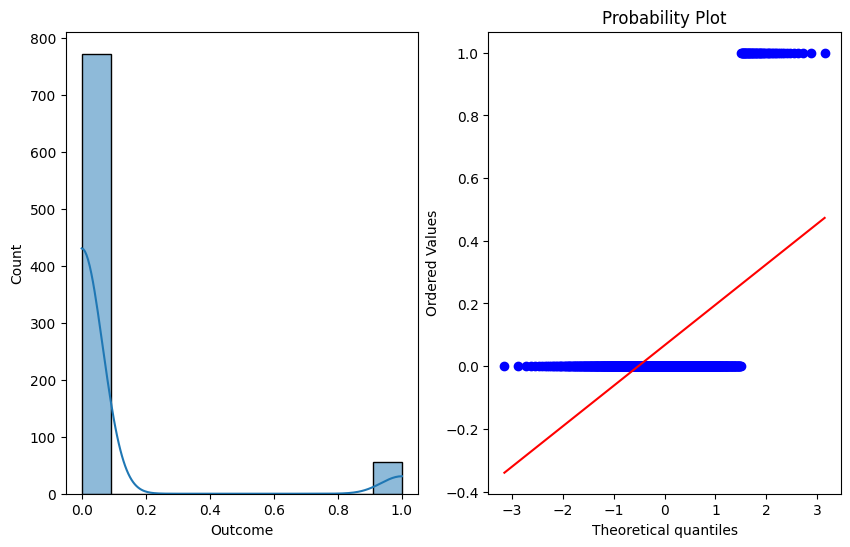

In [ ]:
print("Inconclusive % ",train[train['Outcome']==0].value_counts().sum()*100/len(train))
print("Active % ",train[train['Outcome']==1].value_counts().sum()*100/len(train))
plot_data(train,'Outcome')

 so as we can see the distribution is asymmetric , we need to balance the datset without
 hampering model performance

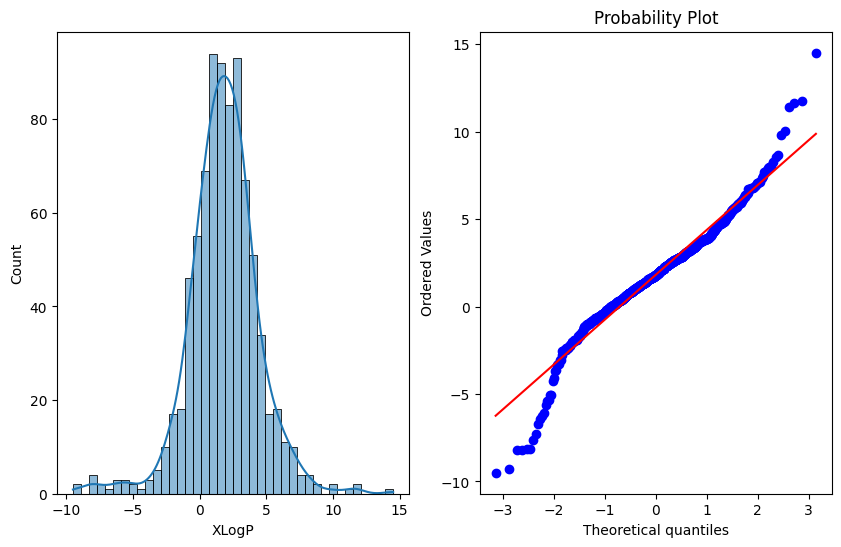

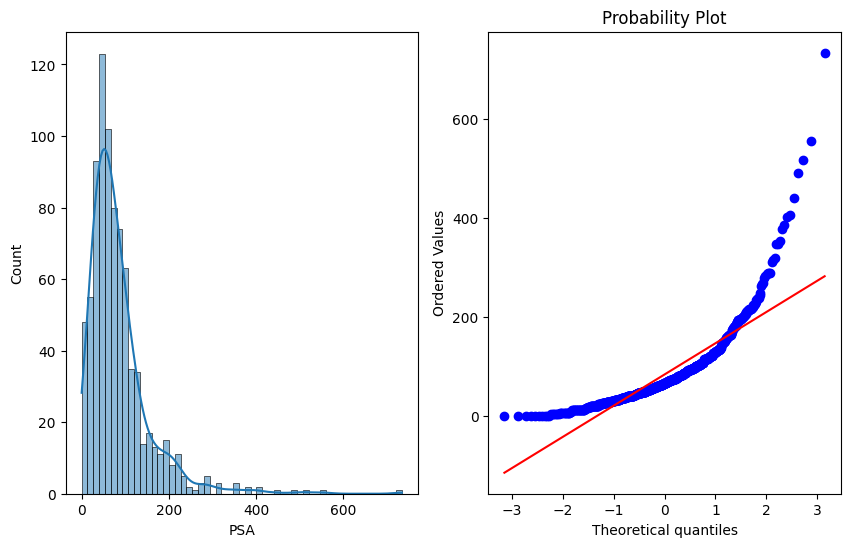

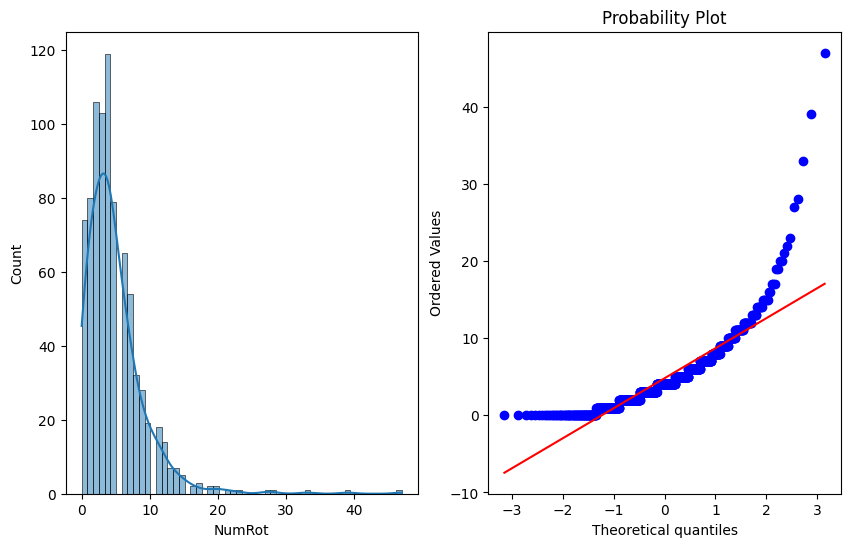

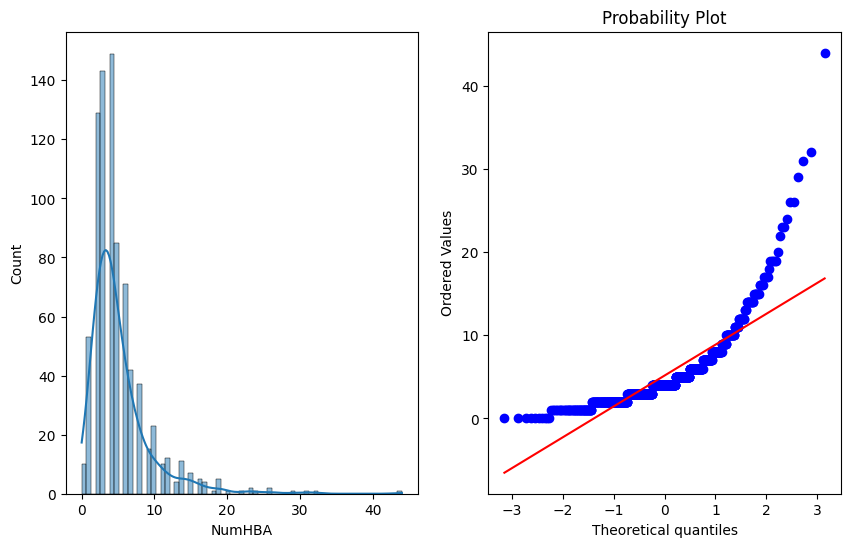

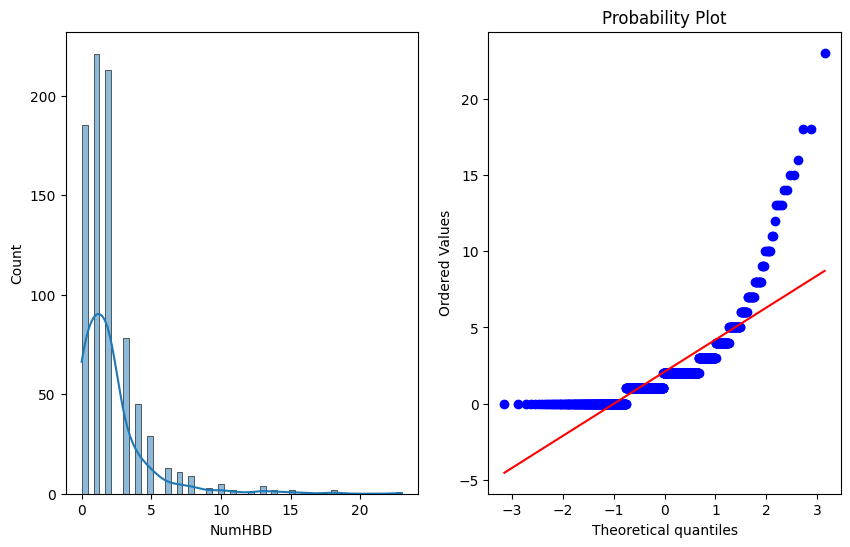

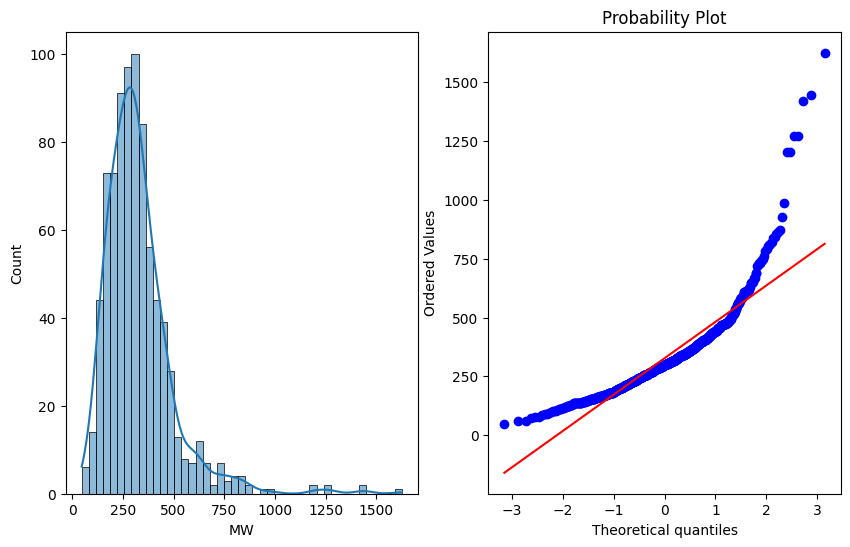

In [ ]:
for x in col_1:
    plot_data(train,x)

Let's break down the above code step by step:

print("Inconclusive % ",train[train['Outcome']==0].value_counts().sum()*100/len(train)): This line calculates and prints the percentage of observations where the 'Outcome' column is equal to 0 (assuming 'Outcome' is a binary variable). It first filters the 'train' DataFrame to include only rows where 'Outcome' is 0 (train[train['Outcome']==0]), then counts the number of occurrences of each unique combination of values in the DataFrame (value_counts()), sums up these counts (sum()), calculates the percentage by dividing by the total number of observations in the 'train' DataFrame, and finally prints the result.

print("Active % ",train[train['Outcome']==1].value_counts().sum()*100/len(train)): This line is similar to the previous one, but it calculates and prints the percentage of observations where the 'Outcome' column is equal to 1.

plot_data(train,'Outcome'): This line calls the plot_data function with the 'train' DataFrame and the column 'Outcome' as arguments. This function, as described earlier, plots a histogram with a KDE curve and a Q-Q plot side by side for the specified feature ('Outcome' in this case).

In summary, the code calculates the percentage of observations for each class of the 'Outcome' variable and then plots the distribution of the 'Outcome' variable using the plot_data function.

The two plots generated by the plot_data function provide different insights into the distribution of the data:

Histogram with KDE Curve:

The histogram provides a visual representation of the distribution of the data for the specified feature.
The KDE curve (Kernel Density Estimate) is an estimate of the probability density function of the data. It smooths out the histogram and provides a continuous representation of the data distribution.
Interpretation:
The histogram shows the frequency or count of data points within different intervals or bins along the x-axis.
Peaks in the histogram indicate where the data is most concentrated, while valleys indicate where it is less concentrated.
The KDE curve provides additional information about the shape and smoothness of the distribution, helping to identify patterns such as multimodality or skewness.
Q-Q Plot (Quantile-Quantile Plot):

The Q-Q plot compares the quantiles of the data to the quantiles of a theoretical distribution (in this case, the normal distribution).
If the data follows the theoretical distribution closely, the points in the Q-Q plot will fall approximately along a diagonal line.
Deviations from the diagonal line indicate differences between the empirical distribution of the data and the theoretical distribution.
Interpretation:
If the points in the Q-Q plot closely follow the diagonal line, it suggests that the data is normally distributed or approximately follows the specified theoretical distribution.
Deviations from the diagonal line indicate departures from normality or differences in distribution shape. For example, if the points curve upward or downward, it suggests skewness in the data. If the points form distinct clusters or patterns, it suggests multimodality or other departures from normality.
Overall, these plots provide complementary insights into the distribution of the data, allowing for visual assessment of central tendency, spread, shape, and departure from theoretical assumptions such as normality.

So except XlogP rest are right/positive skewed distribution , we can make them normal by using
1. square root
2. cube root
3. log

# Outlier check for each column.

## Box plot or each of the columns in the train dataset.

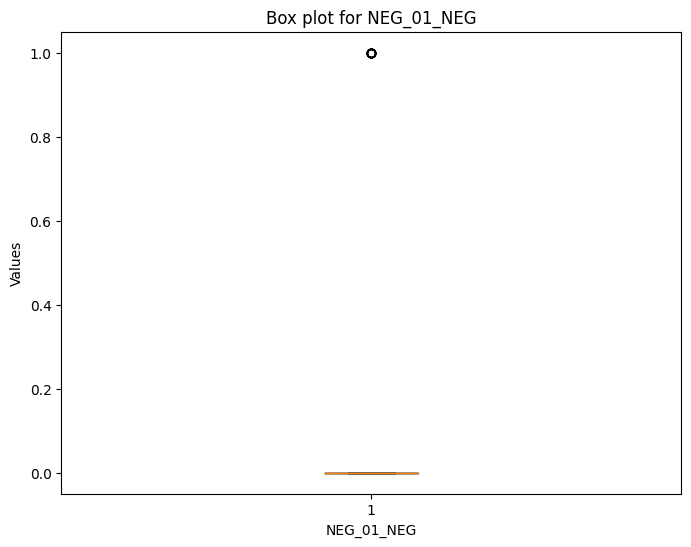

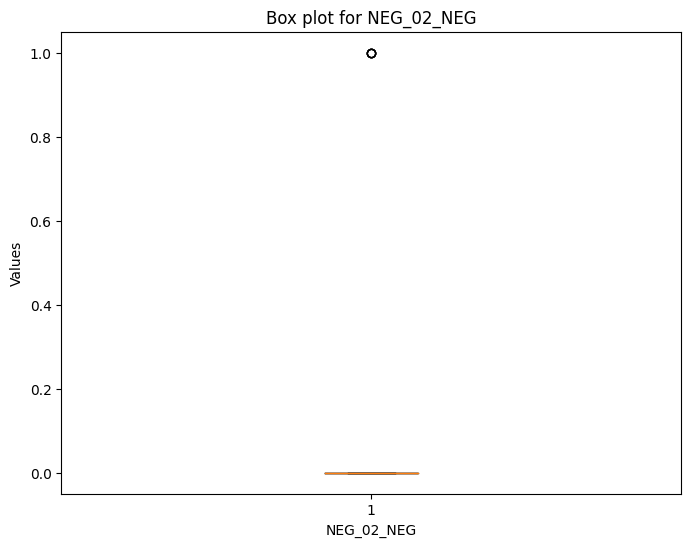

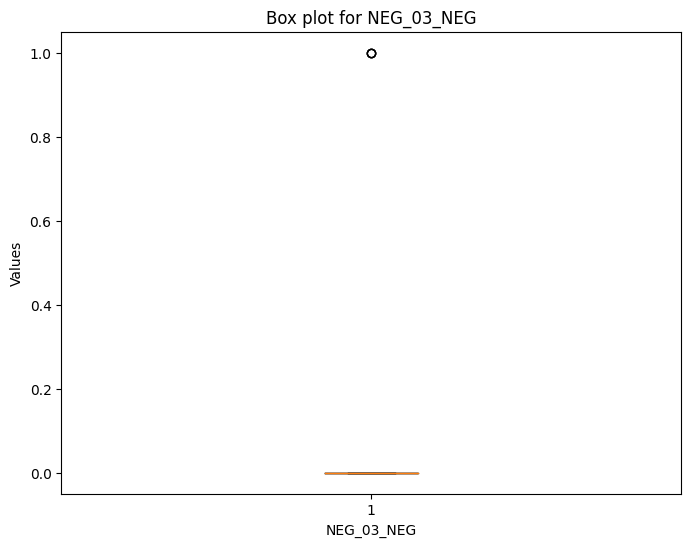

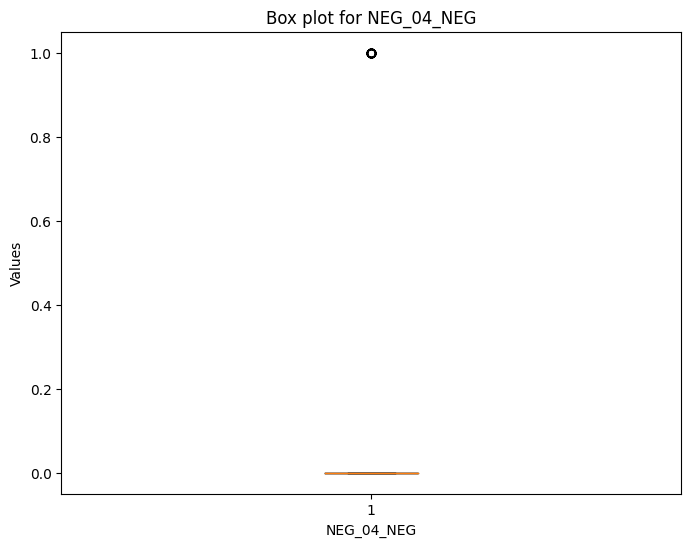

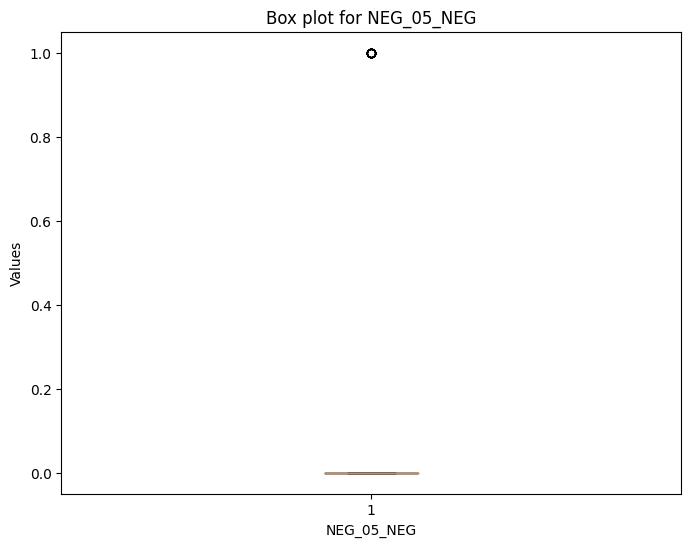

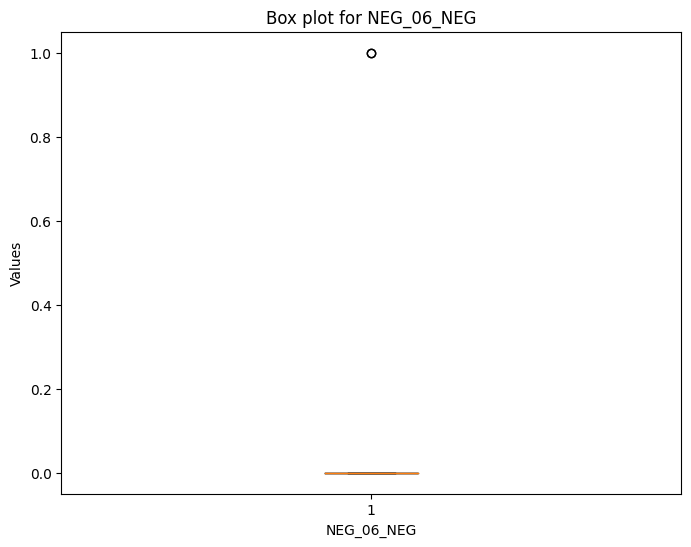

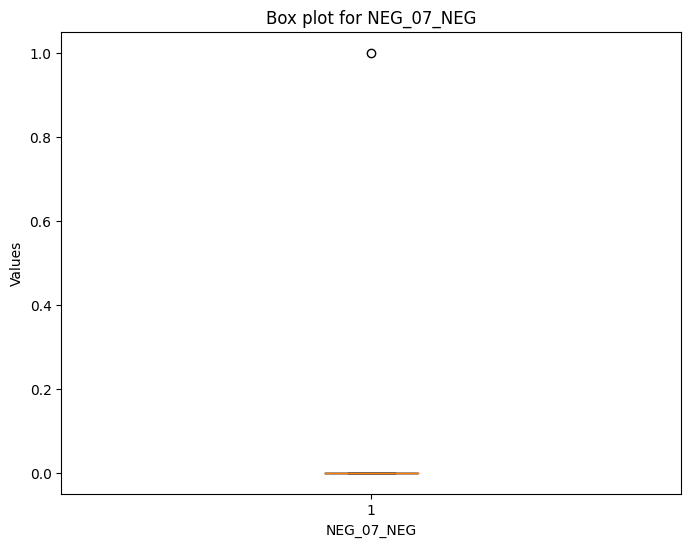

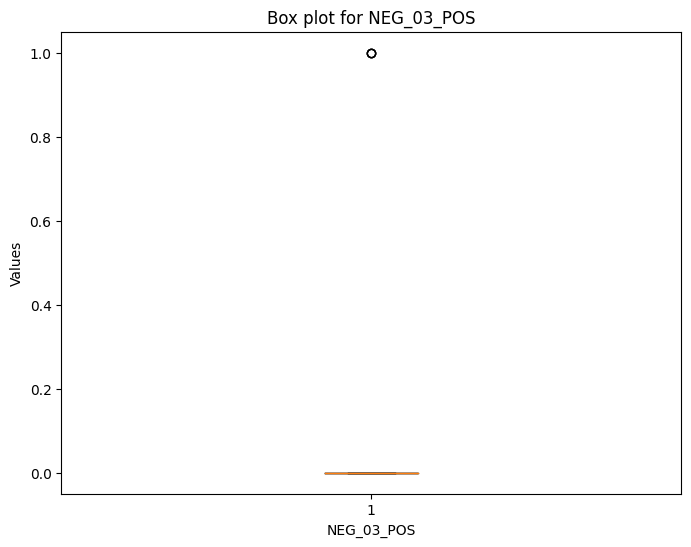

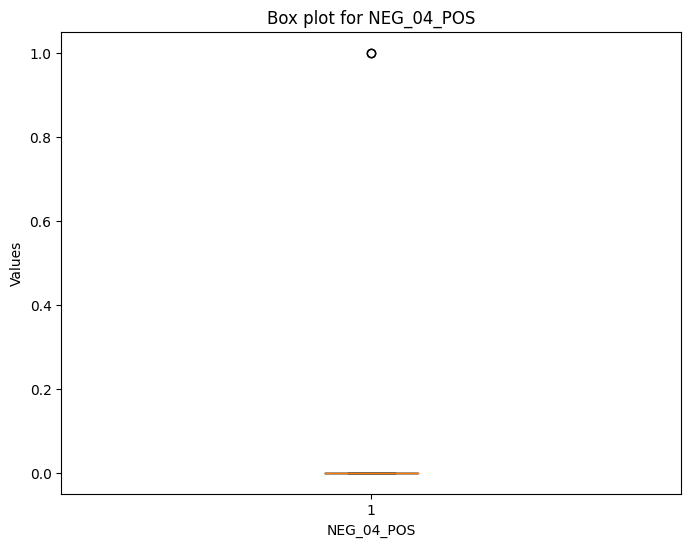

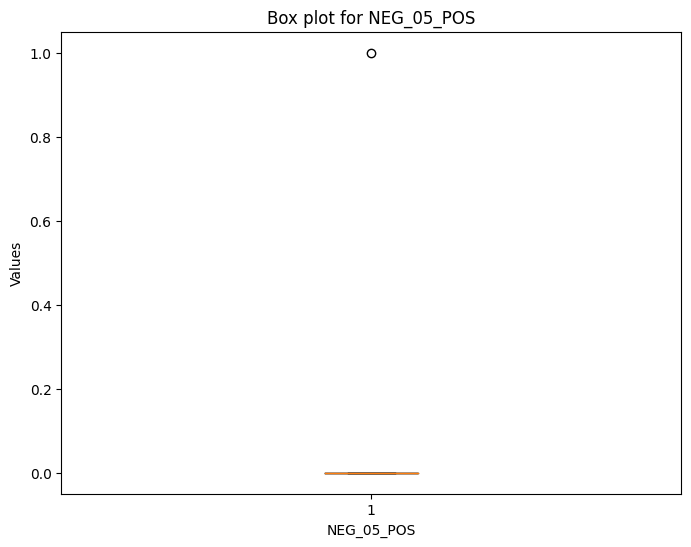

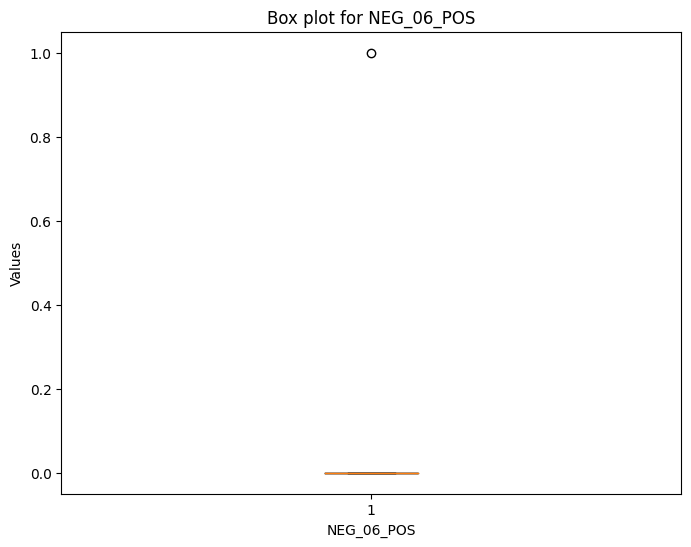

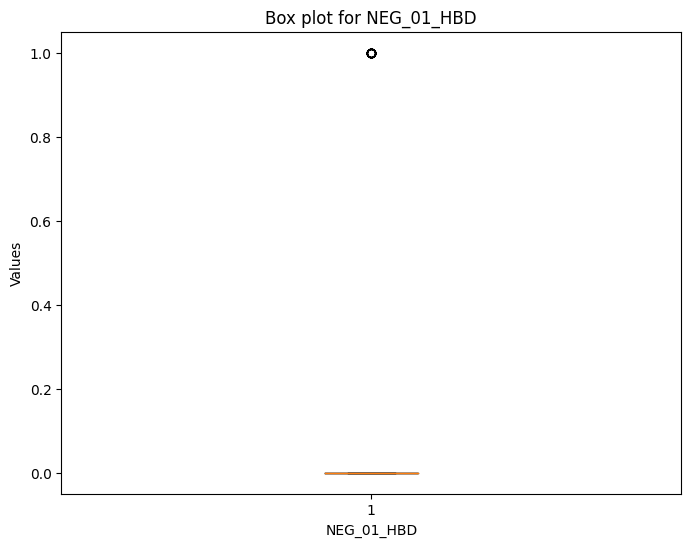

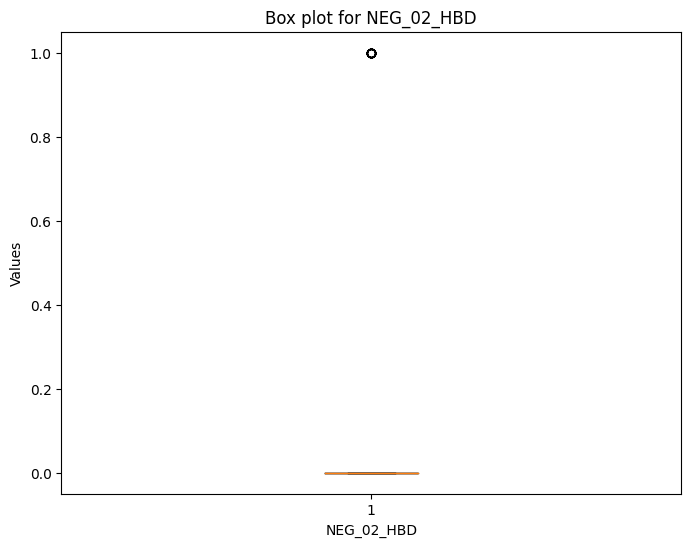

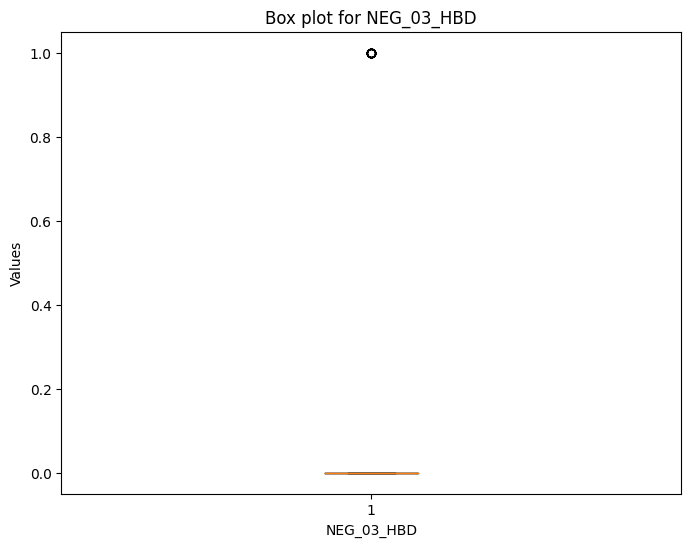

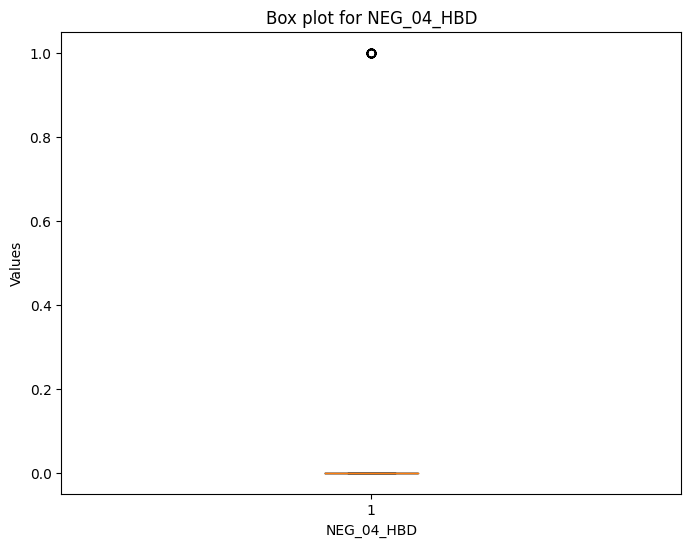

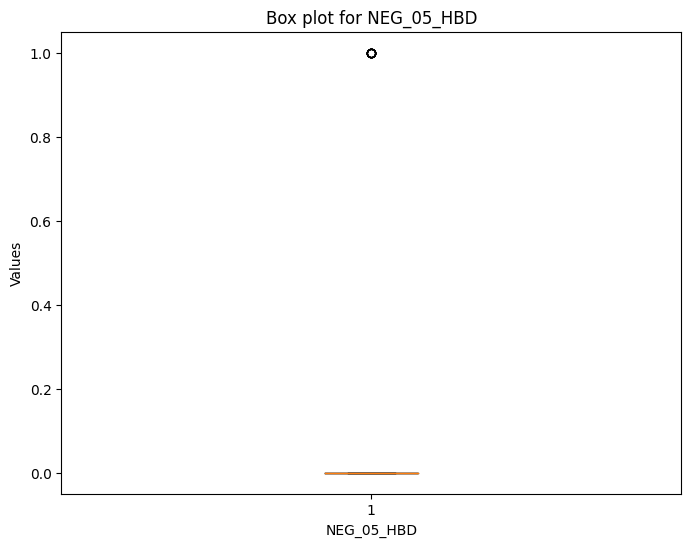

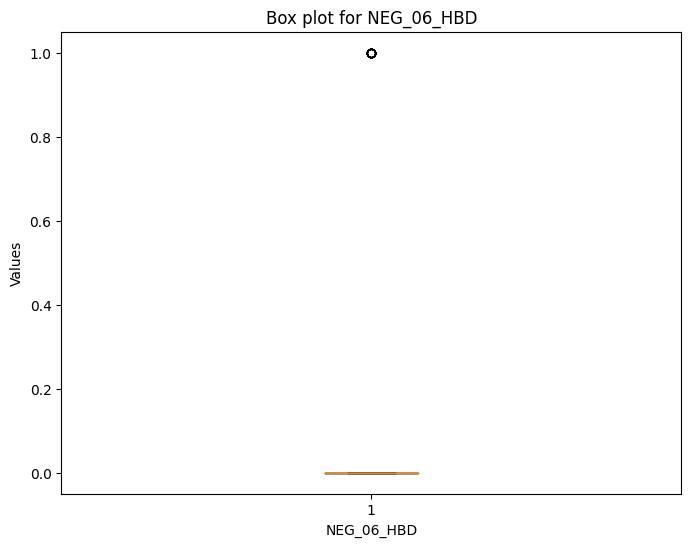

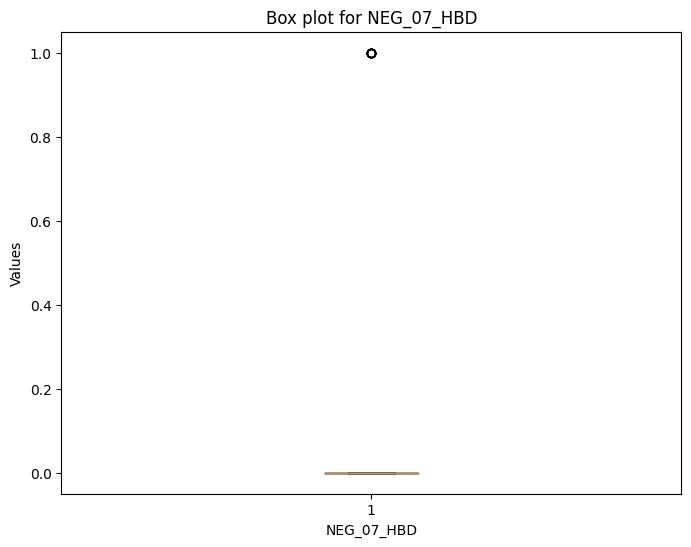

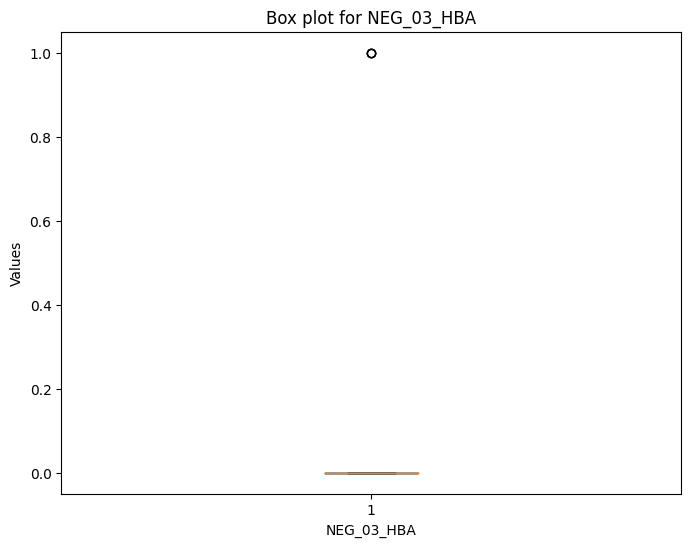

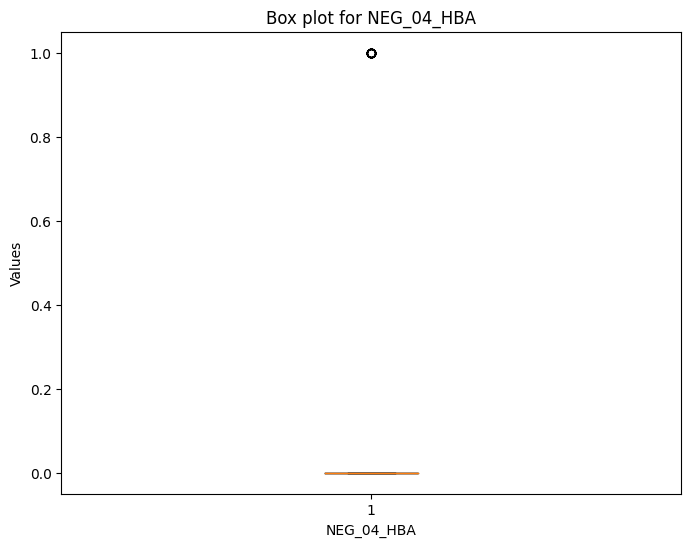

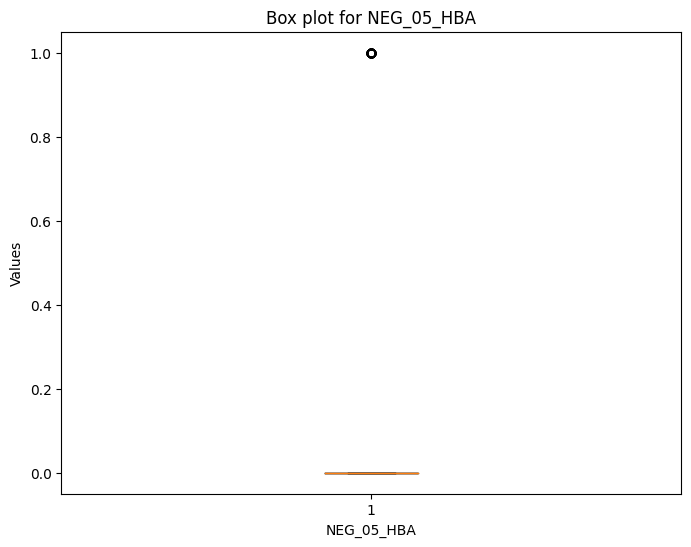

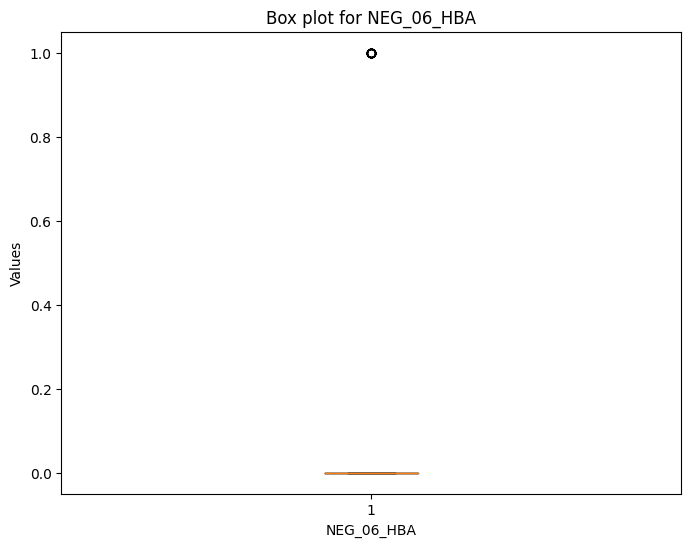

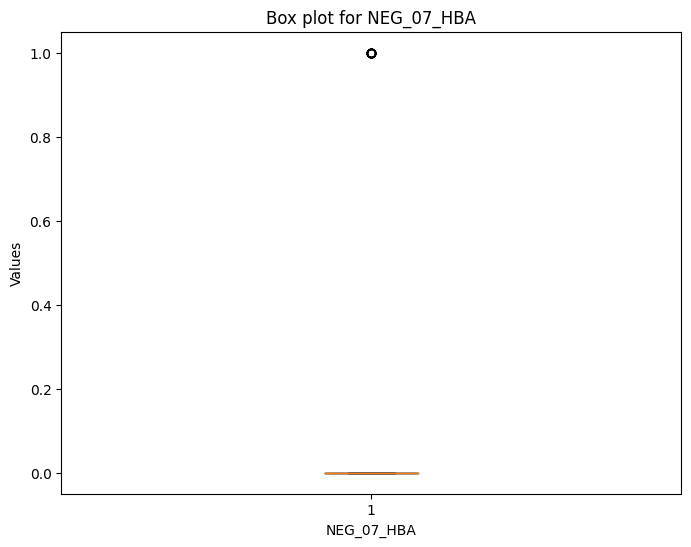

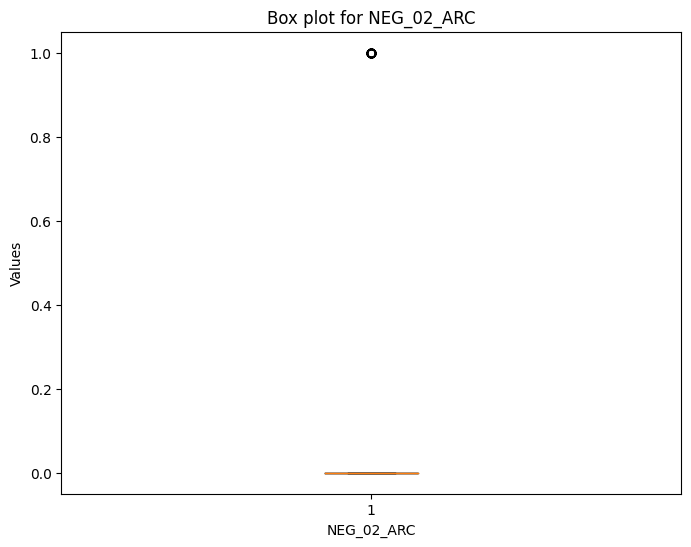

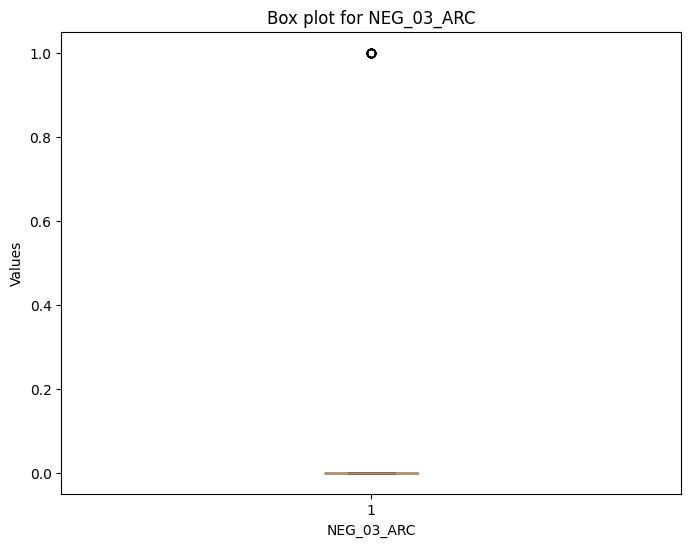

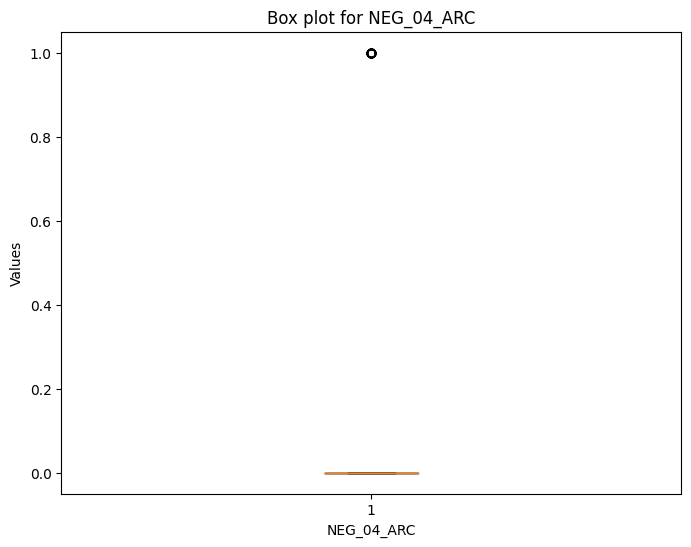

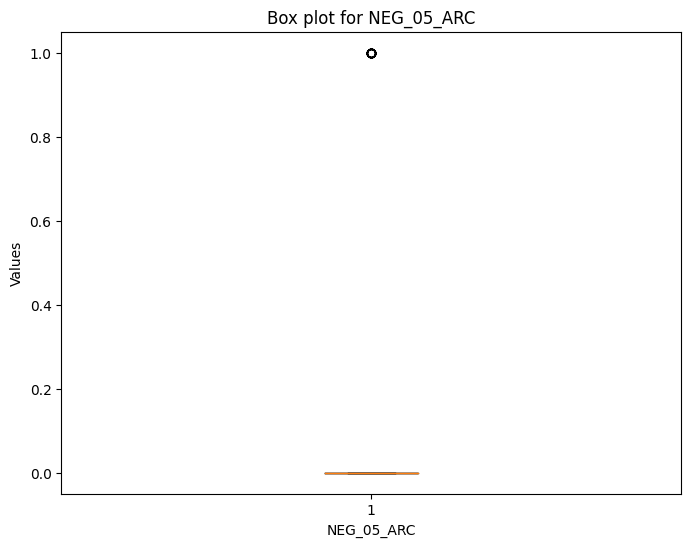

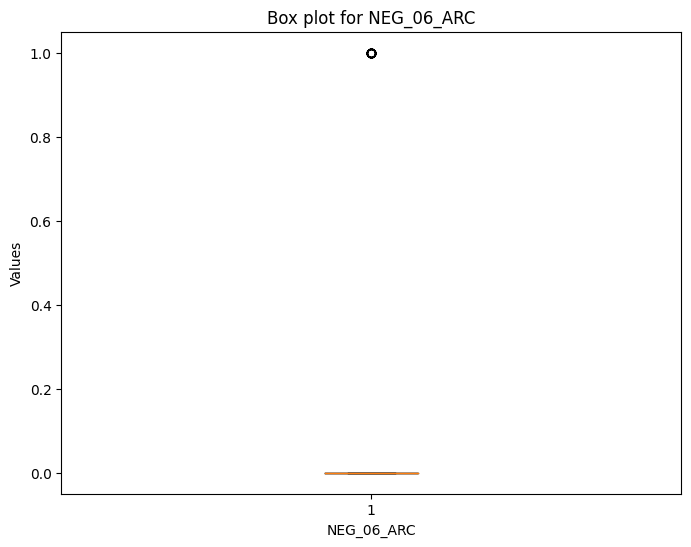

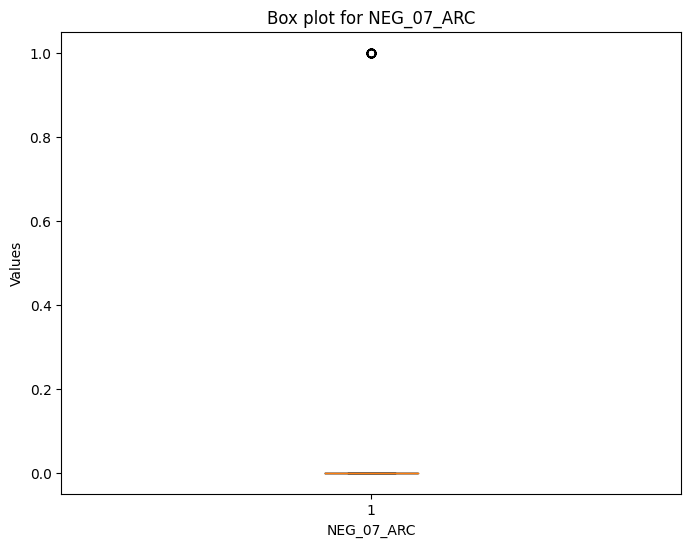

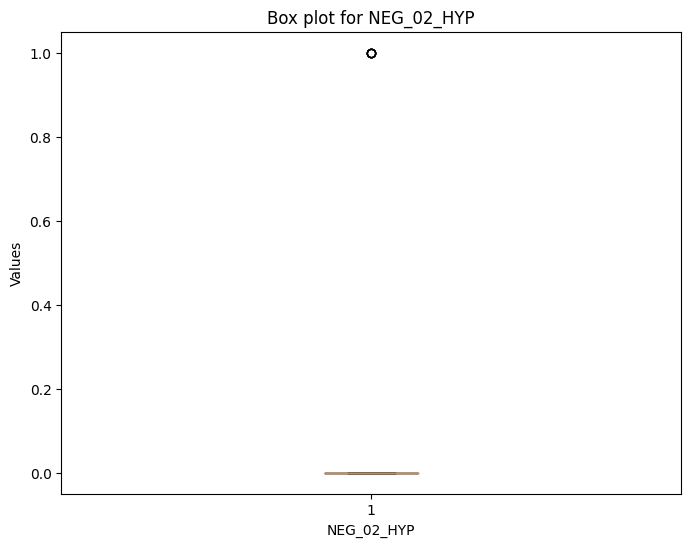

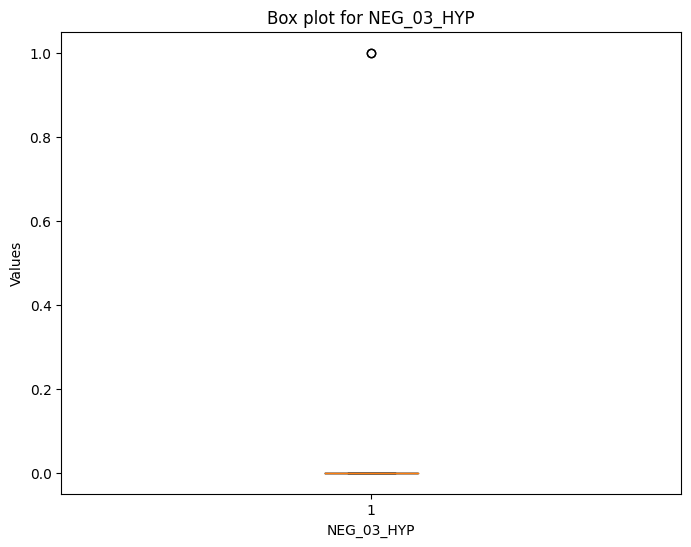

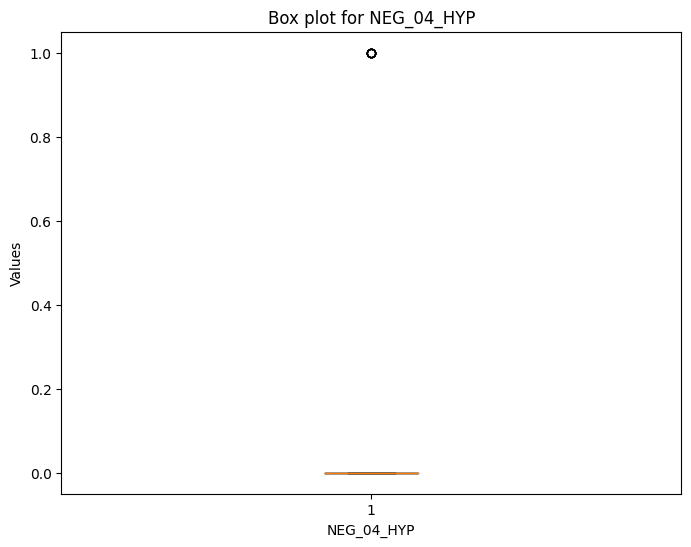

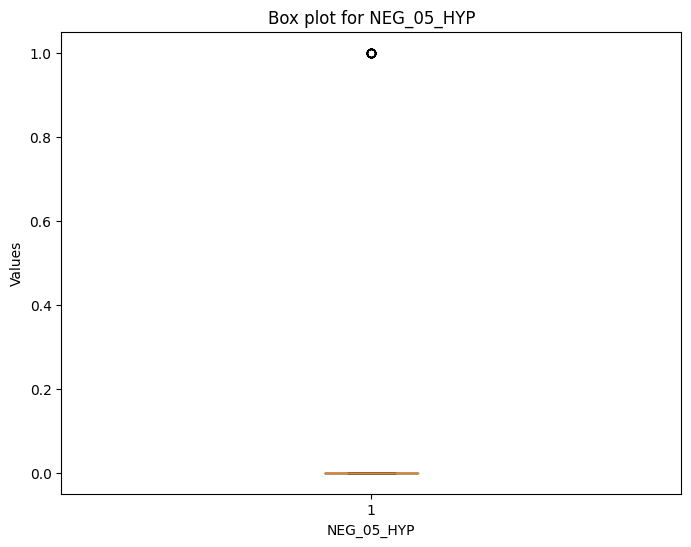

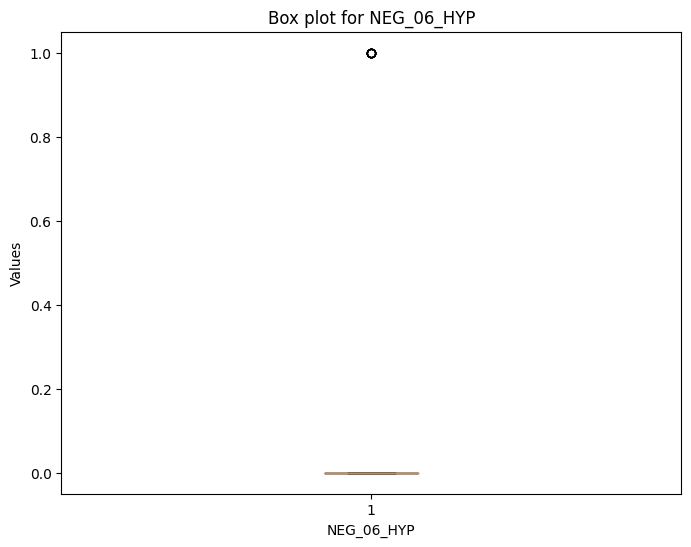

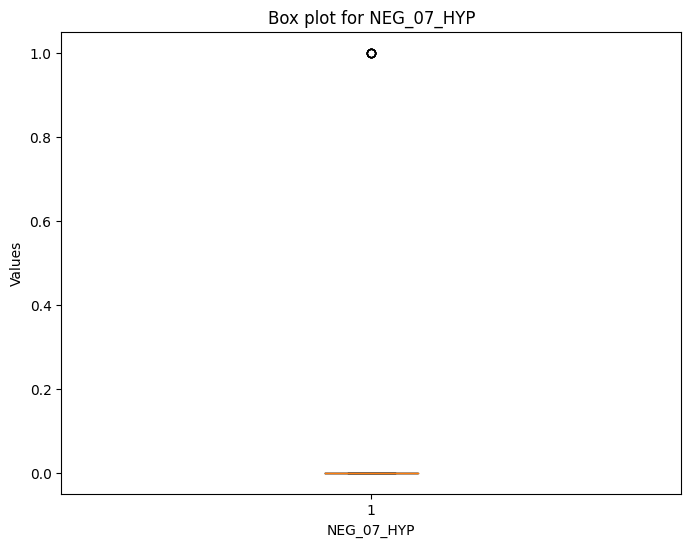

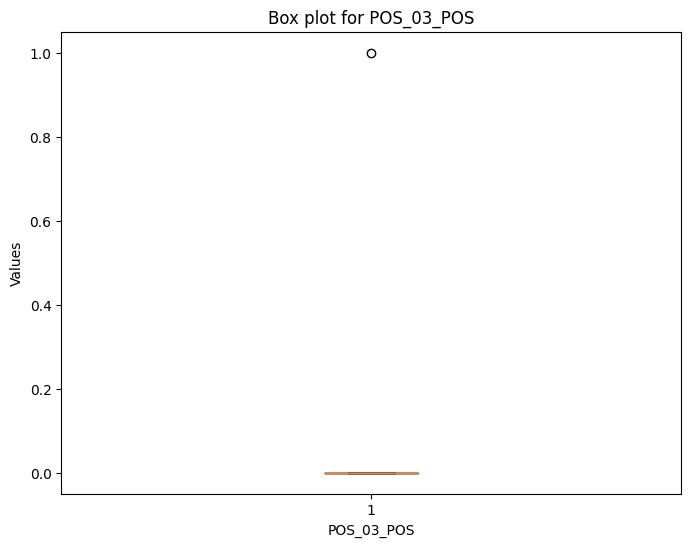

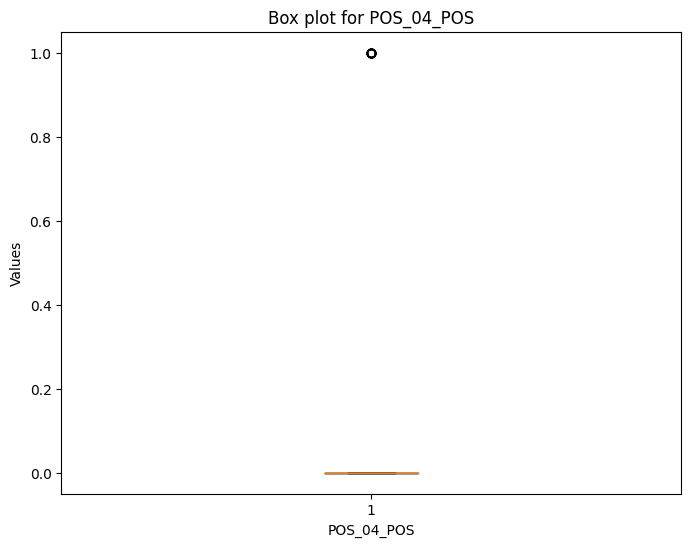

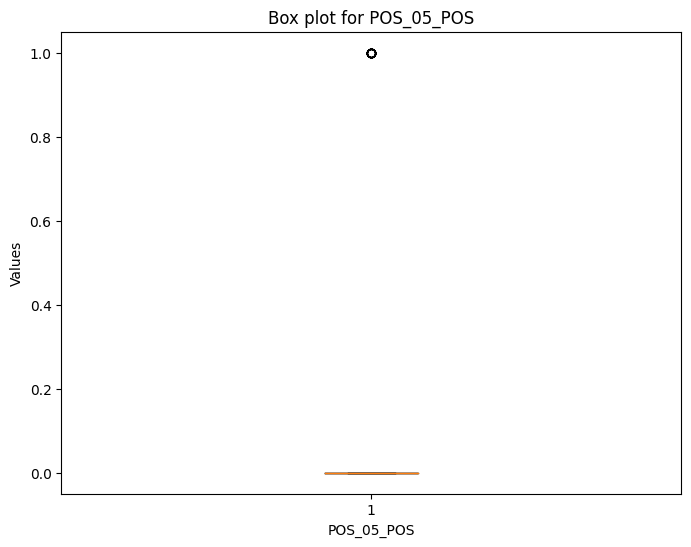

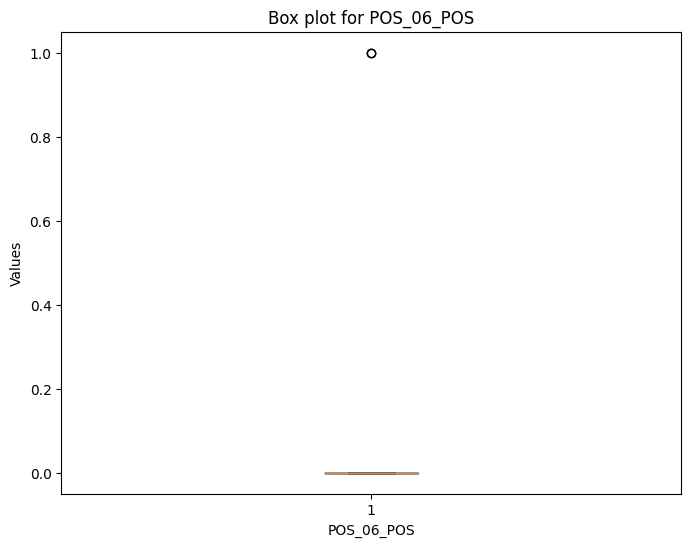

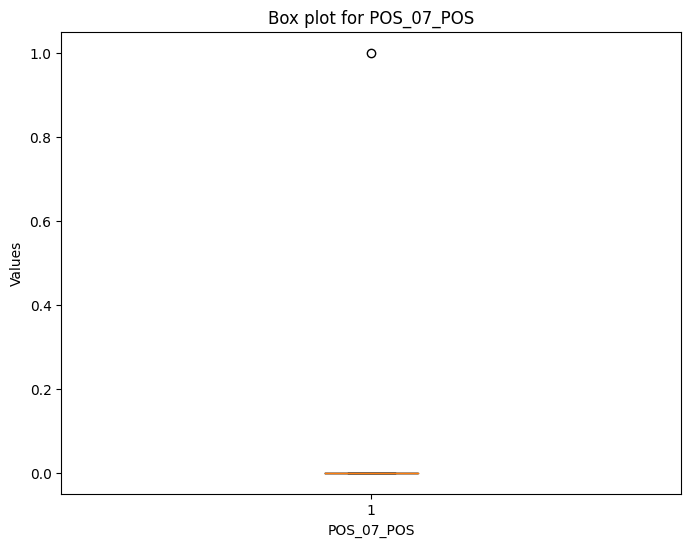

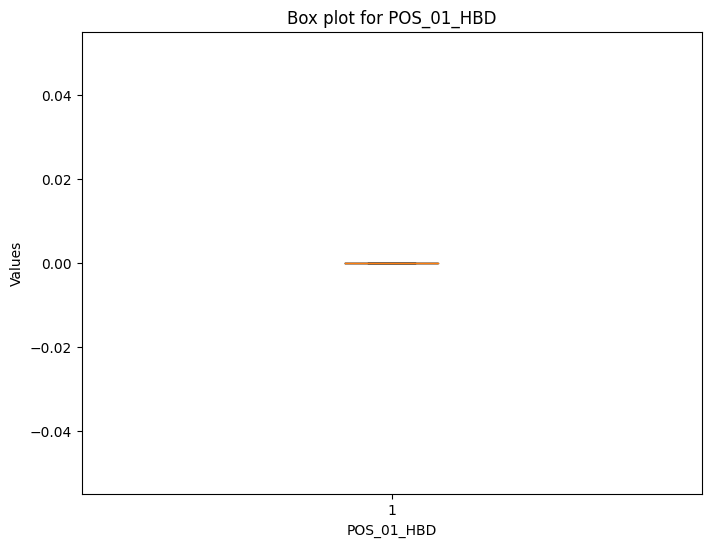

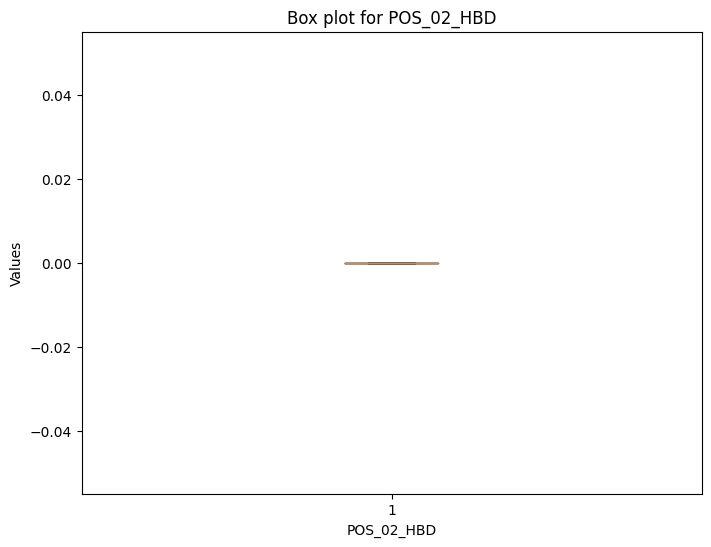

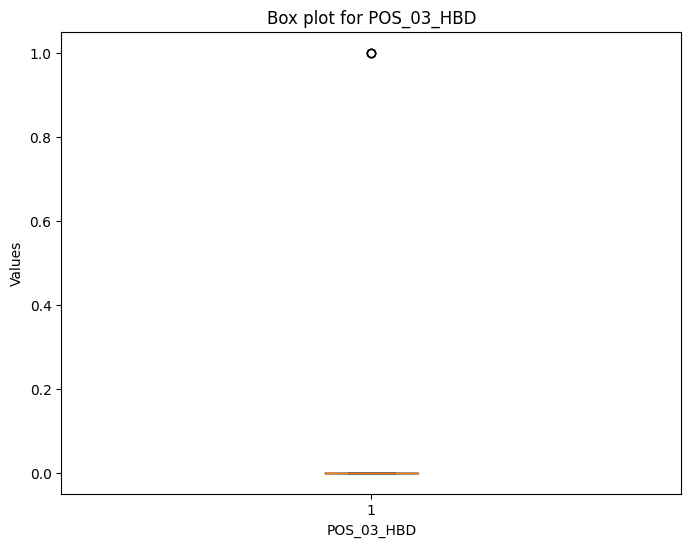

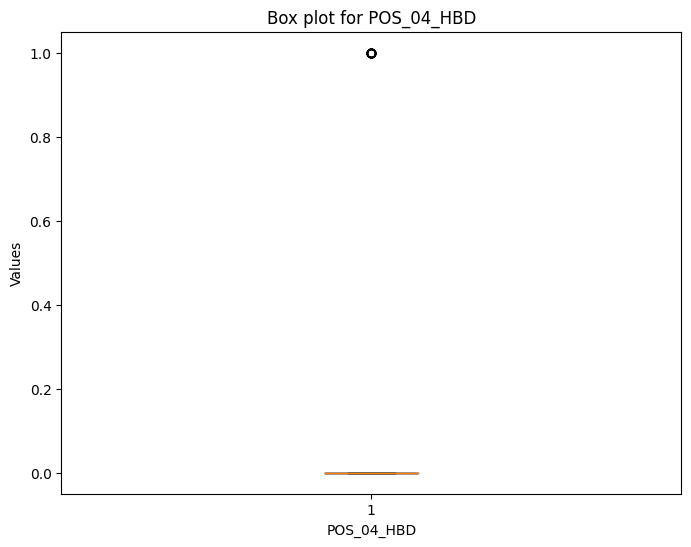

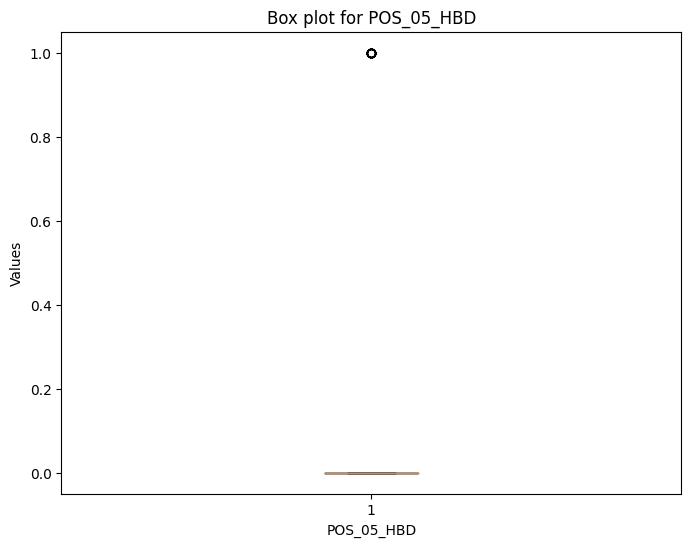

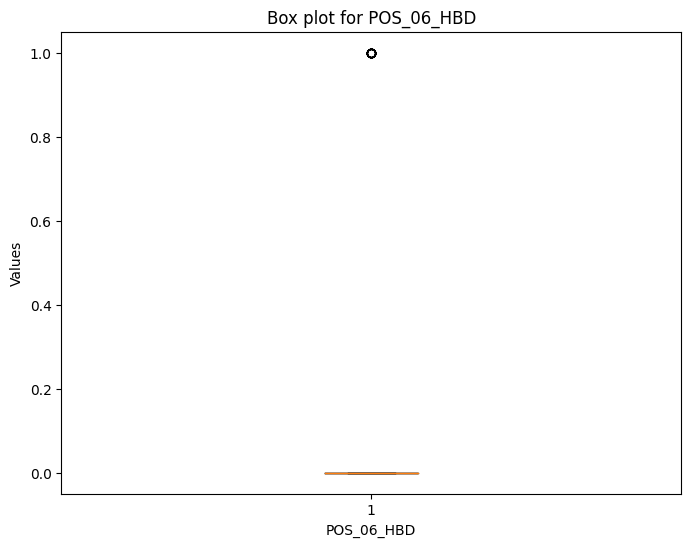

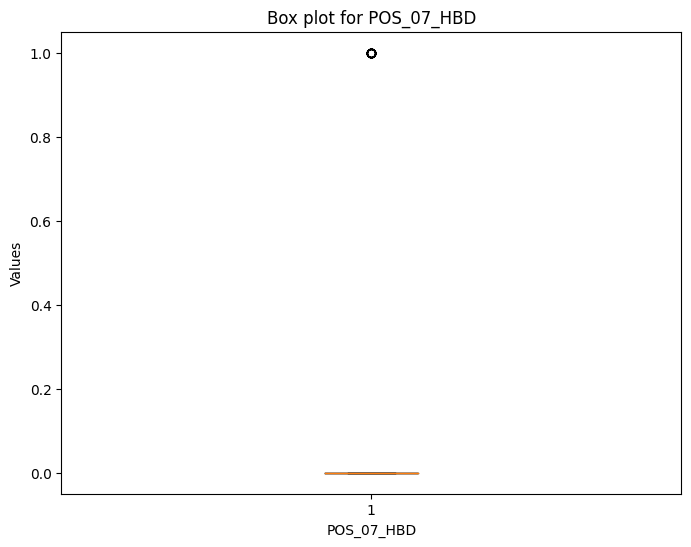

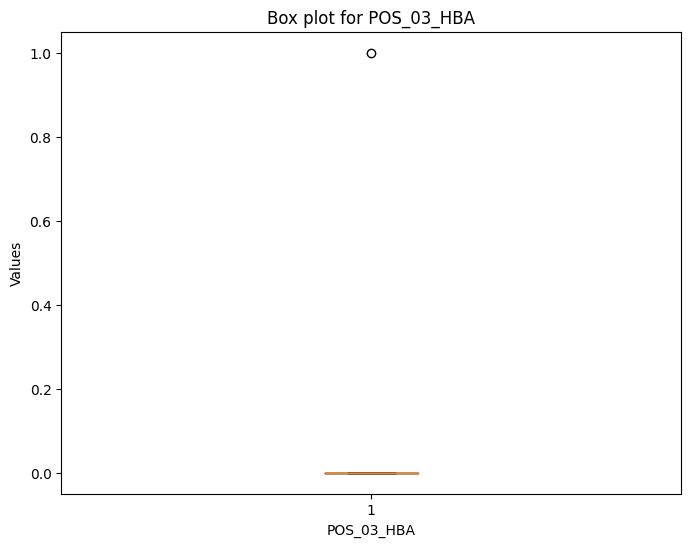

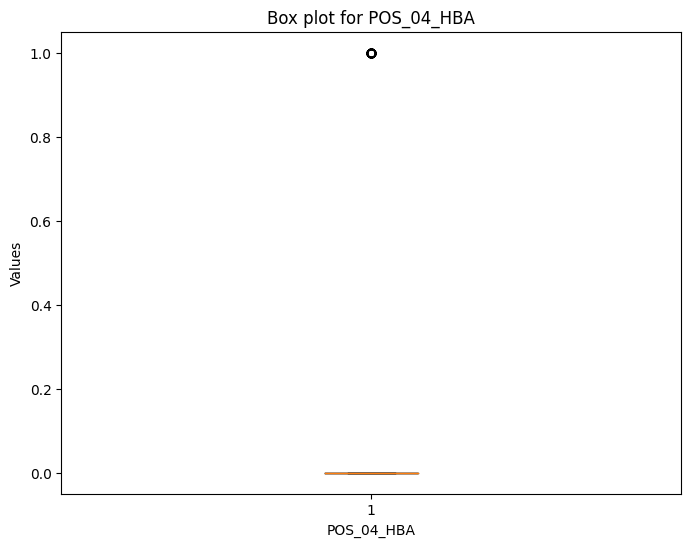

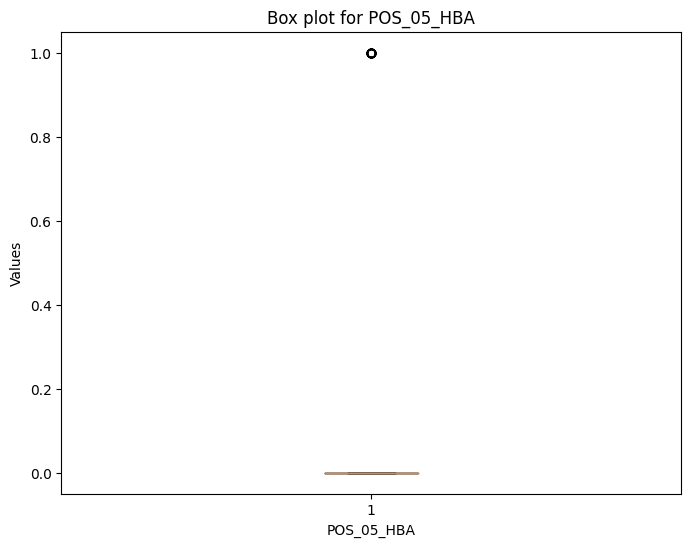

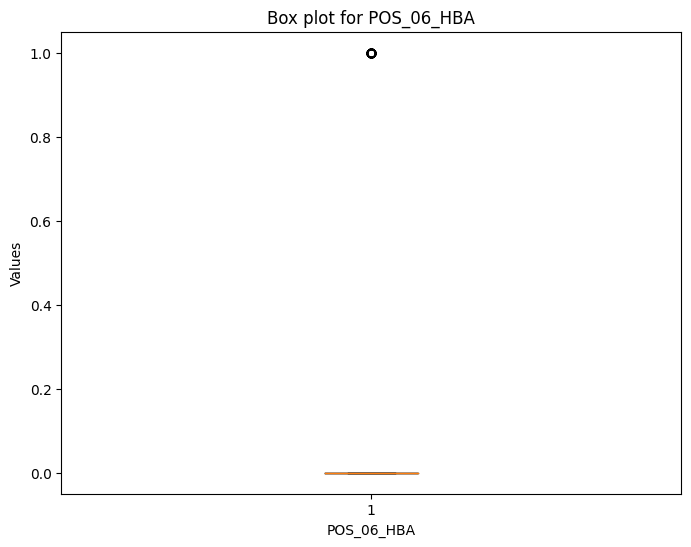

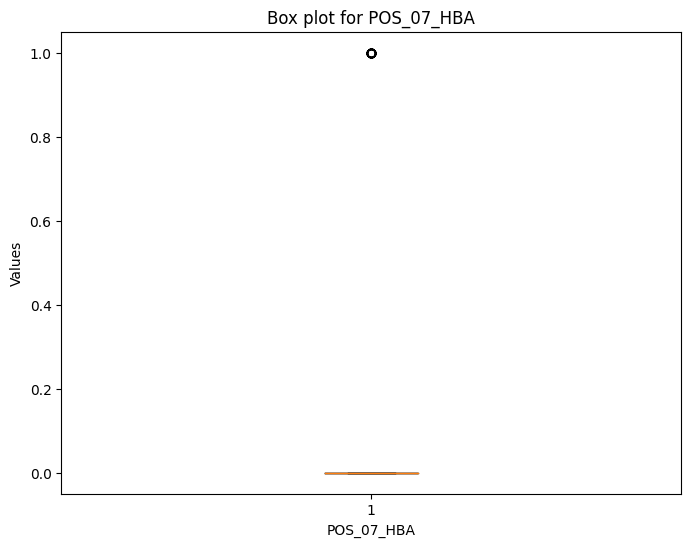

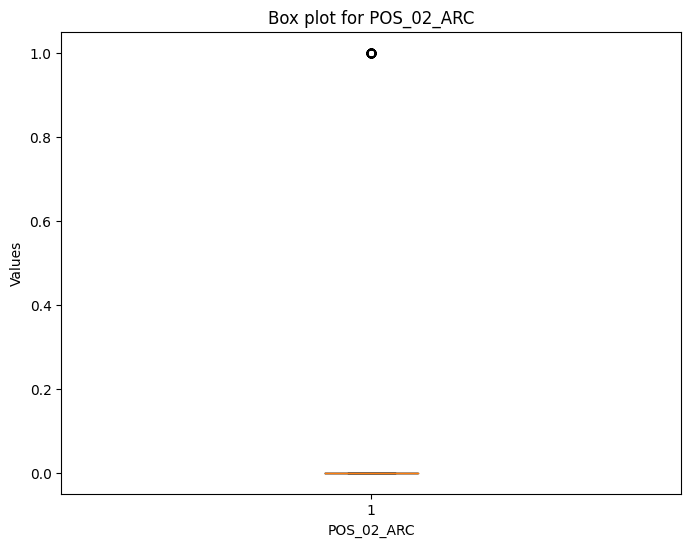

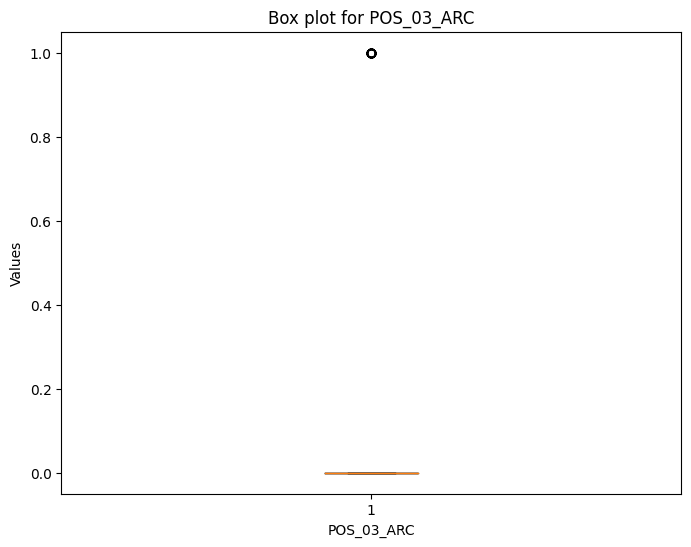

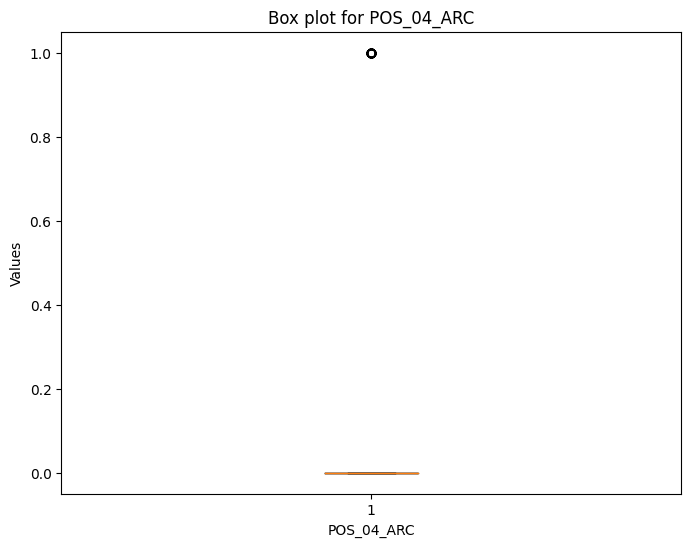

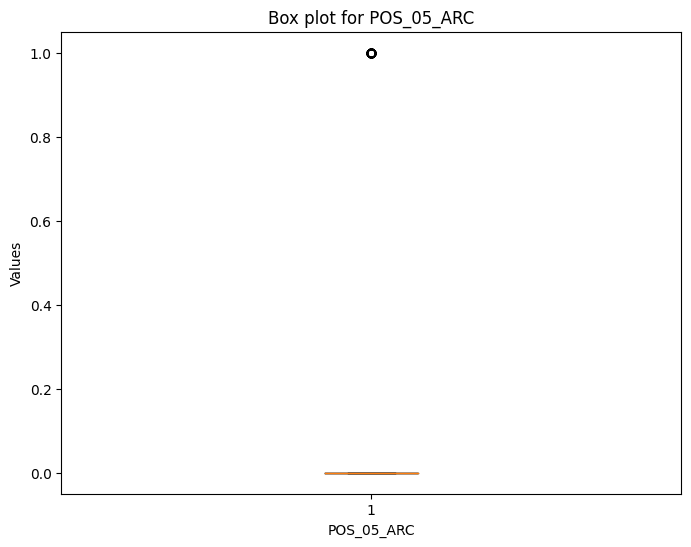

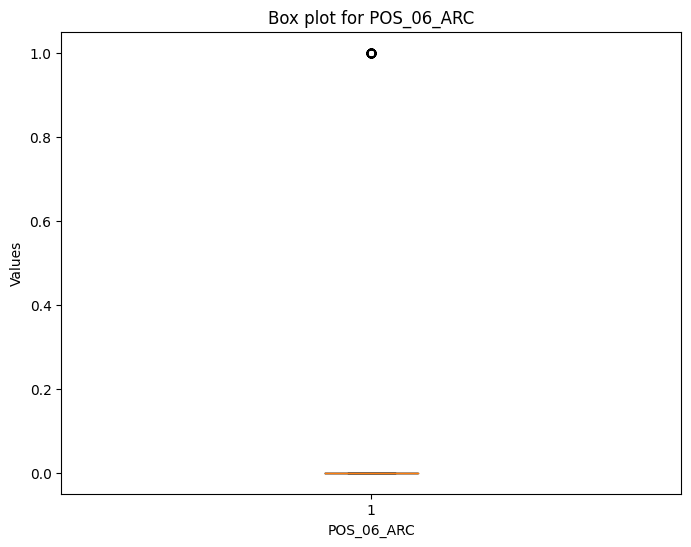

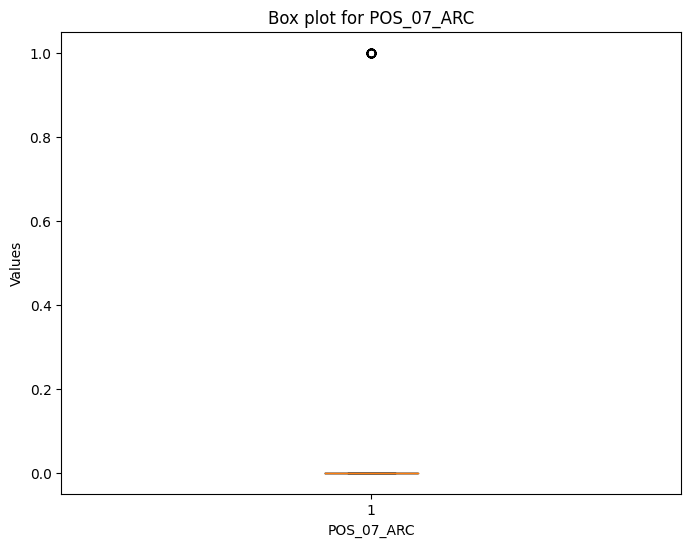

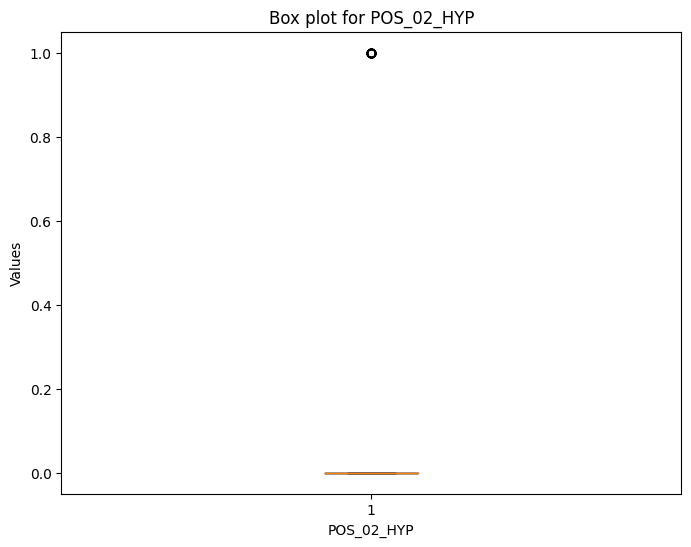

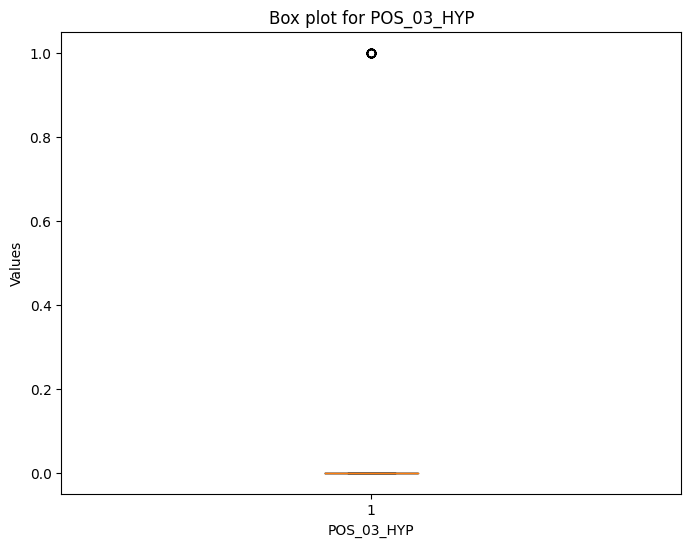

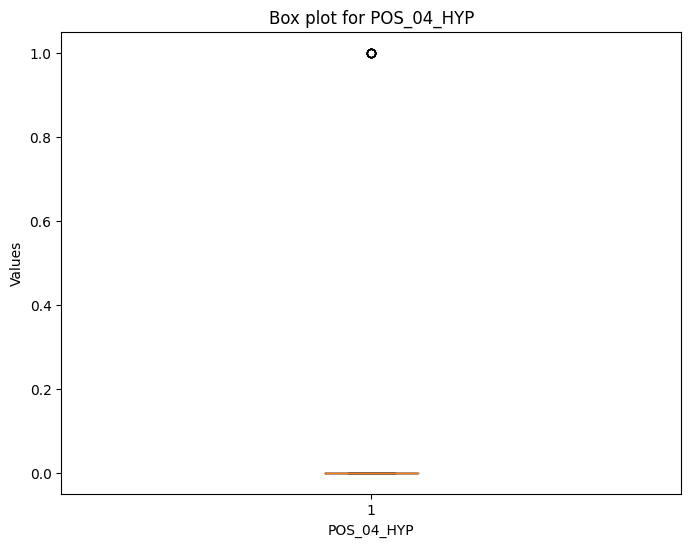

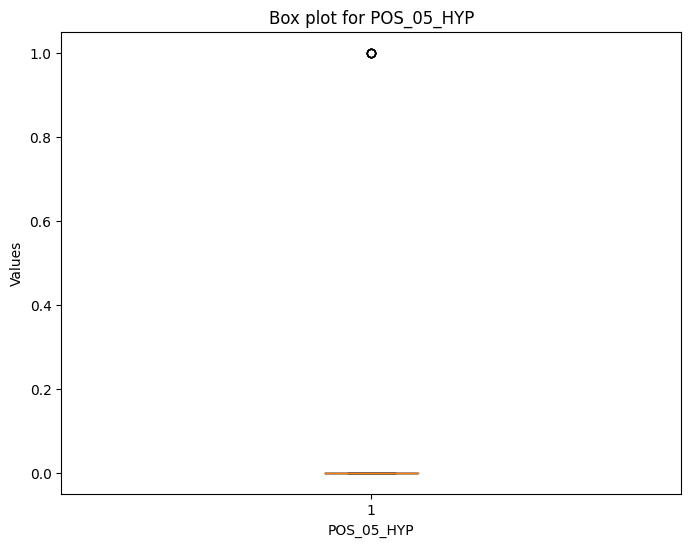

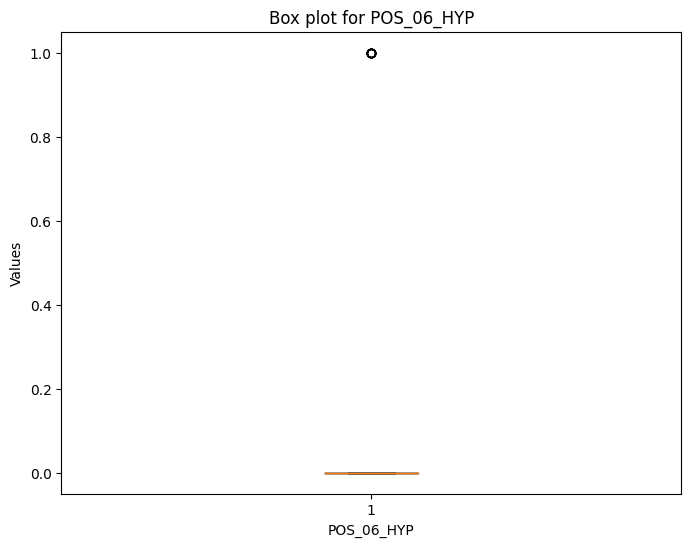

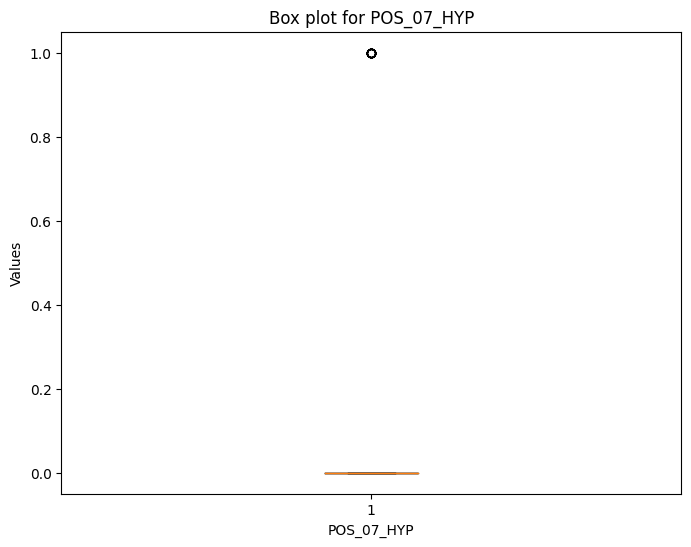

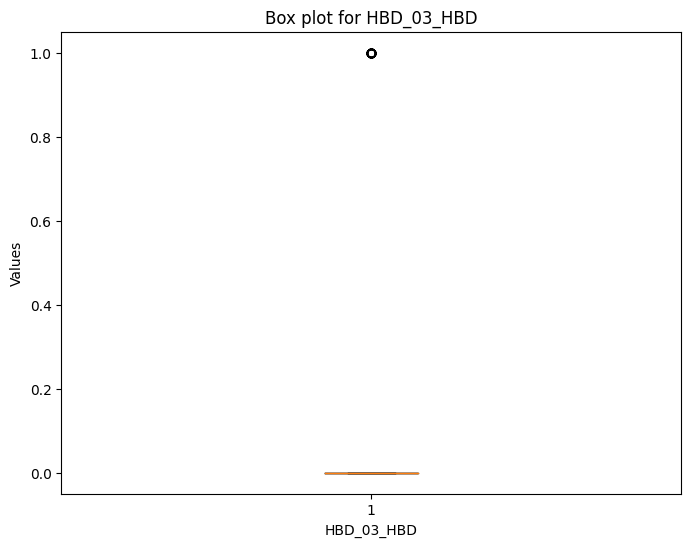

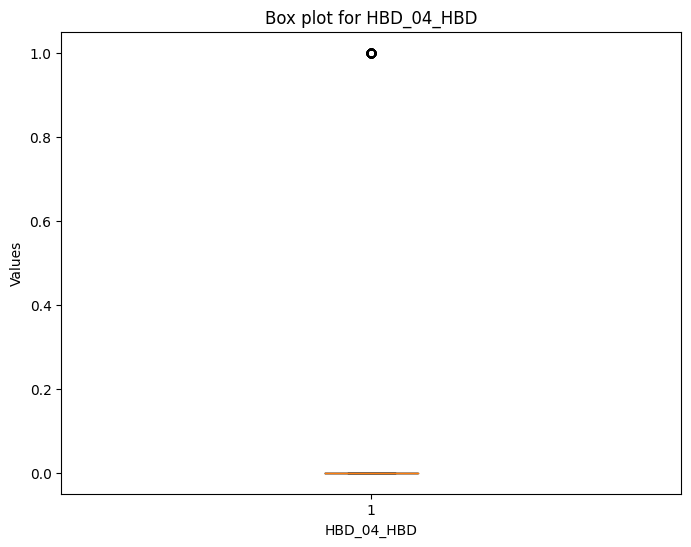

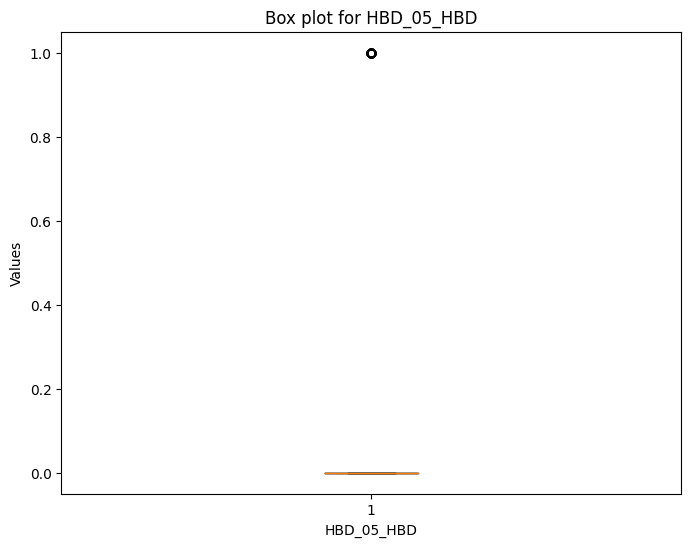

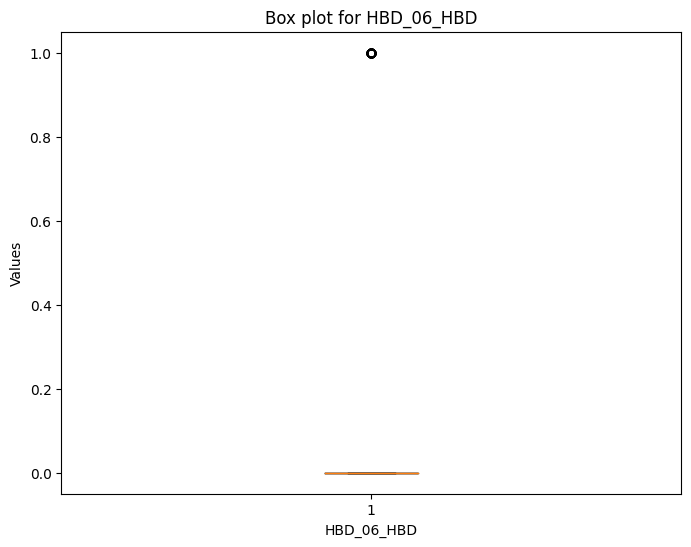

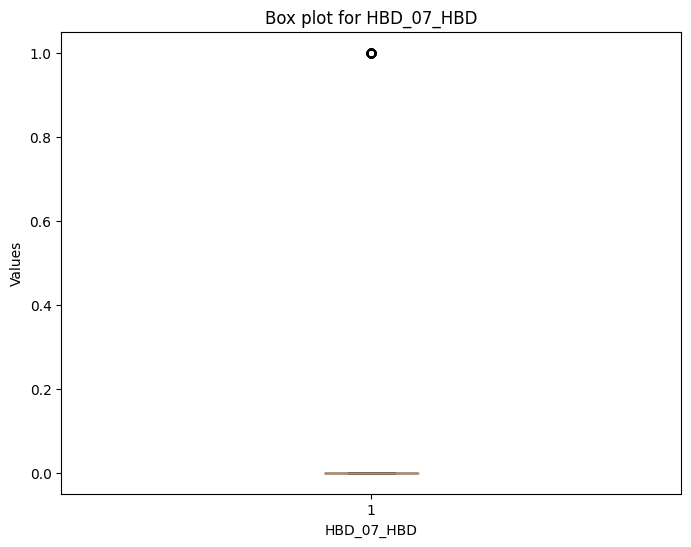

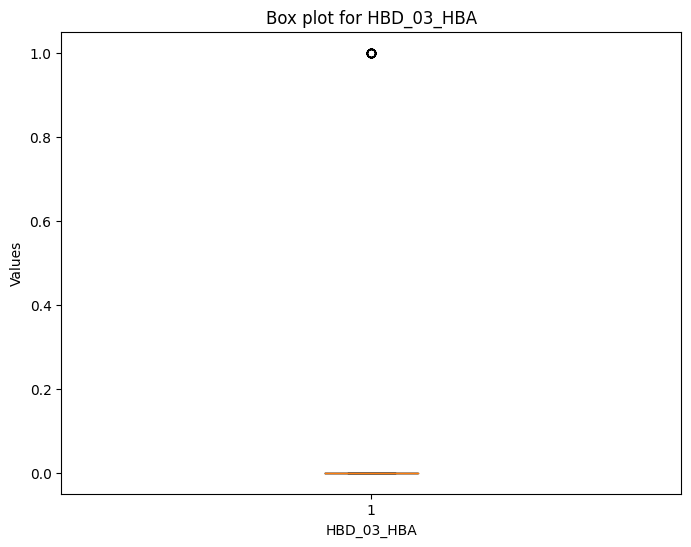

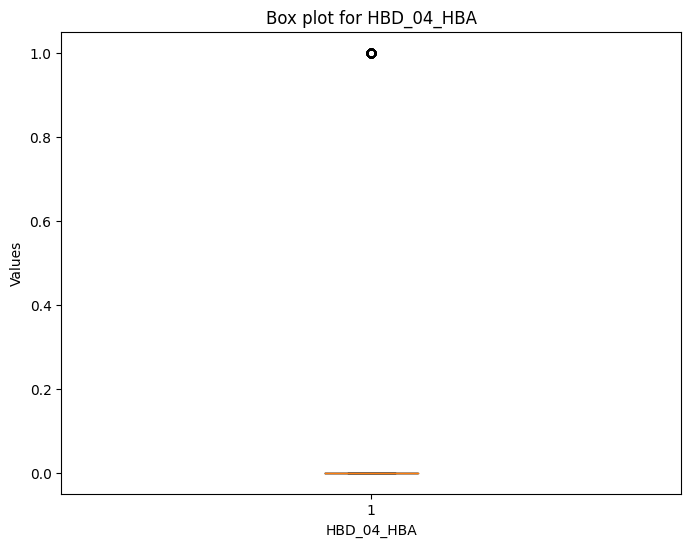

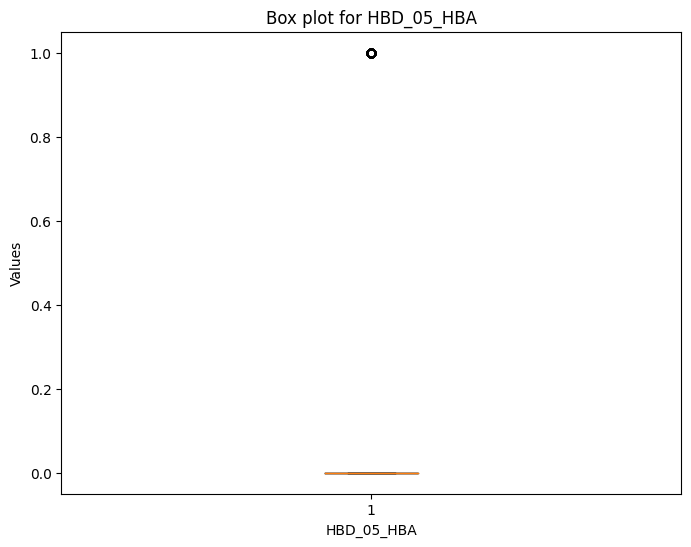

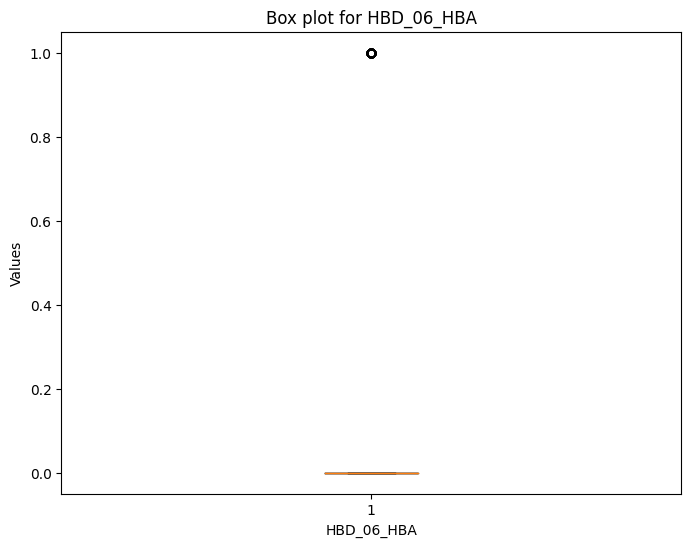

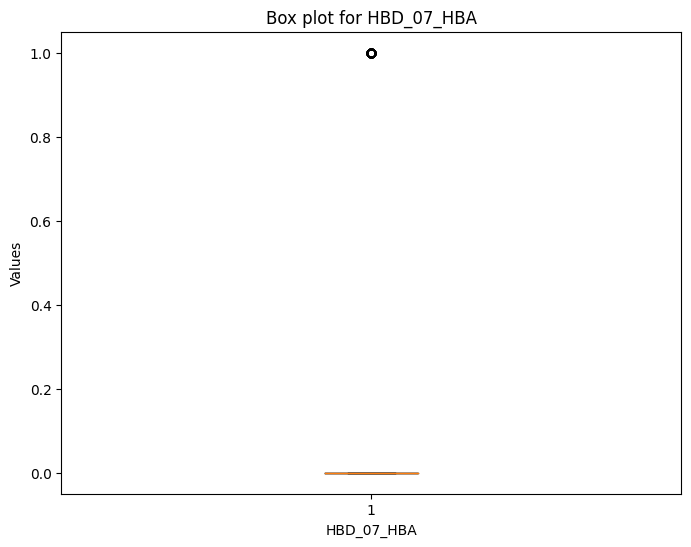

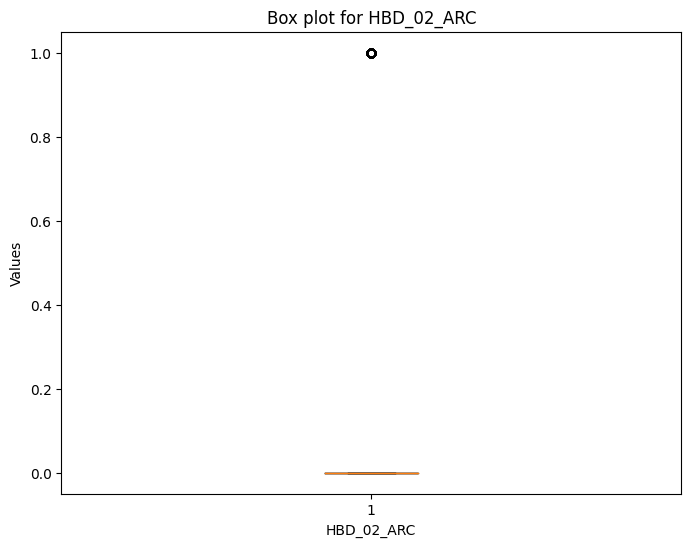

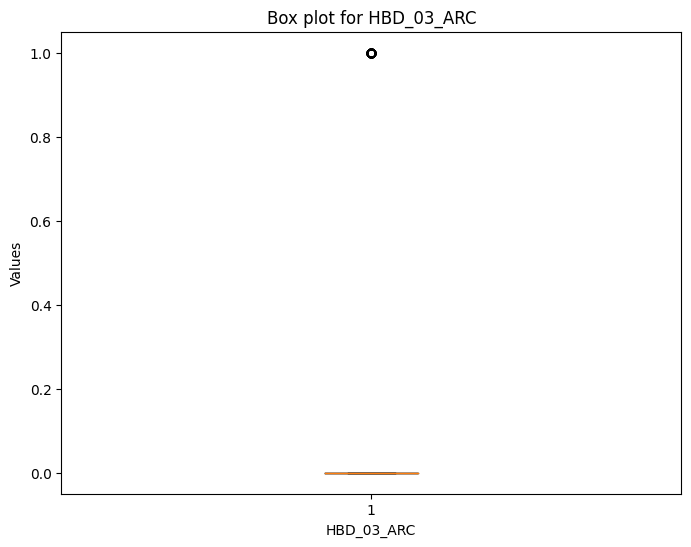

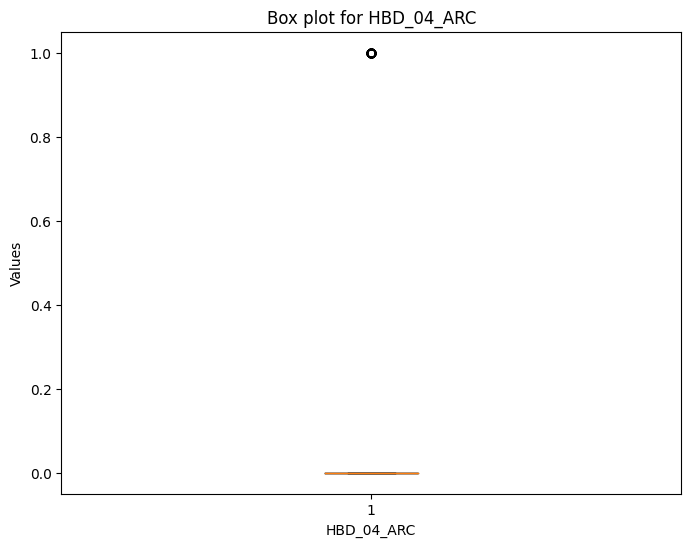

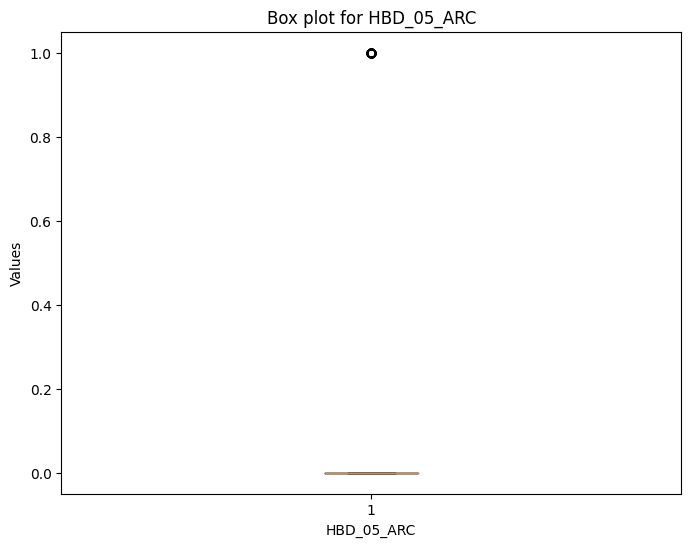

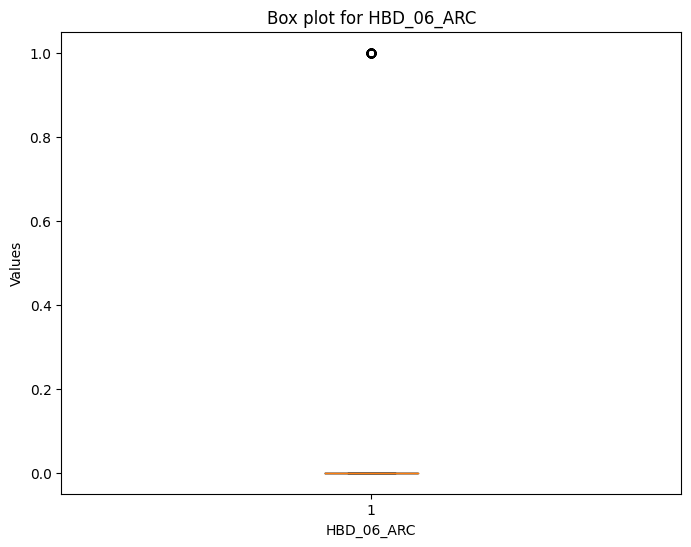

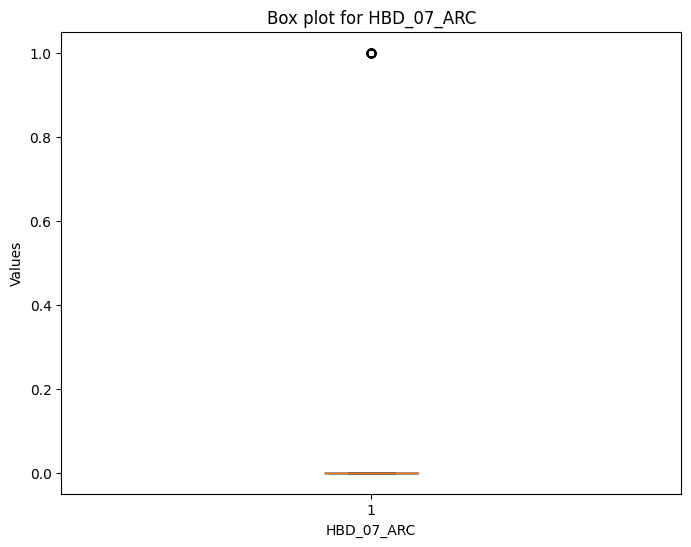

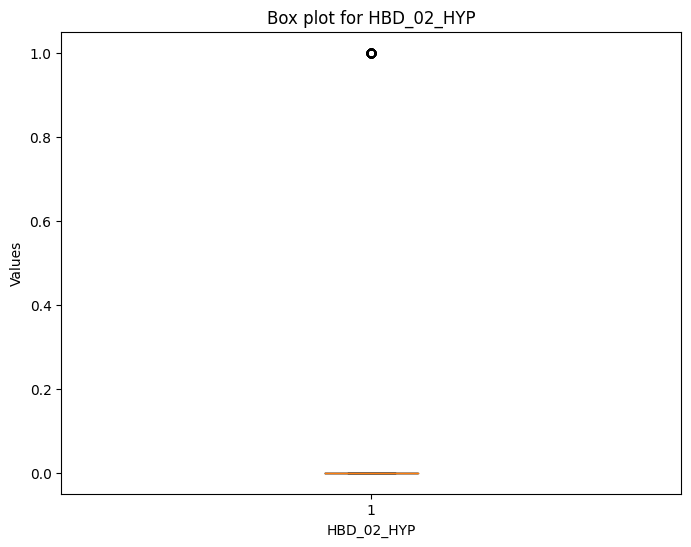

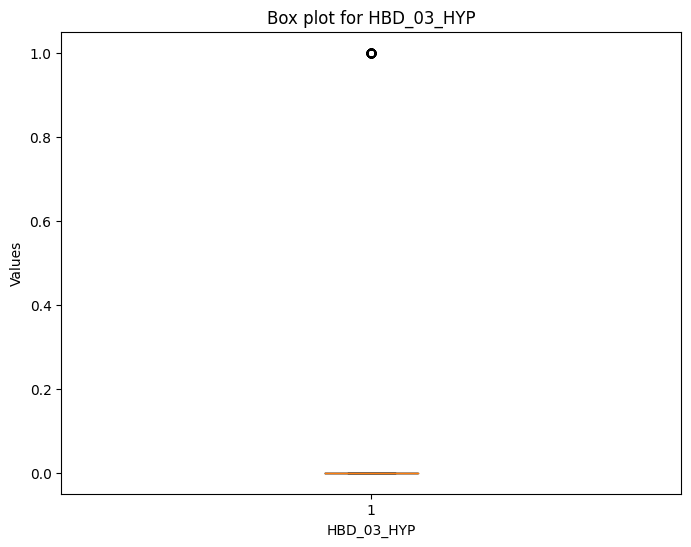

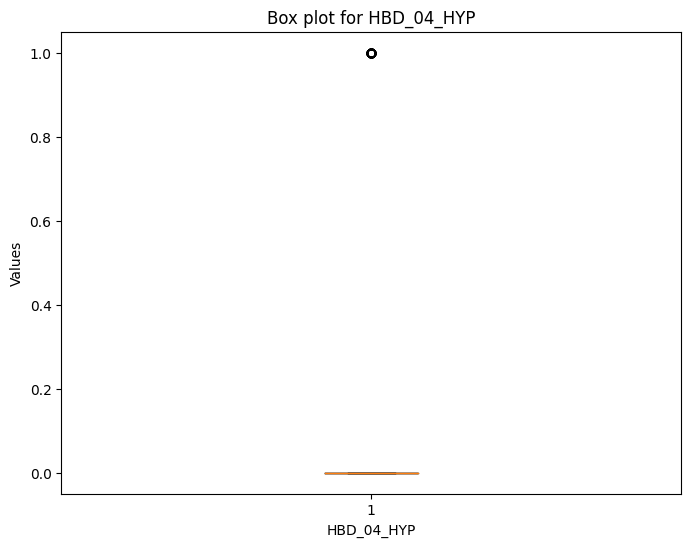

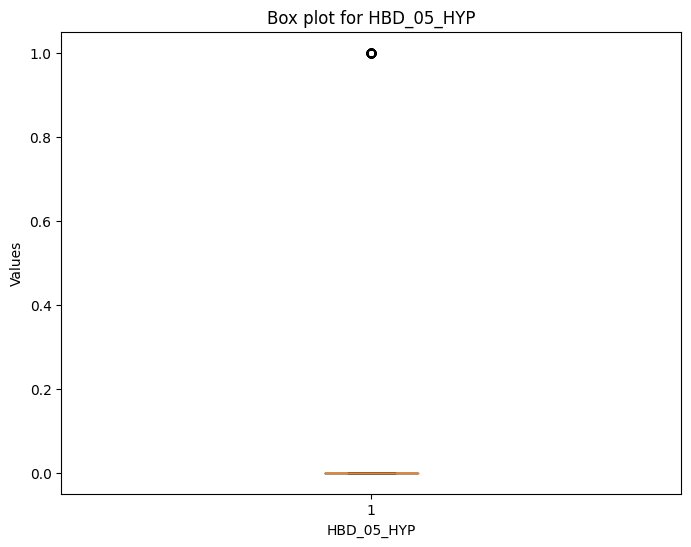

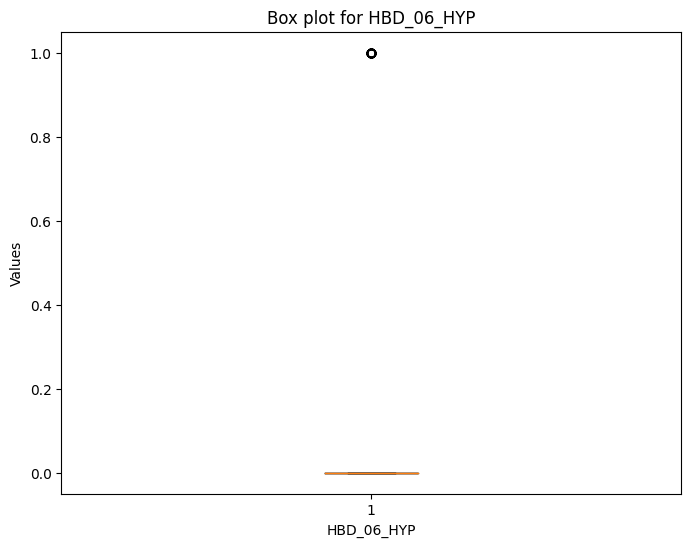

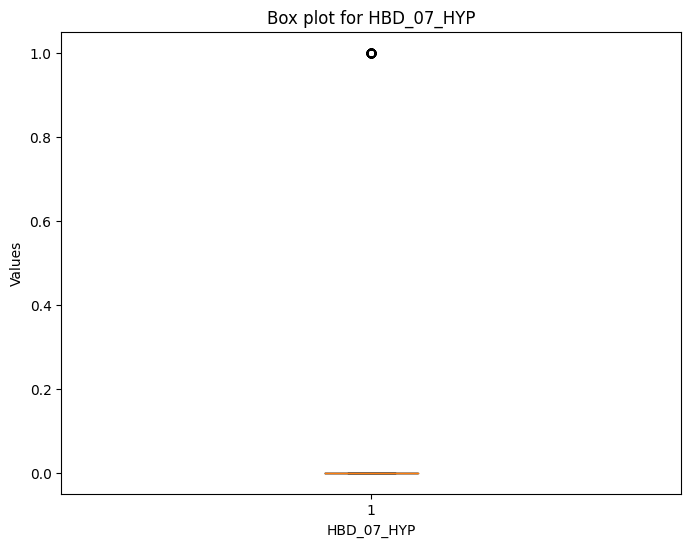

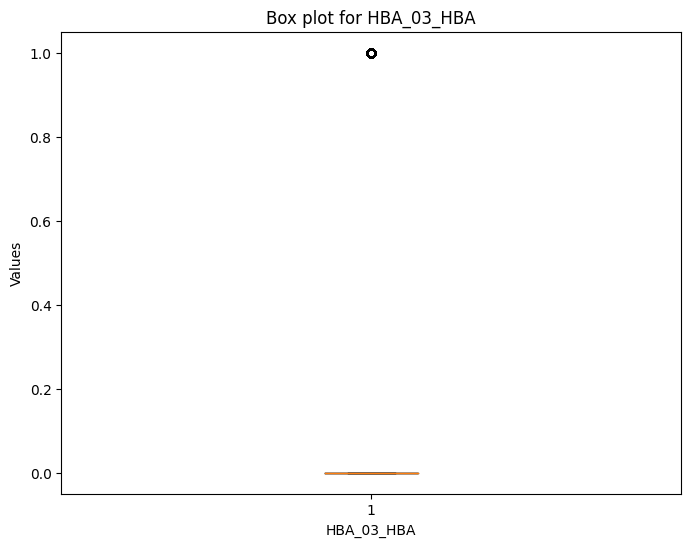

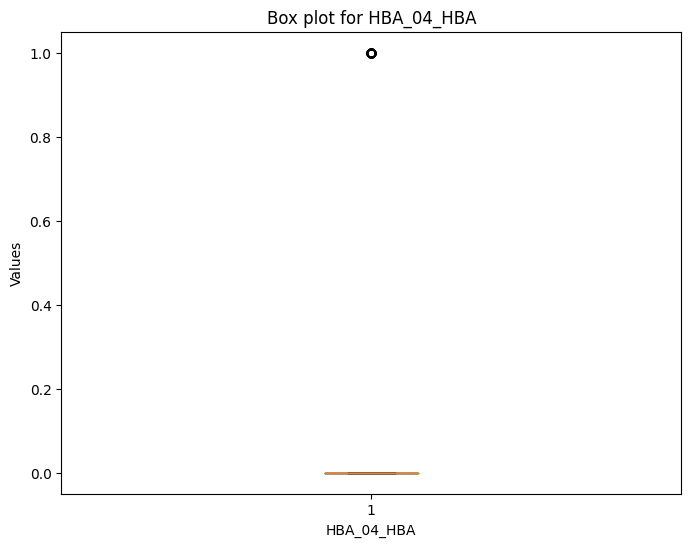

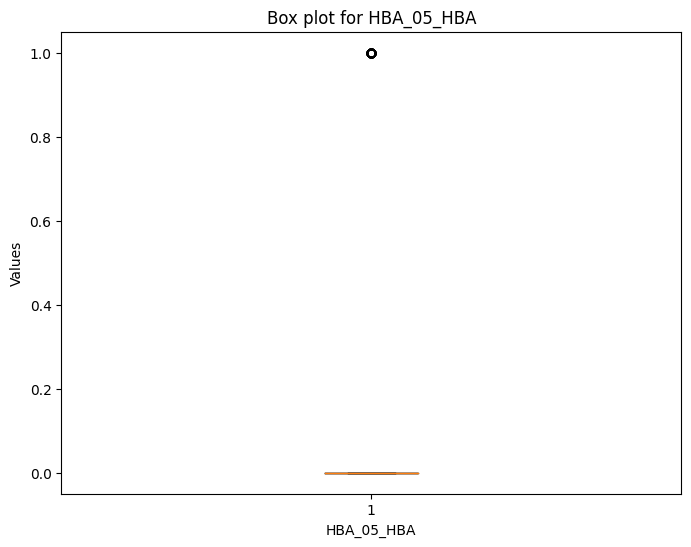

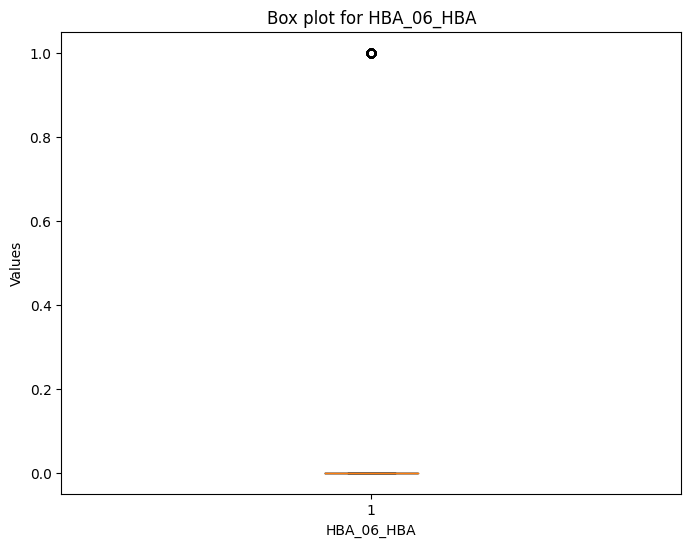

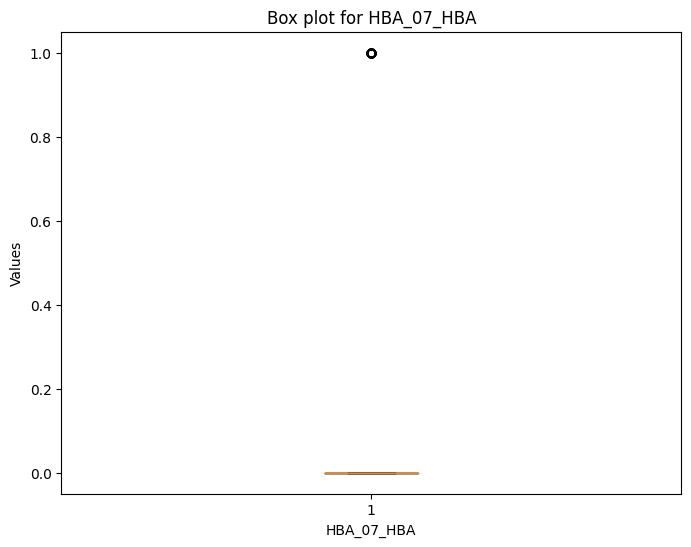

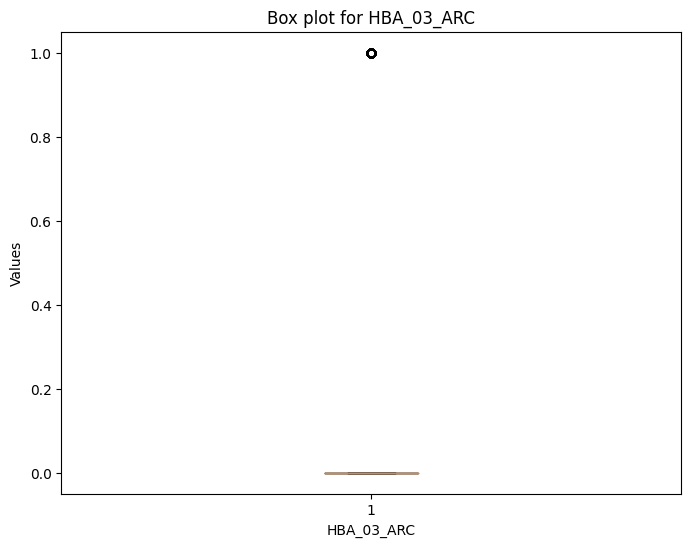

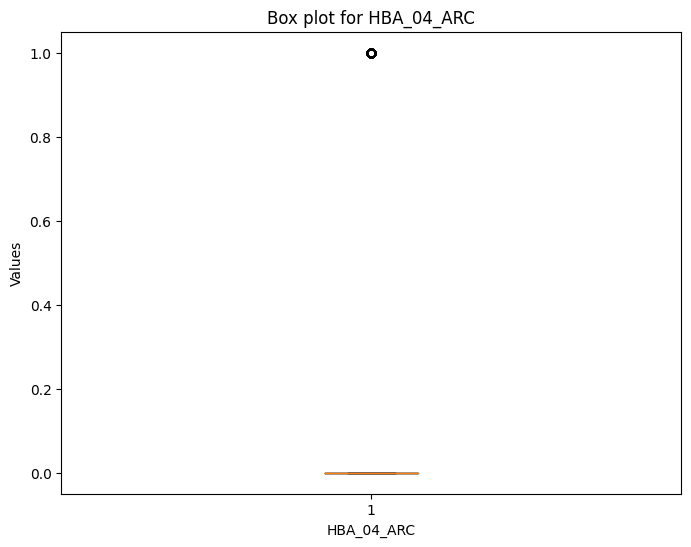

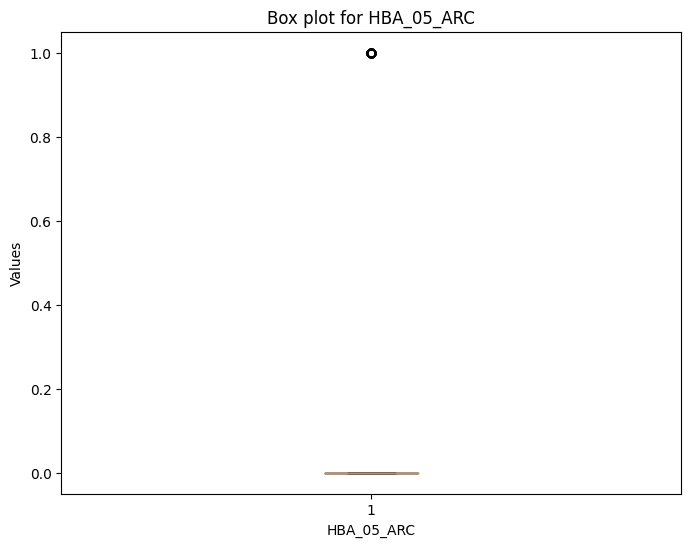

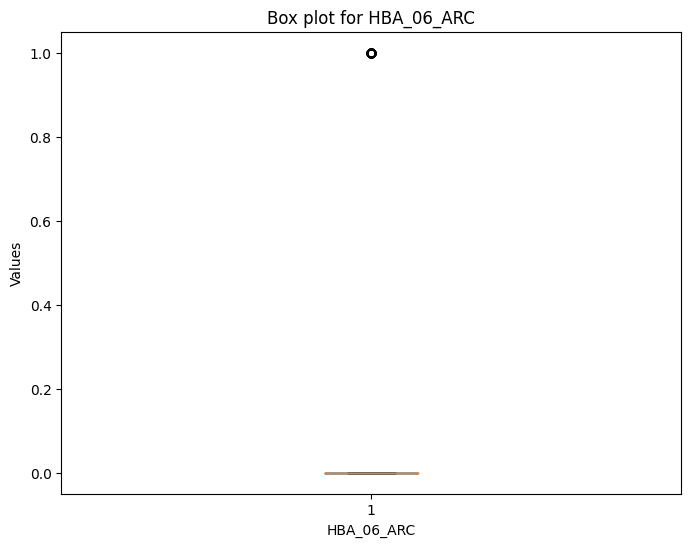

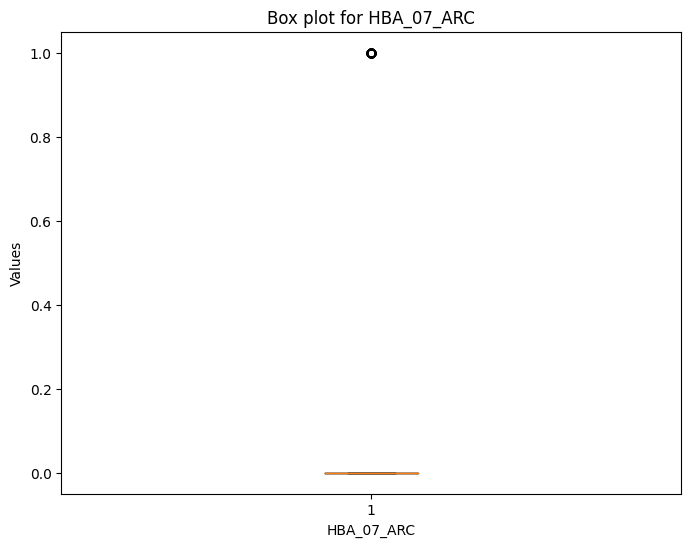

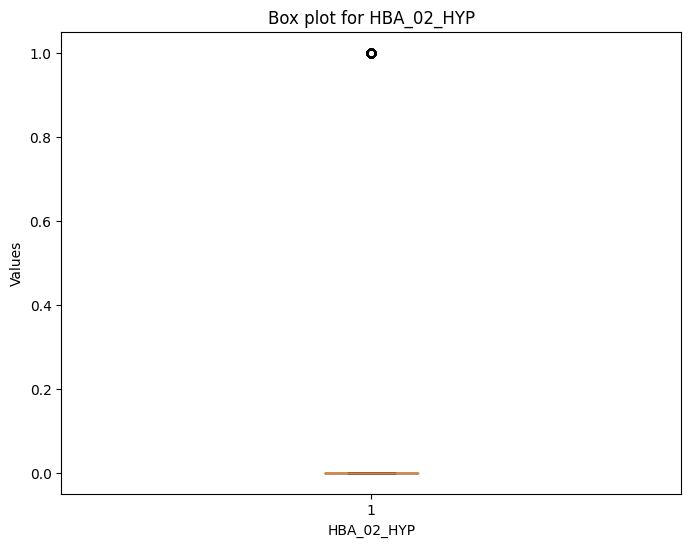

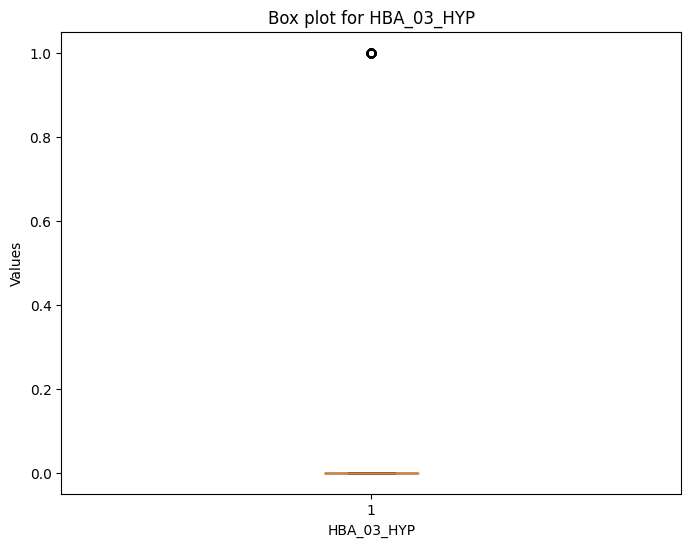

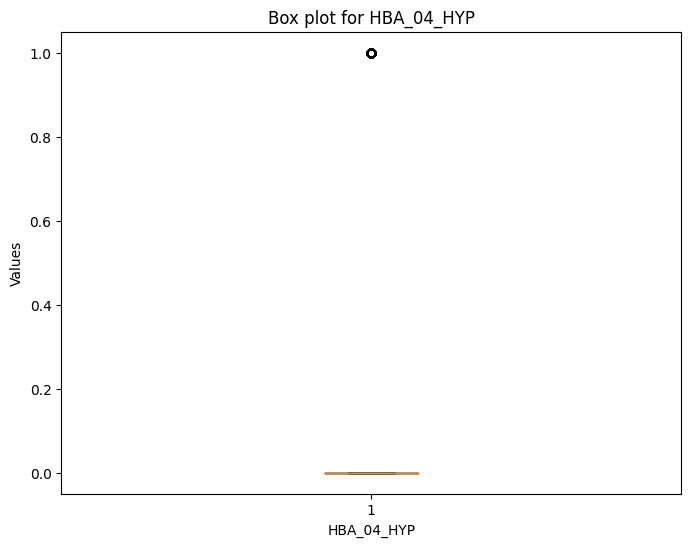

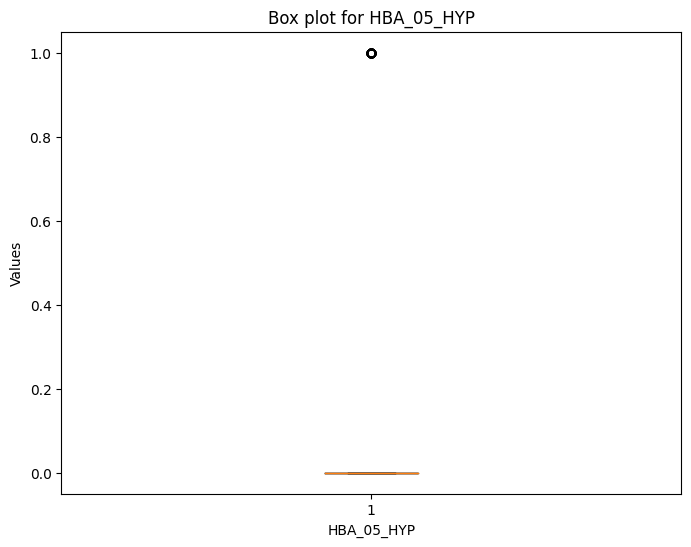

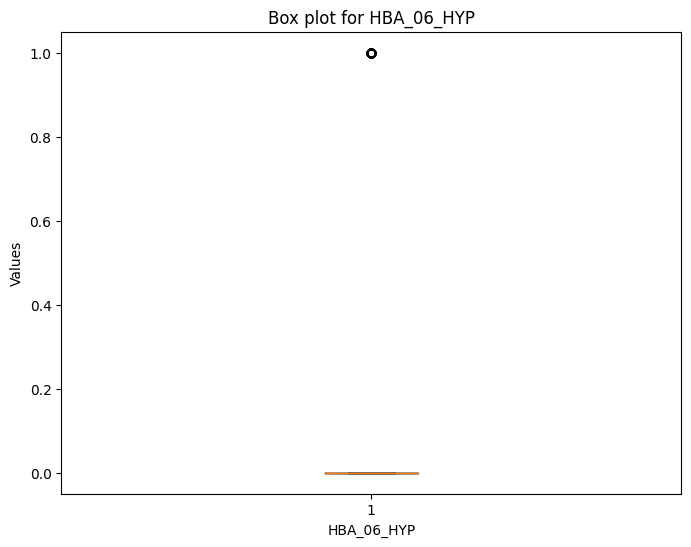

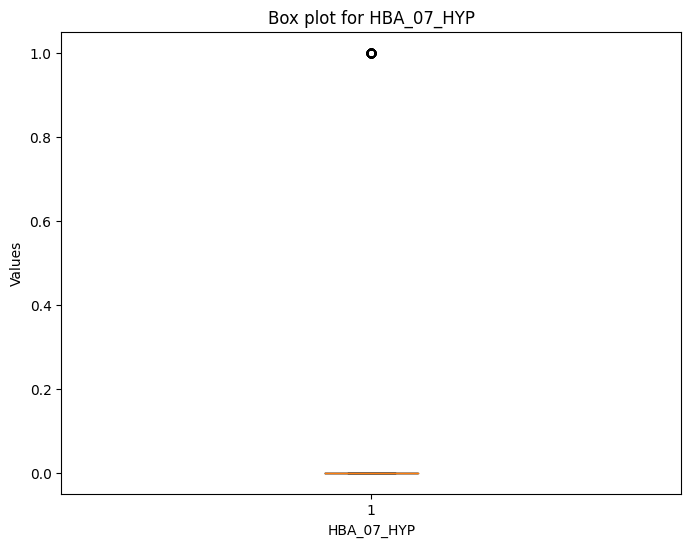

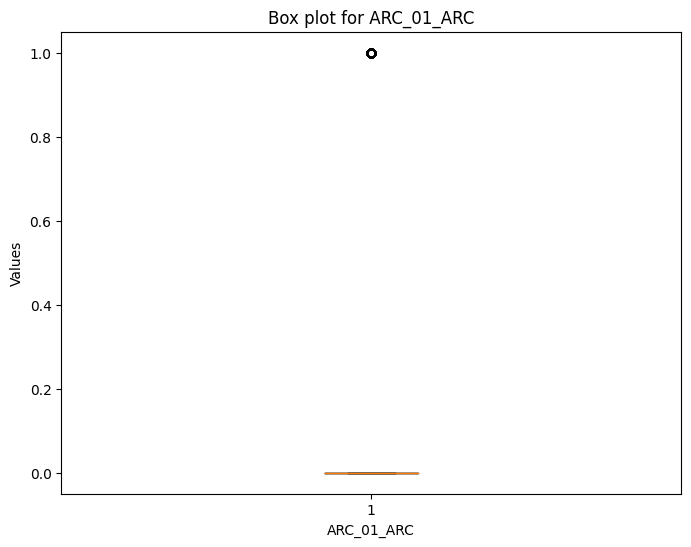

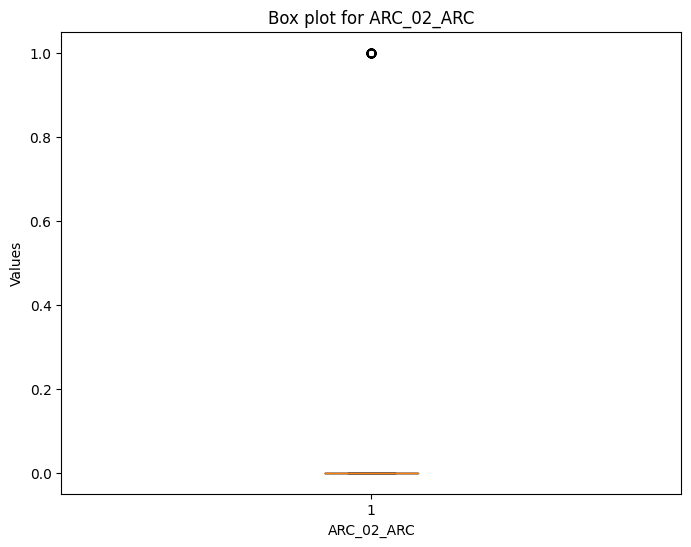

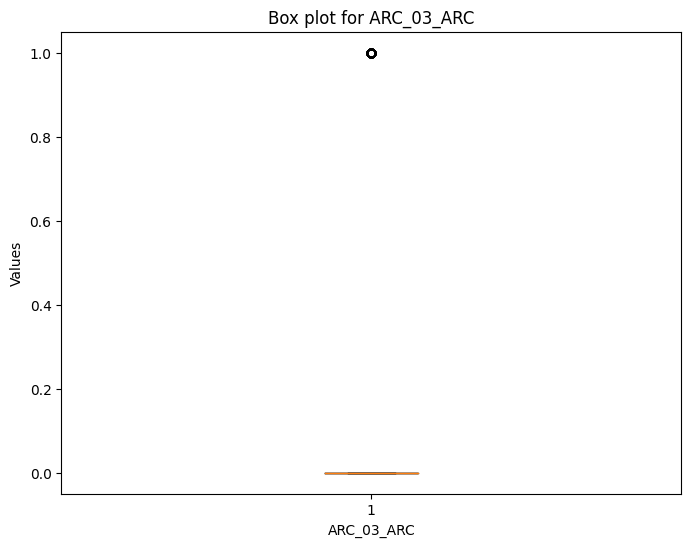

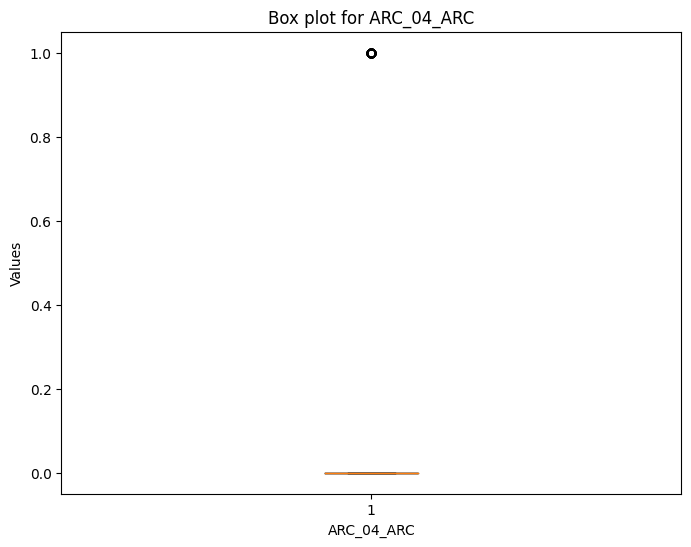

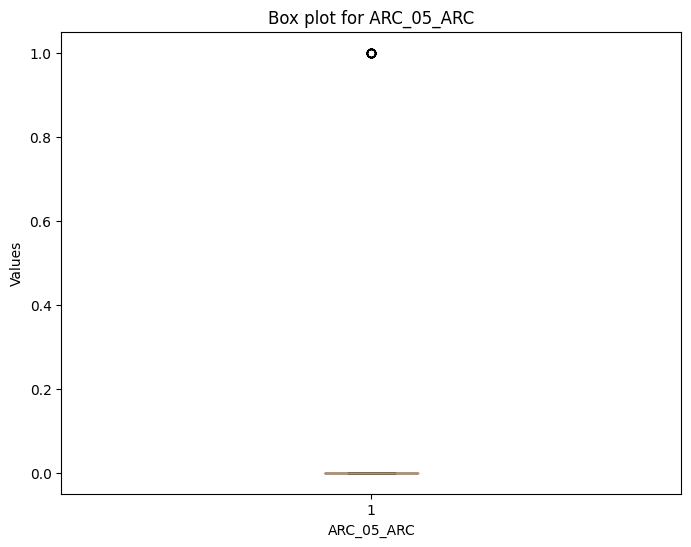

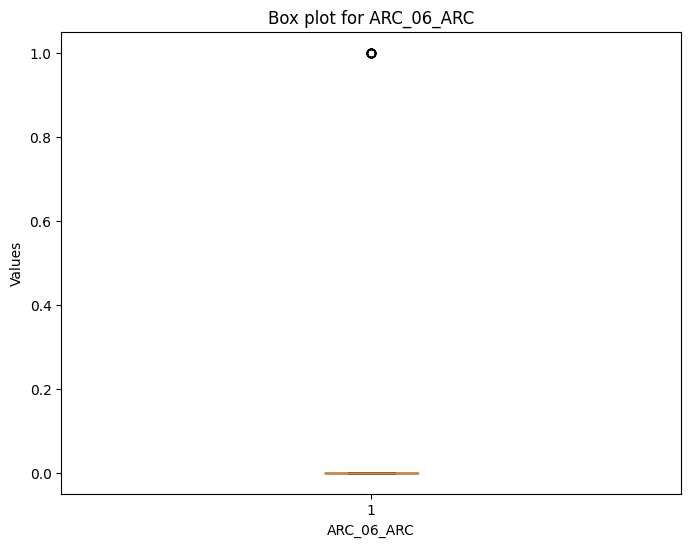

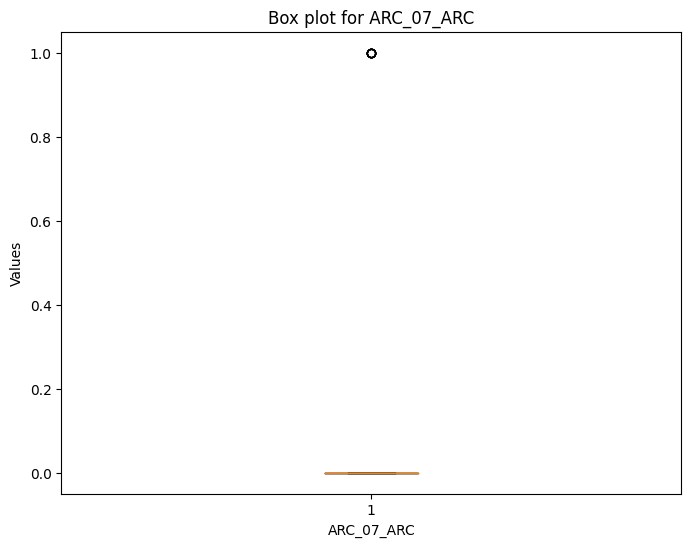

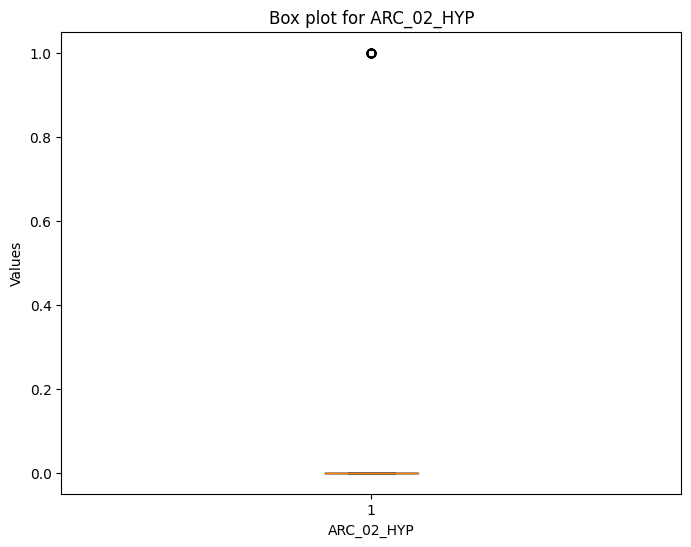

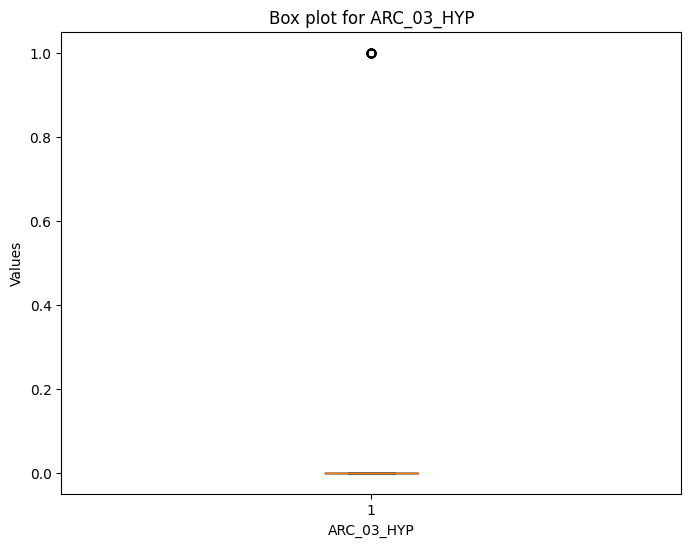

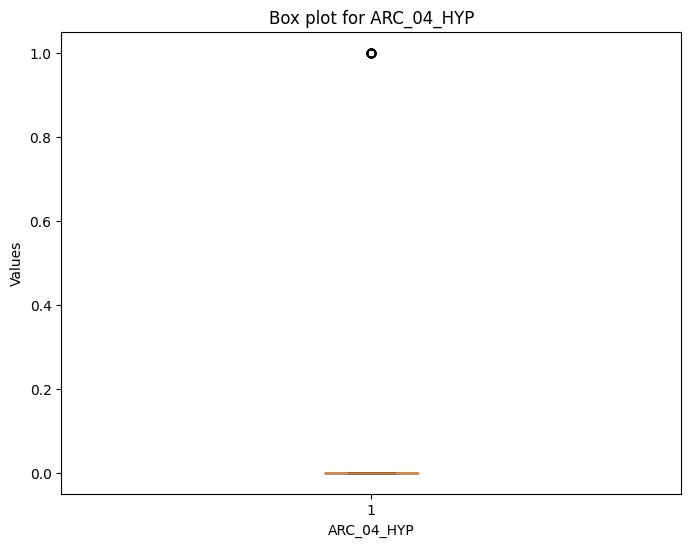

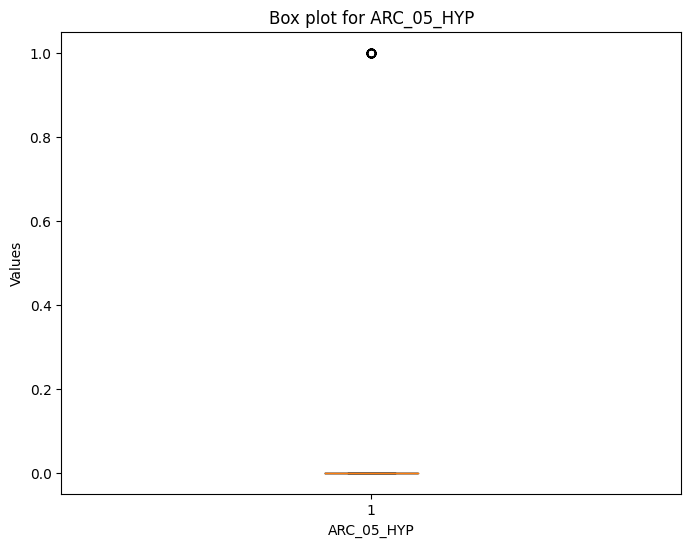

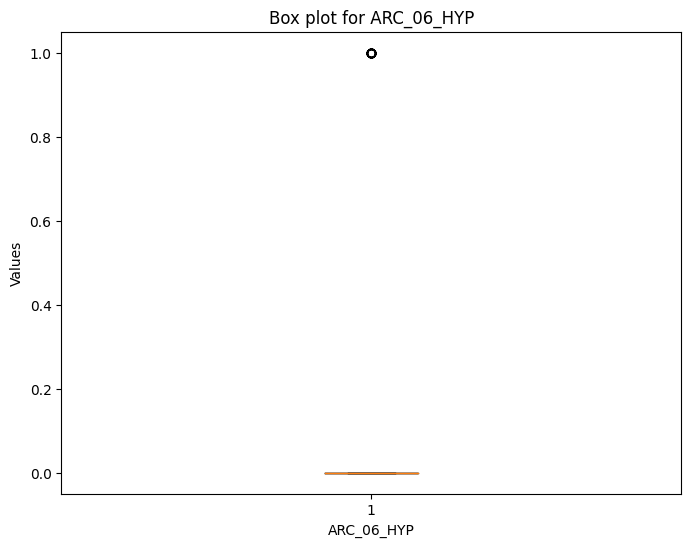

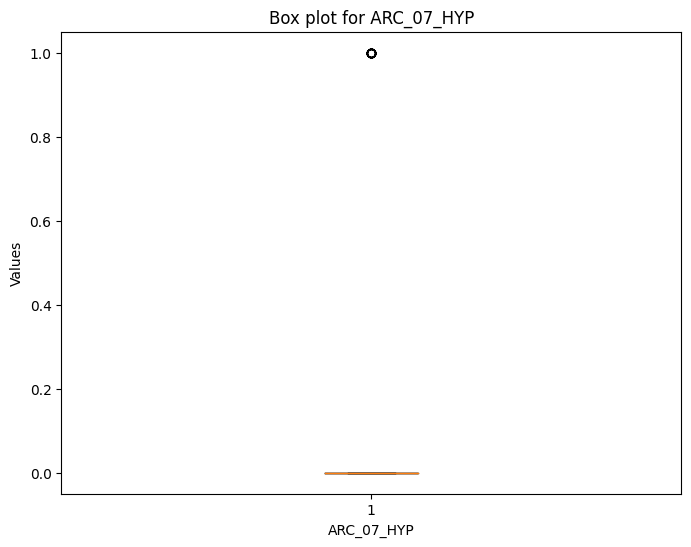

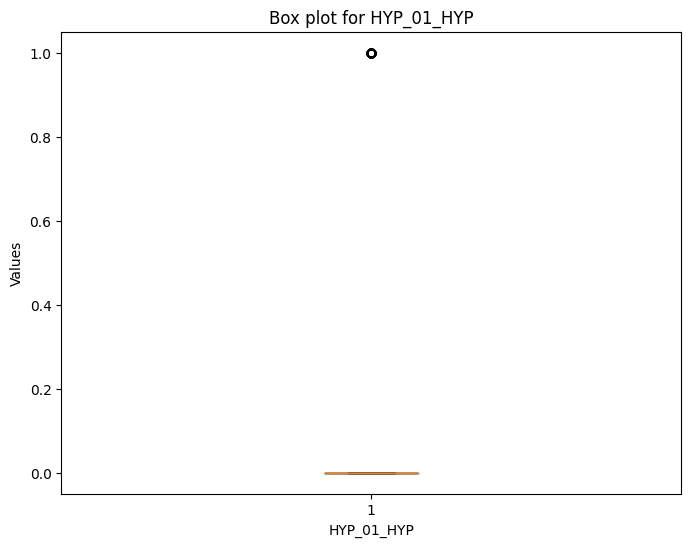

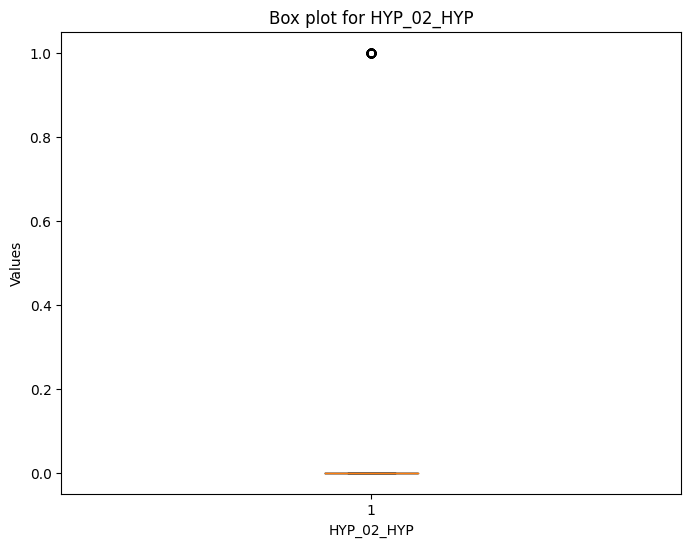

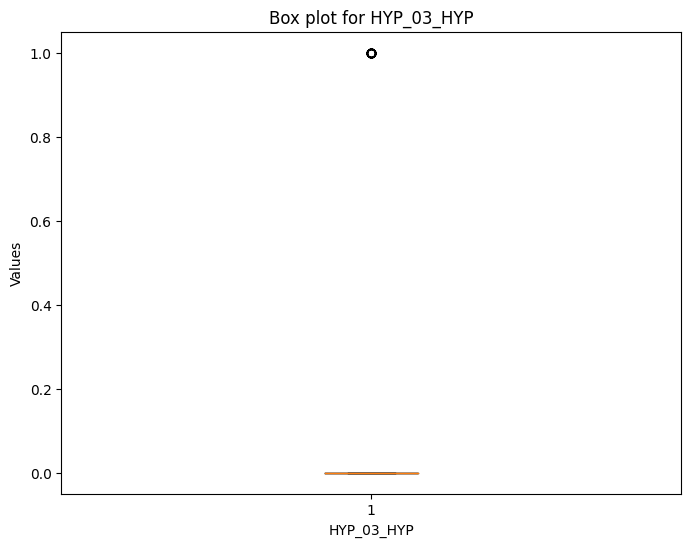

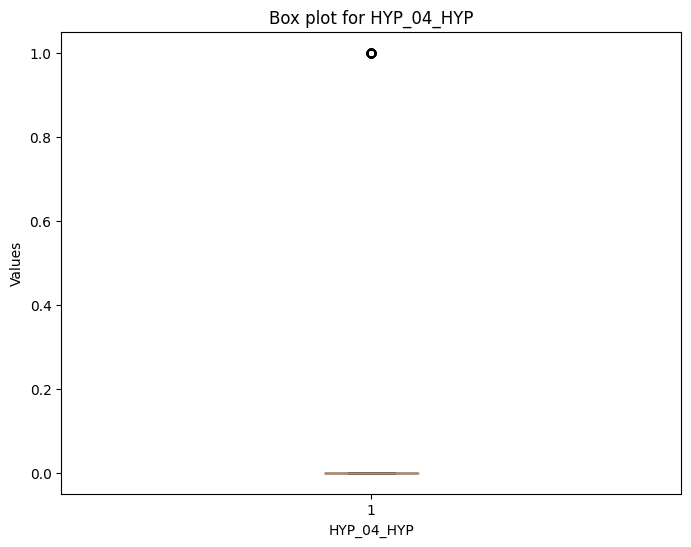

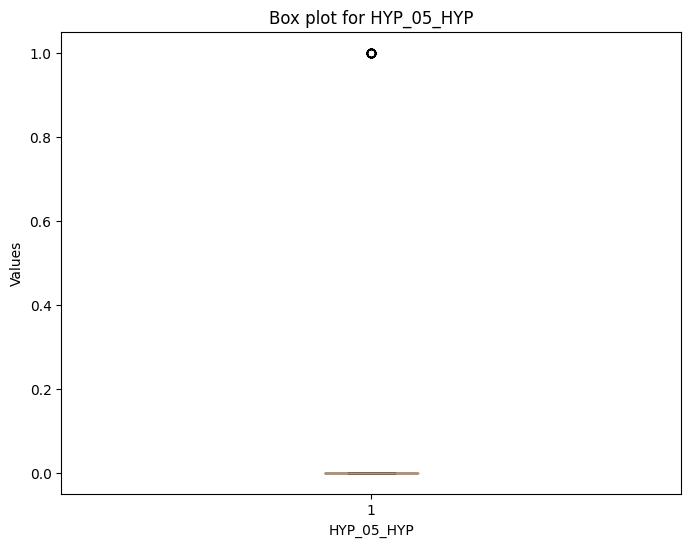

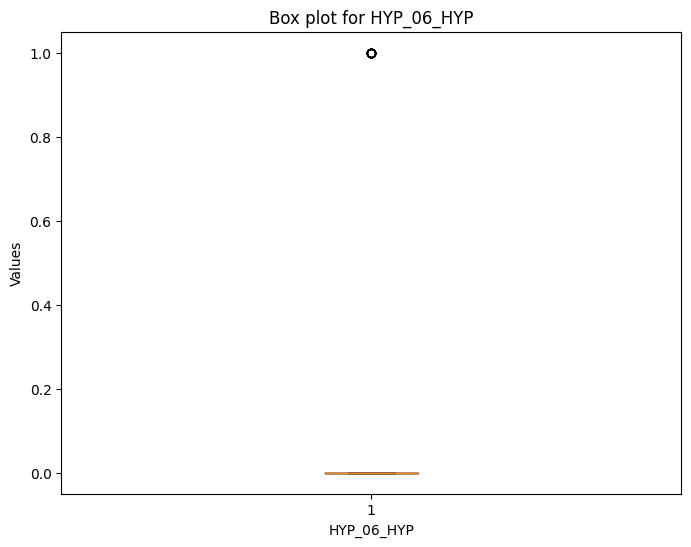

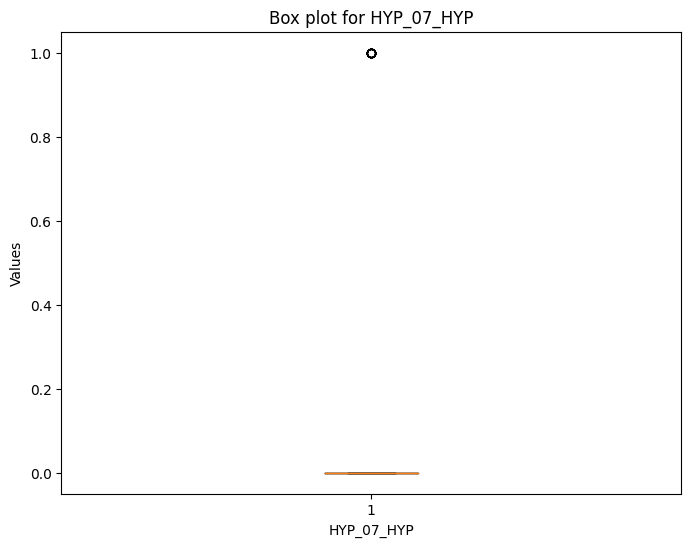

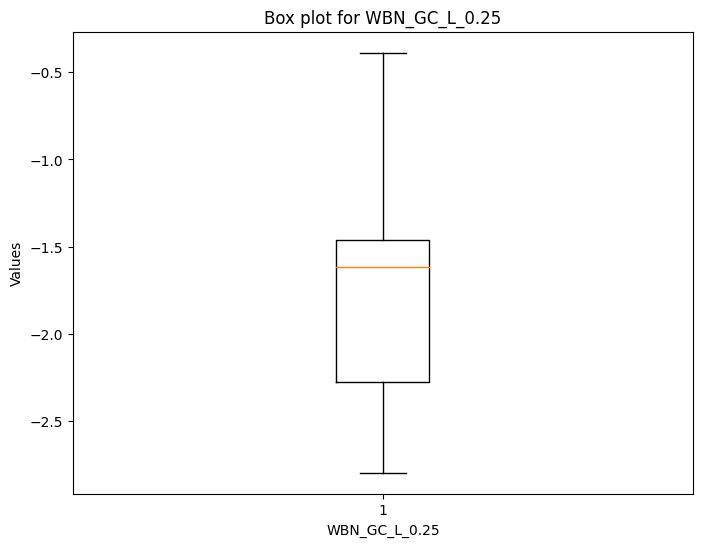

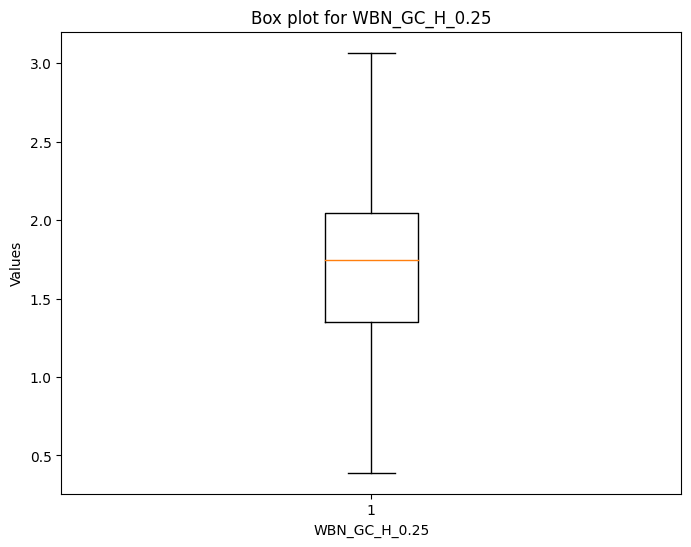

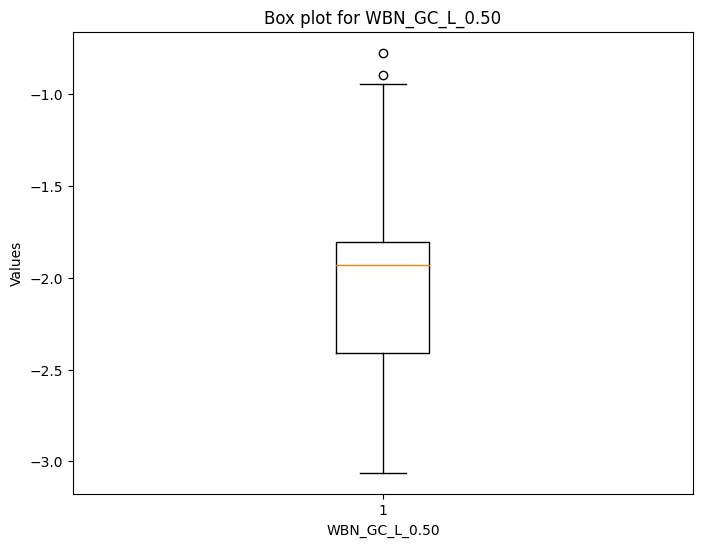

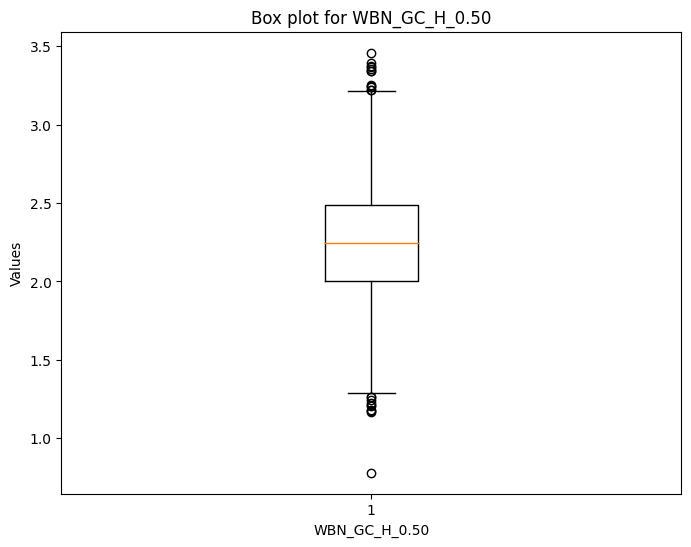

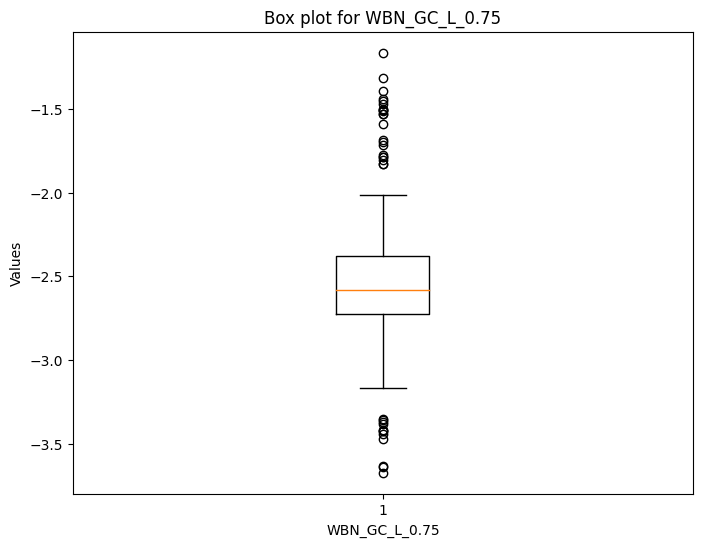

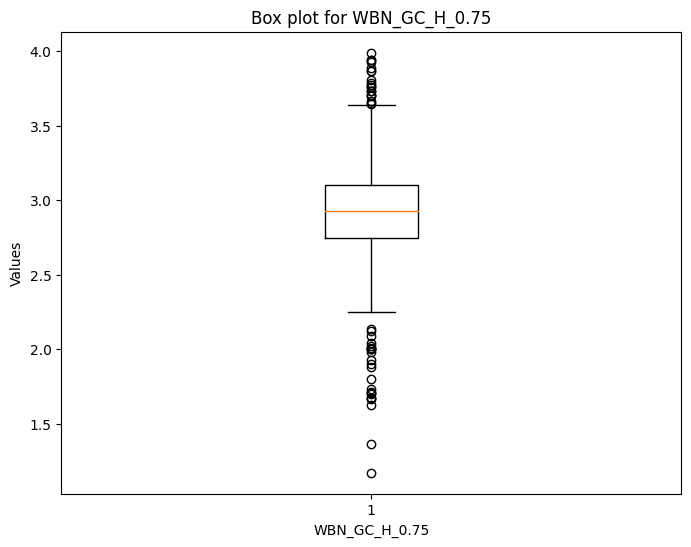

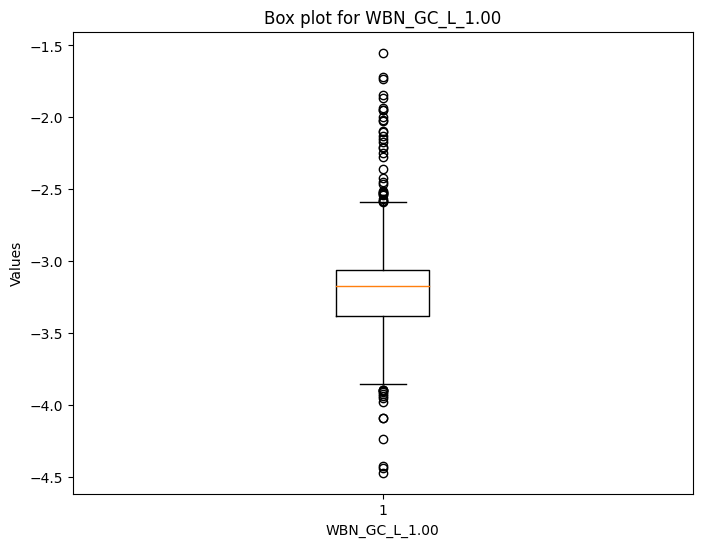

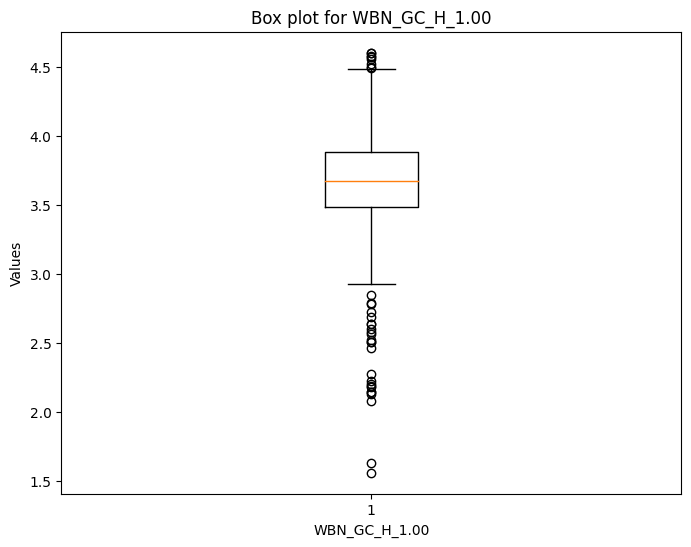

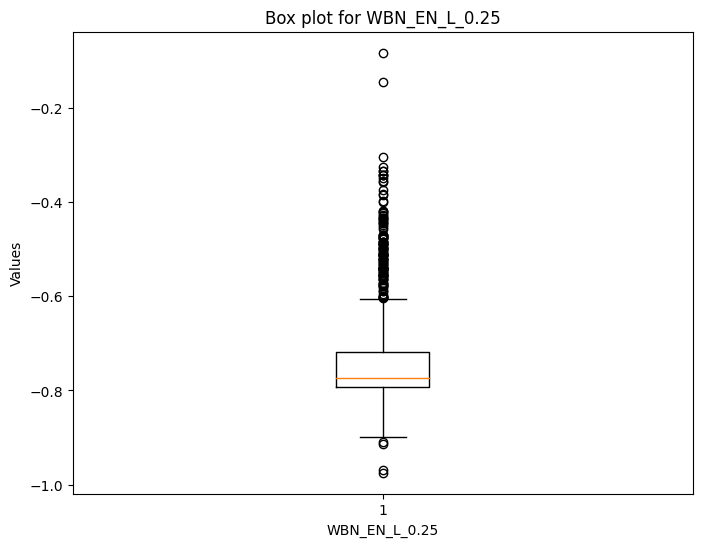

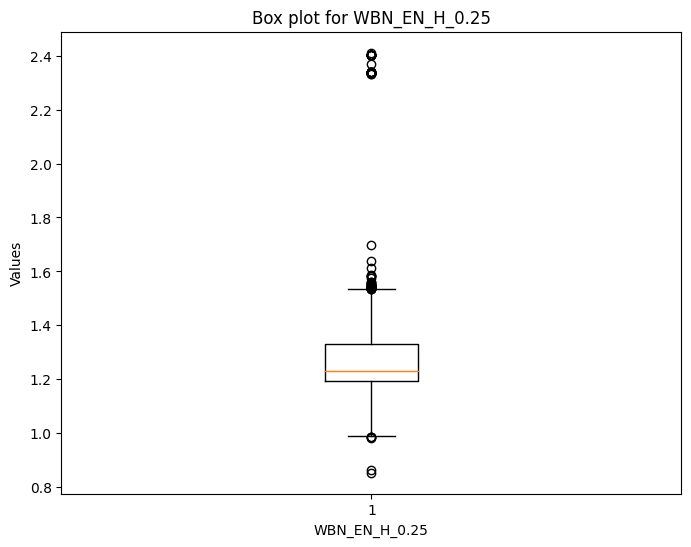

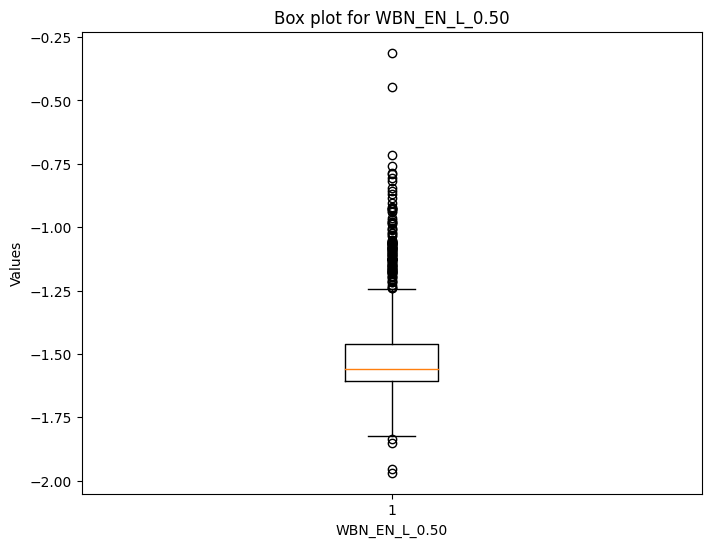

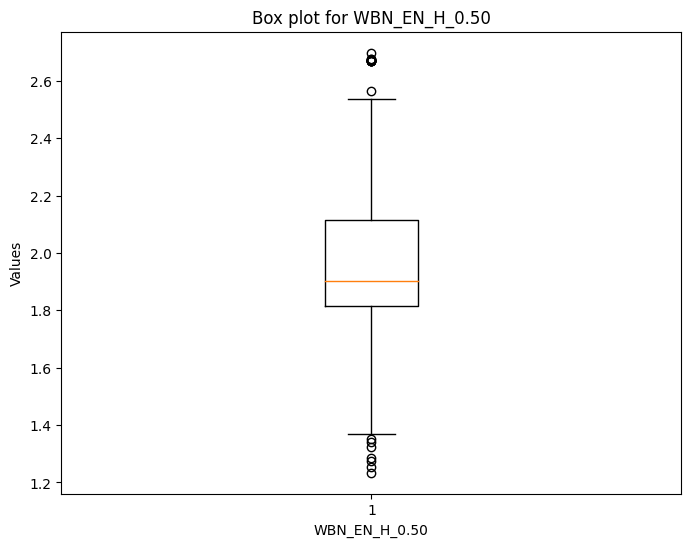

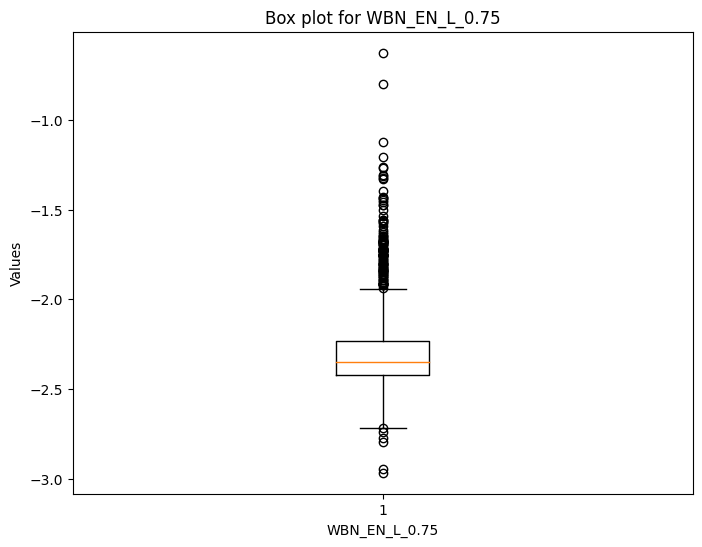

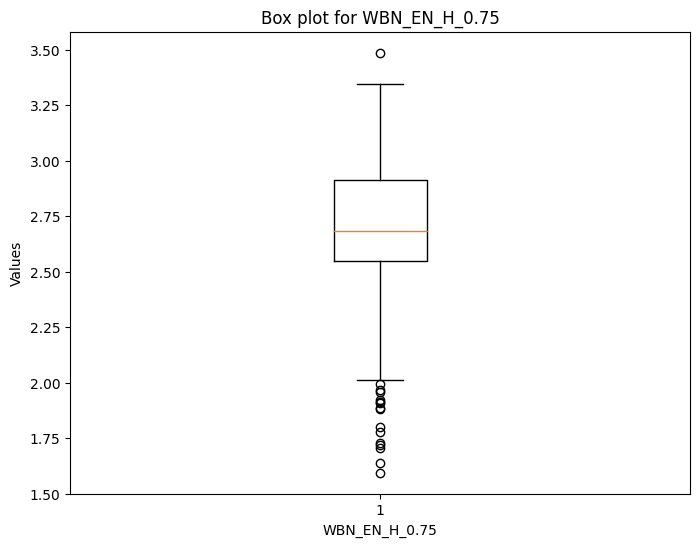

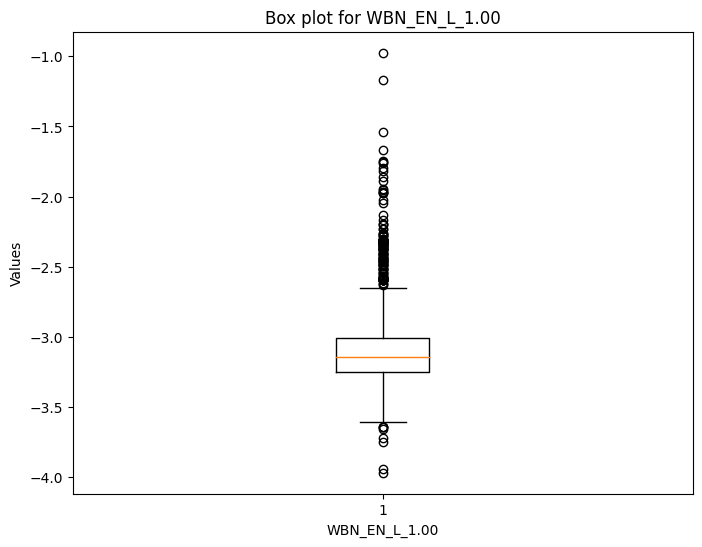

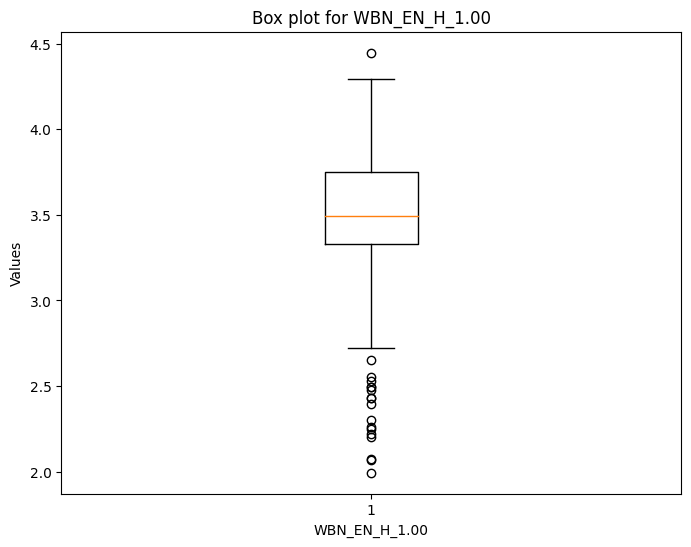

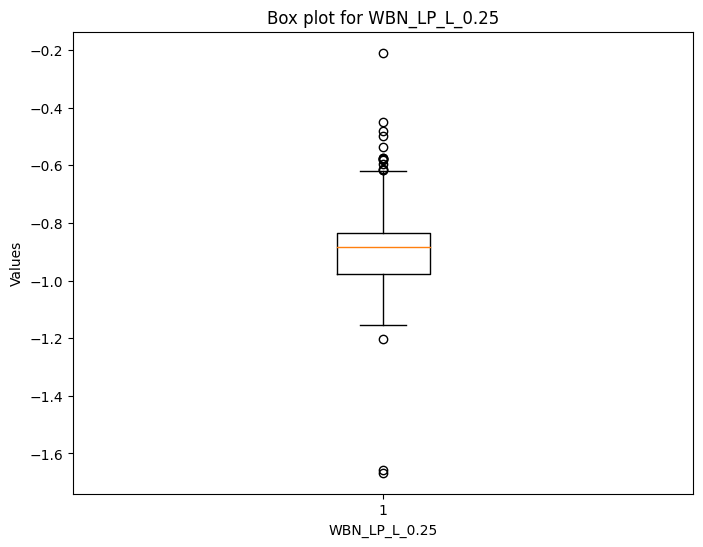

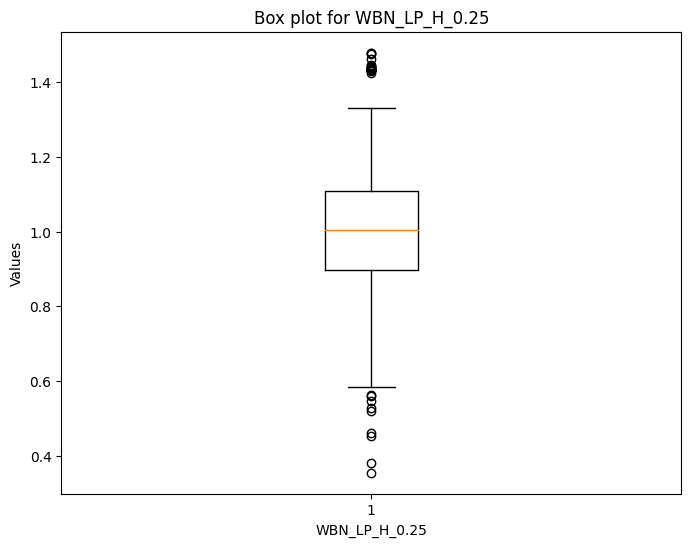

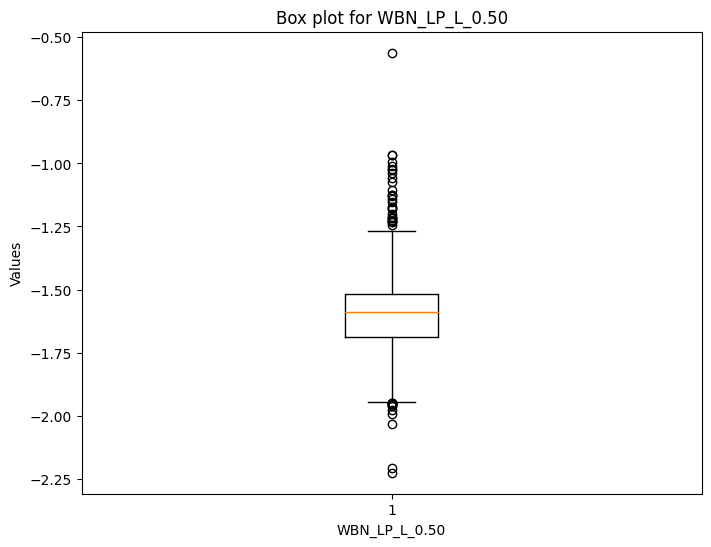

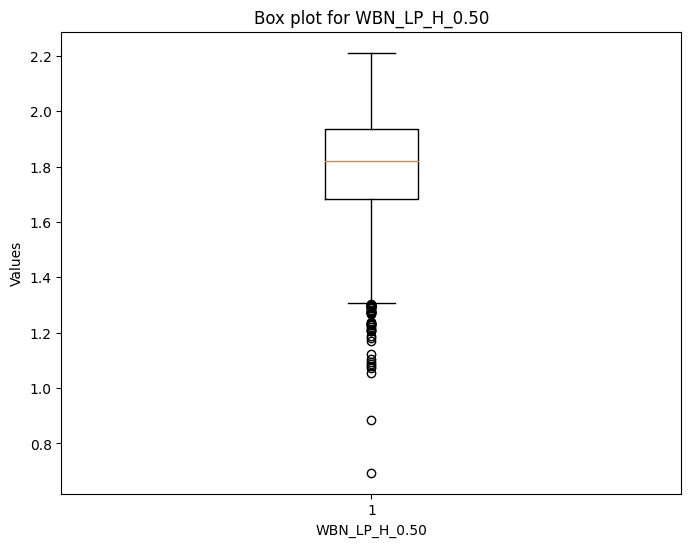

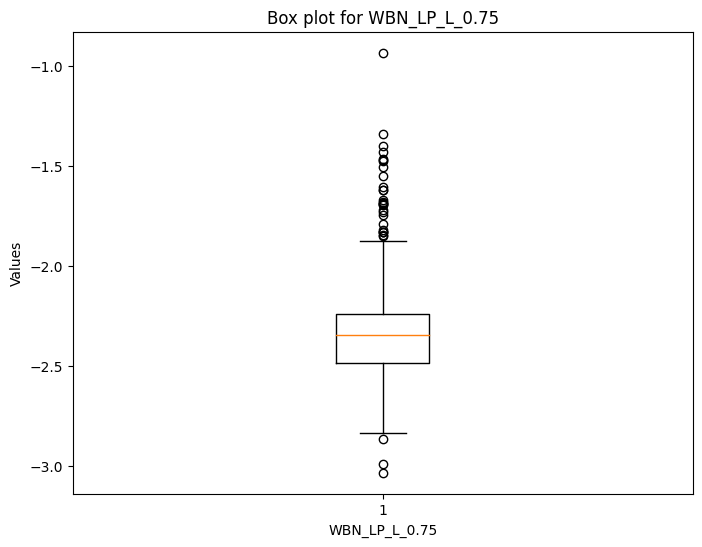

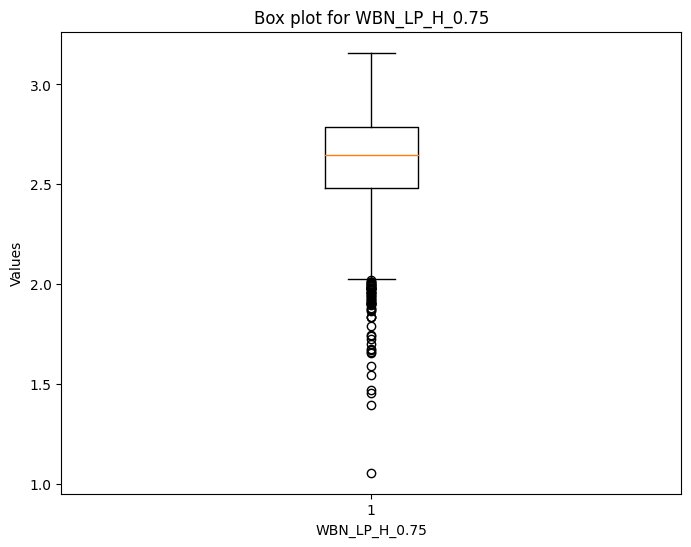

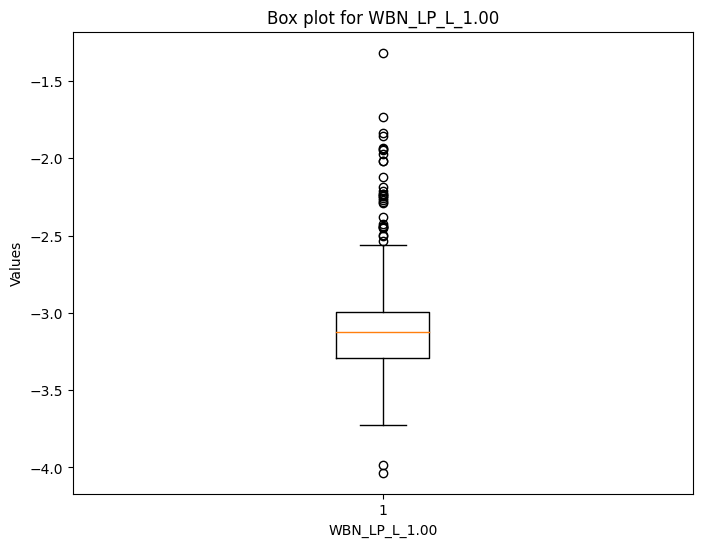

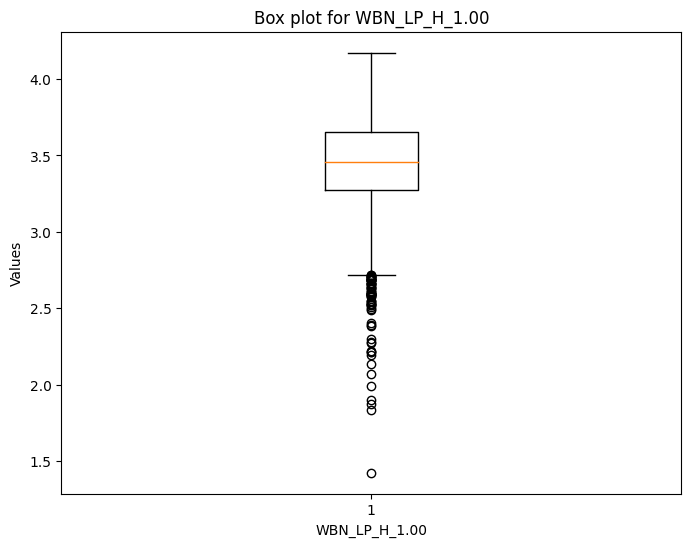

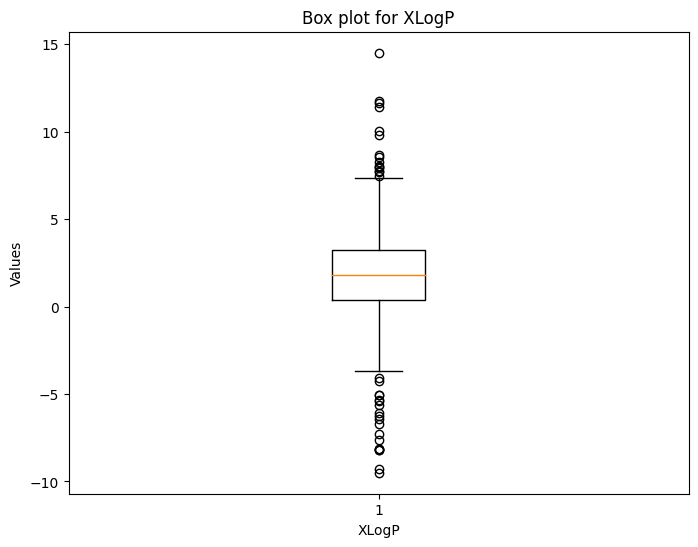

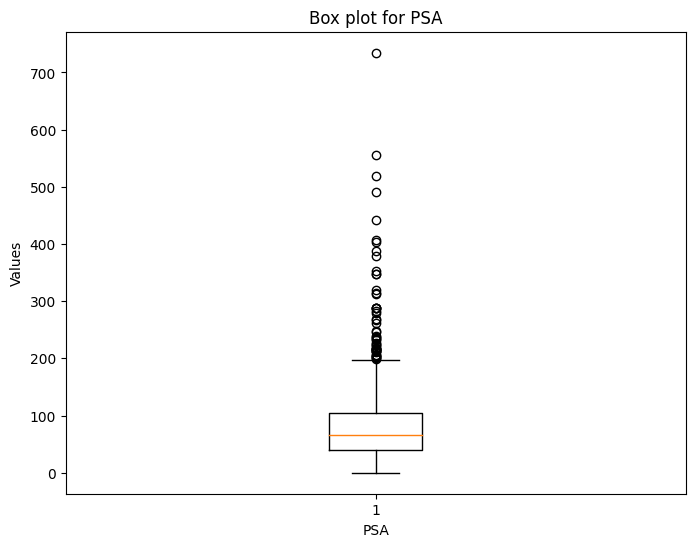

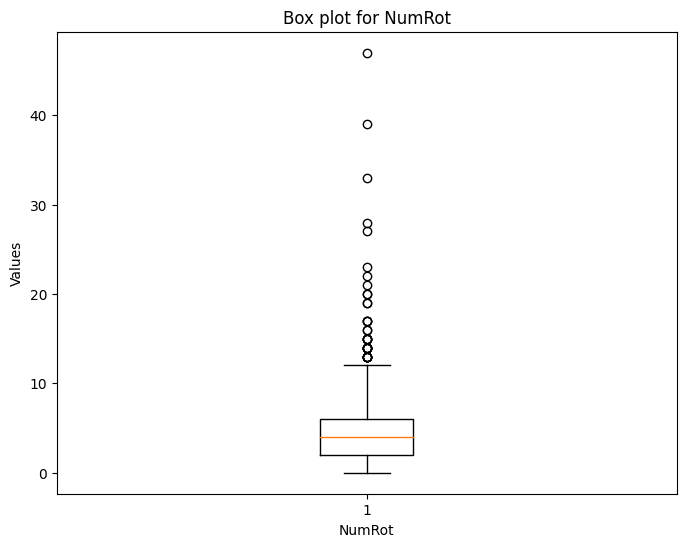

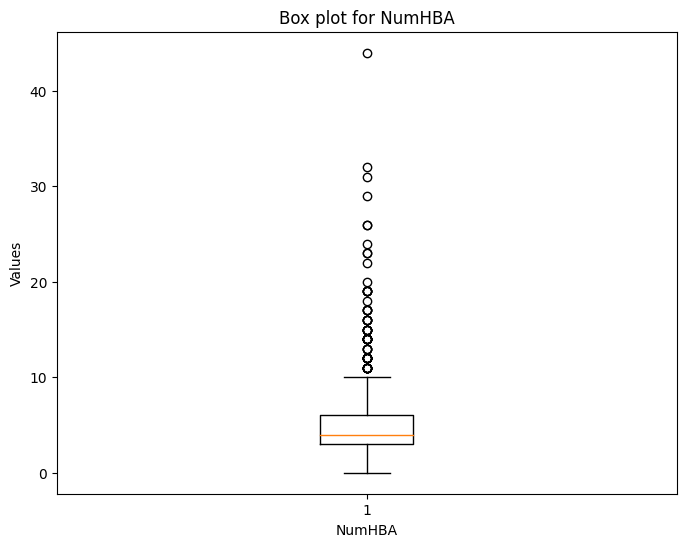

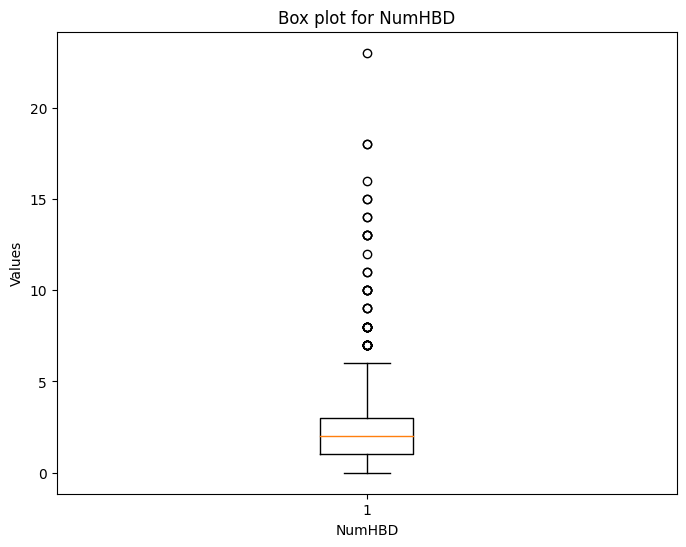

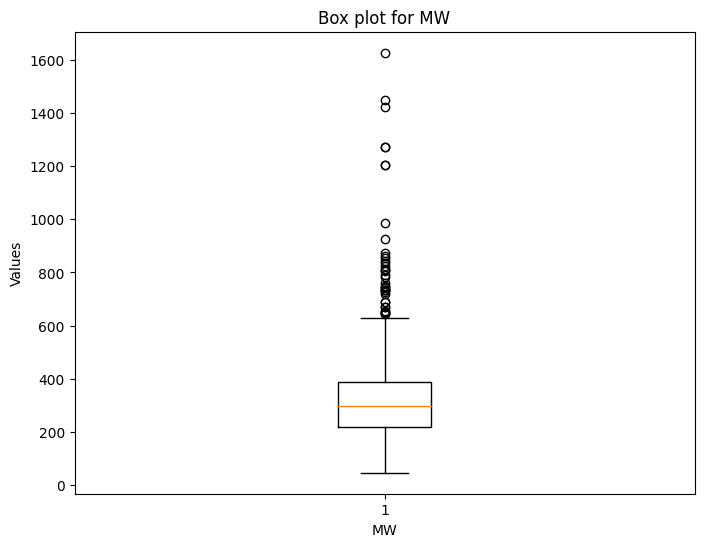

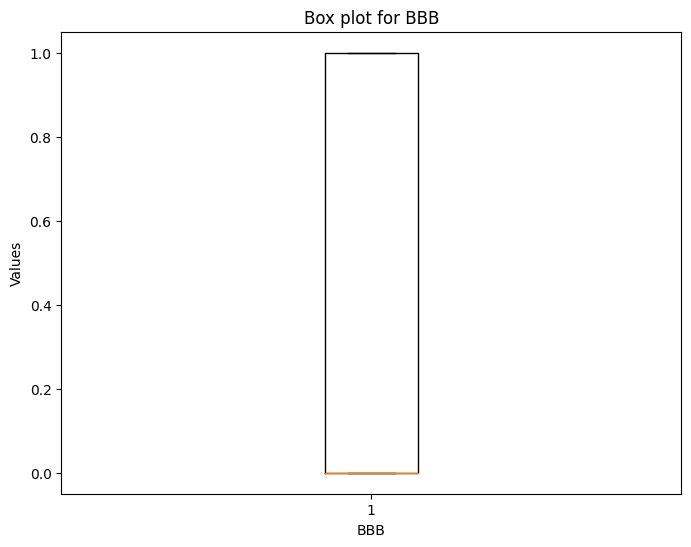

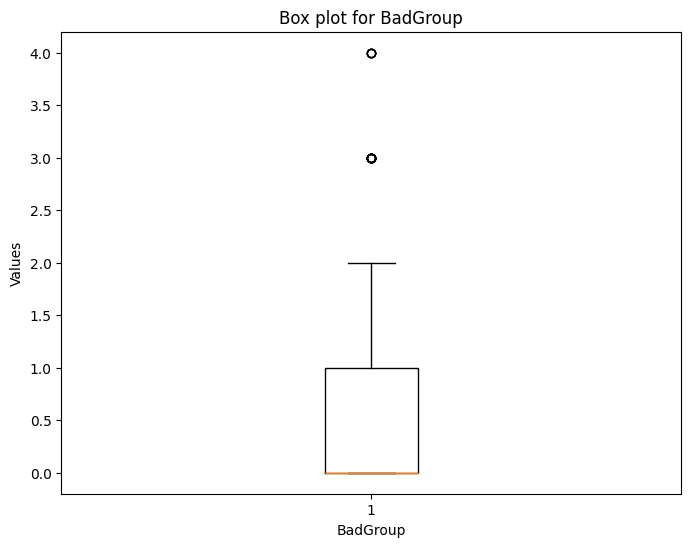

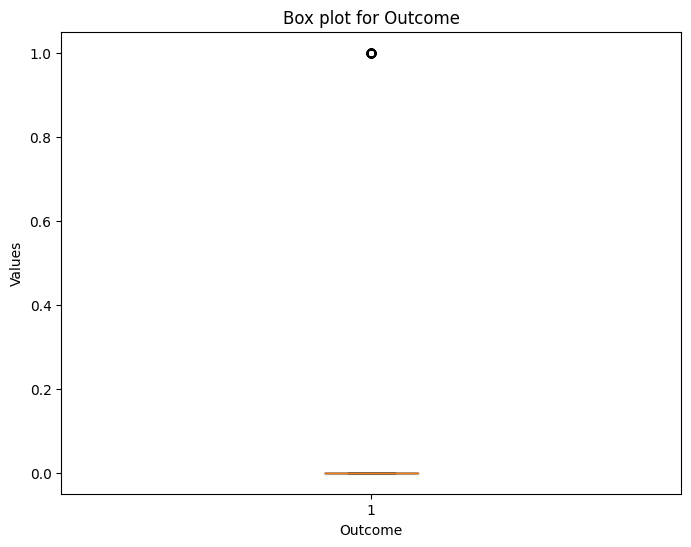

In [ ]:
def generate_box_plots(data):
    numerical_columns = data.select_dtypes(include=['int', 'float']).columns

    for column in numerical_columns:
        plt.figure(figsize=(8, 6))
        plt.boxplot(data[column])
        plt.title(f'Box plot for {column}')
        plt.xlabel(column)
        plt.ylabel('Values')
        plt.show()
# Assuming 'data' is your dataset
generate_box_plots(train)


As we can see , the box plot was not of much use , so we can determine the outliers by working out another way , that is masking for all those values which fall above the upper and below the lower whisker.

In [ ]:
q1 = np.percentile(train,25)
q3 = np.percentile(train,75)

iqr = q3 - q1
lb = q1 - 1.5 * iqr
ub = q3 + 1.5 * iqr
mask = (train > ub) | (train < lb)
outliers = pd.Series(mask.sum().sort_values(ascending=False))
outliers

WBN_EN_H_0.25    827
WBN_LP_L_0.25    827
WBN_GC_L_0.25    827
WBN_GC_H_0.25    827
WBN_GC_L_0.50    827
                ... 
POS_03_POS         1
POS_07_POS         1
NEG_06_POS         1
POS_01_HBD         0
POS_02_HBD         0
Length: 155, dtype: int64

As we can see most of them are outliers so just removing them should be ok for general case , however as the the problem definition says - for most of drug discovery trail is false hit , we're just getting that statement here .

**So should we remove them or not ?**

There is another way around this problem - Clustering

# Isolation forest

In [ ]:
train = pd.read_csv(files[7])
test = pd.read_csv(files[6])

# Separate feature matrix and target variable for train and test datasets
X_train = train.iloc[:, :-1]  # Features are all columns except the last one
y_train = train.iloc[:, -1]   # Target variable is the last column

X_test = test.iloc[:, :-1]    # Features are all columns except the last one
y_test = test.iloc[:, -1]     # Target variable is the last column

# Checking the shapes of each of the columns.
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (827, 154)
Shape of y_train: (827,)
Shape of X_test: (206, 154)
Shape of y_test: (206,)


In [ ]:
# Initialize the Isolation Forest model
isolation_forest = IsolationForest(random_state=42)

# Fit the model to the training data
isolation_forest.fit(X_train)

# Predict the anomalies
train_anomaly_scores = isolation_forest.decision_function(X_train)
test_anomaly_scores = isolation_forest.decision_function(X_test)


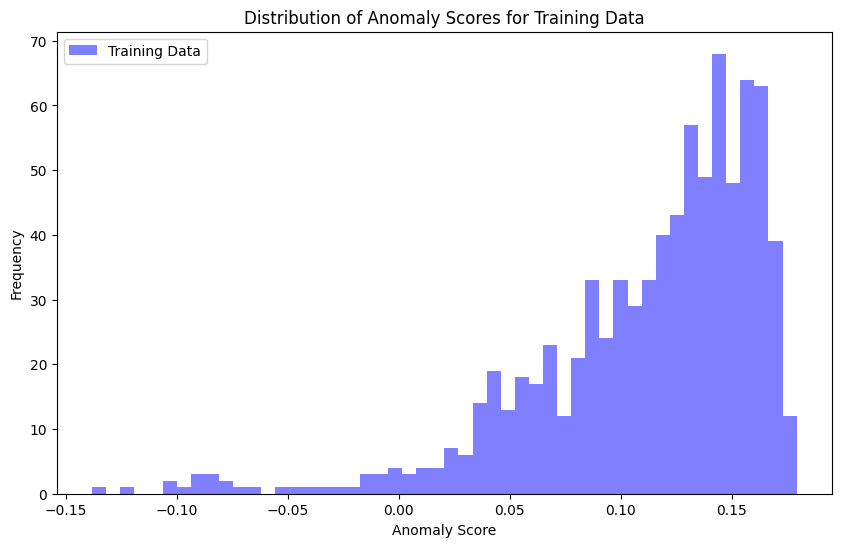

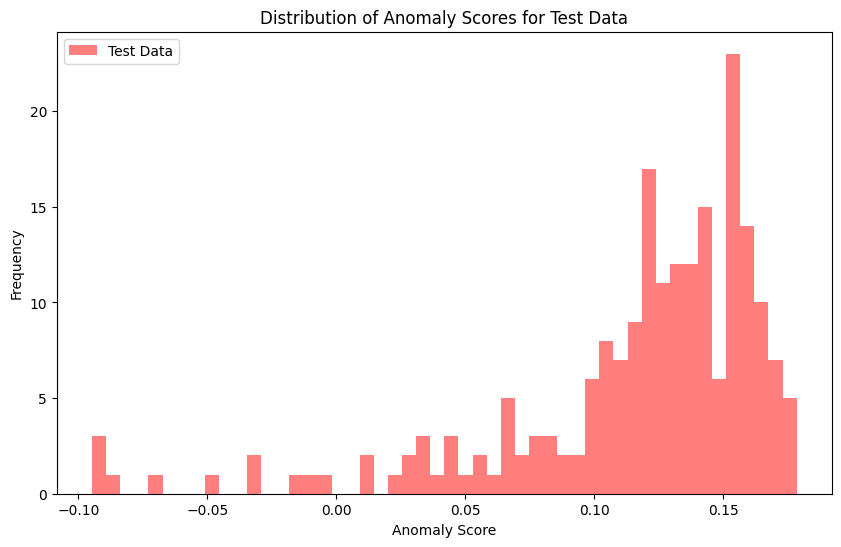

In [ ]:
# Plot anomaly scores for training data
plt.figure(figsize=(10, 6))
plt.hist(train_anomaly_scores, bins=50, alpha=0.5, color='blue', label='Training Data')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.title('Distribution of Anomaly Scores for Training Data')
plt.legend()
plt.show()

# Plot anomaly scores for test data
plt.figure(figsize=(10, 6))
plt.hist(test_anomaly_scores, bins=50, alpha=0.5, color='red', label='Test Data')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.title('Distribution of Anomaly Scores for Test Data')
plt.legend()
plt.show()


The visualization of anomaly scores obtained from Isolation Forest can provide several interpretations:

**Distribution of Anomaly Scores**: The histograms show the distribution of anomaly scores for both the training and test datasets. A higher frequency of data points with lower anomaly scores suggests that most data points are similar to the majority of the data, while a lower frequency of data points with higher anomaly scores suggests potential outliers or anomalies.

**Identification of Outliers**: By examining the tails of the histograms (i.e., data points with higher anomaly scores), you can identify potential outliers or anomalies in your dataset. Data points with anomaly scores significantly higher than the majority of the data points are more likely to be outliers.

**Comparison between Training and Test Data**: Comparing the histograms of anomaly scores for training and test datasets can provide insights into the generalization performance of the Isolation Forest model. If the distribution of anomaly scores in the test dataset is similar to that of the training dataset, it indicates that the model has learned to identify anomalies effectively and can generalize well to unseen data.

**Threshold Selection**: You can use the histograms to determine an appropriate threshold for identifying outliers based on anomaly scores. A threshold can be set such that data points with anomaly scores above the threshold are considered outliers. The selection of the threshold may depend on the specific requirements of your application and the desired trade-off between false positives and false negatives.

Overall, the visualization of anomaly scores helps in understanding the distribution of anomalies in the dataset and provides insights into the performance of the Isolation Forest algorithm for anomaly detection.

# Clustering with the help of elbow curve

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [ ]:
X = train.iloc[:,:-1].values
y = train.iloc[:,-1].values

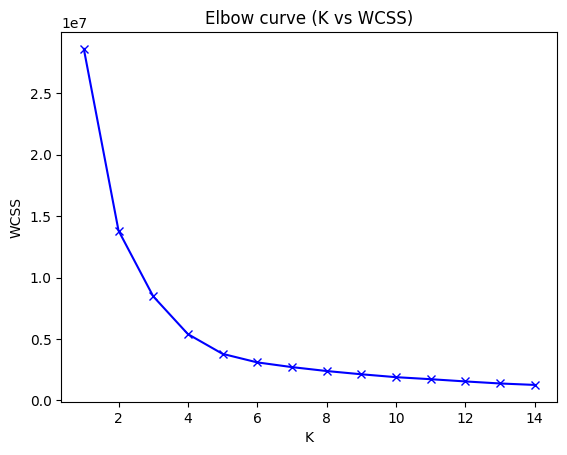

In [ ]:
wcss = []

for i in range(1,15):
    clus = KMeans(n_clusters = i,init="k-means++", random_state=0)
    clus.fit(X)
    wcss.append(clus.inertia_)

plt.plot(range(1,15),wcss,'bx-')
plt.xlabel("K")
plt.ylabel("WCSS")
plt.title("Elbow curve (K vs WCSS)")
plt.show()

Going by the elbow curve , we can take the k value to be equal to 2 , 3 , 4 , 5. Let us visualize the effect of this.

In [ ]:
def kmeans_clustering(data, n_clusters):
    # Initialize the KMeans model with the desired number of clusters
    kmeans = KMeans(n_clusters=n_clusters)

    # Fit the model to the numerical data
    kmeans.fit(data.select_dtypes(include=['int', 'float']))

    # Add cluster labels to the original dataframe
    data['cluster'] = kmeans.labels_

    return data

# Assuming 'data' is your dataset and 'n_clusters' is the number of clusters you want
data_with_clusters = kmeans_clustering(train, n_clusters=5)


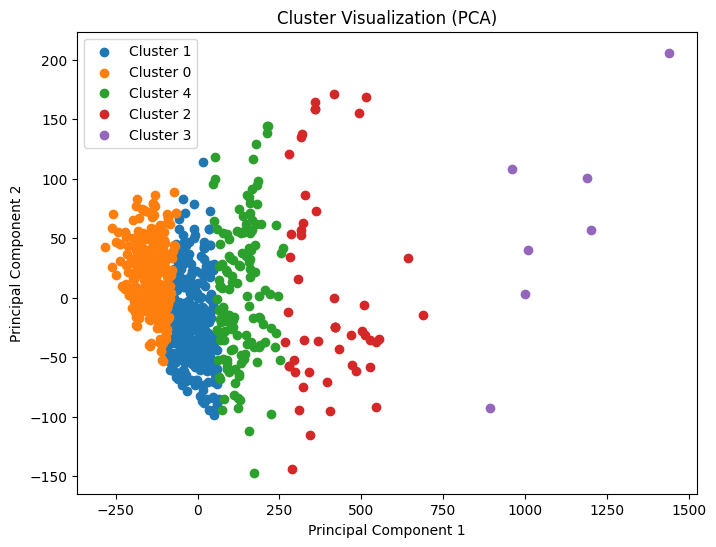

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def visualize_clusters(data_with_clusters):
    # Reduce the dimensionality of the data to 2 dimensions using PCA
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(data_with_clusters.select_dtypes(include=['int', 'float']))

    # Plot the data points with their cluster assignments
    plt.figure(figsize=(8, 6))
    for cluster in data_with_clusters['cluster'].unique():
        plt.scatter(reduced_data[data_with_clusters['cluster'] == cluster, 0],
                    reduced_data[data_with_clusters['cluster'] == cluster, 1],
                    label=f'Cluster {cluster}')
    plt.title('Cluster Visualization (PCA)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.show()

# Visualize clusters
visualize_clusters(data_with_clusters)


In [ ]:
def kmeans_clustering(data, n_clusters):
    # Initialize the KMeans model with the desired number of clusters
    kmeans = KMeans(n_clusters=n_clusters)

    # Fit the model to the numerical data
    kmeans.fit(data.select_dtypes(include=['int', 'float']))

    # Add cluster labels to the original dataframe
    data['cluster'] = kmeans.labels_

    return data

# Assuming 'data' is your dataset and 'n_clusters' is the number of clusters you want
data_with_clusters = kmeans_clustering(train, n_clusters=4)


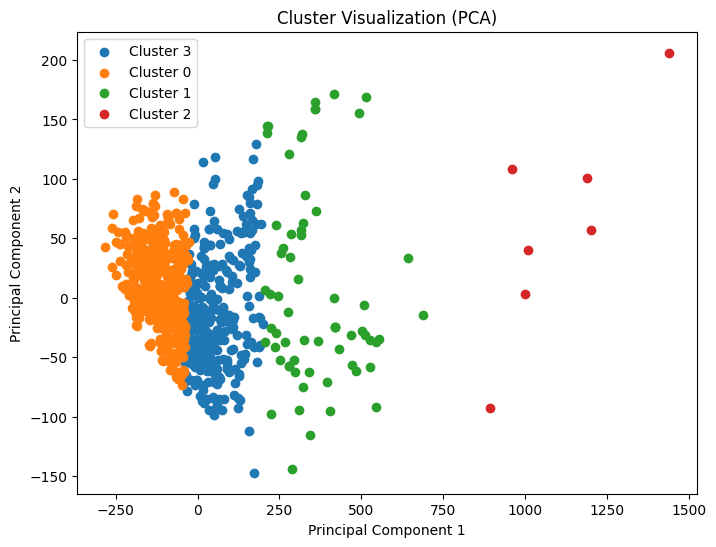

In [ ]:
def visualize_clusters(data_with_clusters):
    # Reduce the dimensionality of the data to 2 dimensions using PCA
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(data_with_clusters.select_dtypes(include=['int', 'float']))

    # Plot the data points with their cluster assignments
    plt.figure(figsize=(8, 6))
    for cluster in data_with_clusters['cluster'].unique():
        plt.scatter(reduced_data[data_with_clusters['cluster'] == cluster, 0],
                    reduced_data[data_with_clusters['cluster'] == cluster, 1],
                    label=f'Cluster {cluster}')
    plt.title('Cluster Visualization (PCA)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.show()

# Visualize clusters
visualize_clusters(data_with_clusters)

In [ ]:
def kmeans_clustering(data, n_clusters):
    # Initialize the KMeans model with the desired number of clusters
    kmeans = KMeans(n_clusters=n_clusters)

    # Fit the model to the numerical data
    kmeans.fit(data.select_dtypes(include=['int', 'float']))

    # Add cluster labels to the original dataframe
    data['cluster'] = kmeans.labels_

    return data

# Assuming 'data' is your dataset and 'n_clusters' is the number of clusters you want
data_with_clusters = kmeans_clustering(train, n_clusters=3)


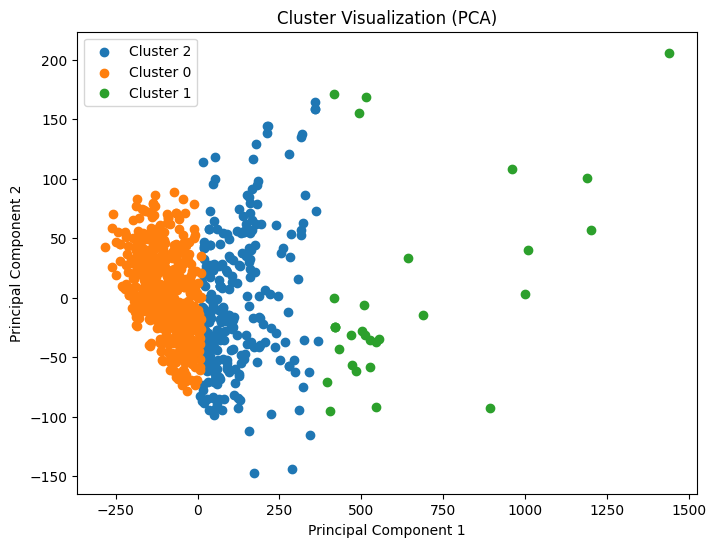

In [ ]:
def visualize_clusters(data_with_clusters):
    # Reduce the dimensionality of the data to 2 dimensions using PCA
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(data_with_clusters.select_dtypes(include=['int', 'float']))

    # Plot the data points with their cluster assignments
    plt.figure(figsize=(8, 6))
    for cluster in data_with_clusters['cluster'].unique():
        plt.scatter(reduced_data[data_with_clusters['cluster'] == cluster, 0],
                    reduced_data[data_with_clusters['cluster'] == cluster, 1],
                    label=f'Cluster {cluster}')
    plt.title('Cluster Visualization (PCA)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.show()

# Visualize clusters
visualize_clusters(data_with_clusters)

In [ ]:
def kmeans_clustering(data, n_clusters):
    # Initialize the KMeans model with the desired number of clusters
    kmeans = KMeans(n_clusters=n_clusters)

    # Fit the model to the numerical data
    kmeans.fit(data.select_dtypes(include=['int', 'float']))

    # Add cluster labels to the original dataframe
    data['cluster'] = kmeans.labels_

    return data

# Assuming 'data' is your dataset and 'n_clusters' is the number of clusters you want
data_with_clusters = kmeans_clustering(train, n_clusters=2)


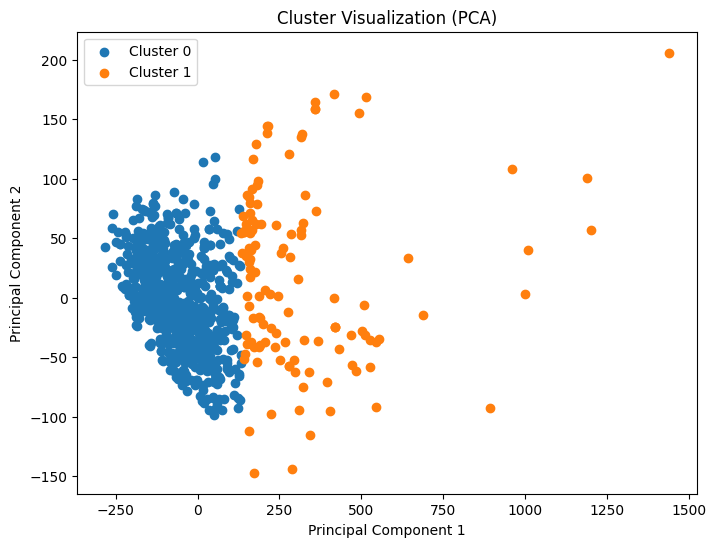

In [ ]:
def visualize_clusters(data_with_clusters):
    # Reduce the dimensionality of the data to 2 dimensions using PCA
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(data_with_clusters.select_dtypes(include=['int', 'float']))

    # Plot the data points with their cluster assignments
    plt.figure(figsize=(8, 6))
    for cluster in data_with_clusters['cluster'].unique():
        plt.scatter(reduced_data[data_with_clusters['cluster'] == cluster, 0],
                    reduced_data[data_with_clusters['cluster'] == cluster, 1],
                    label=f'Cluster {cluster}')
    plt.title('Cluster Visualization (PCA)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.show()

# Visualize clusters
visualize_clusters(data_with_clusters)

Let's find the best K using silhouette plot

For n_clusters = 2 The average silhouette_score is : 0.6246533523307933
For n_clusters = 3 The average silhouette_score is : 0.47778079081386793
For n_clusters = 4 The average silhouette_score is : 0.4541324894186262
For n_clusters = 6 The average silhouette_score is : 0.39440603755409503
For n_clusters = 8 The average silhouette_score is : 0.34669987958207055


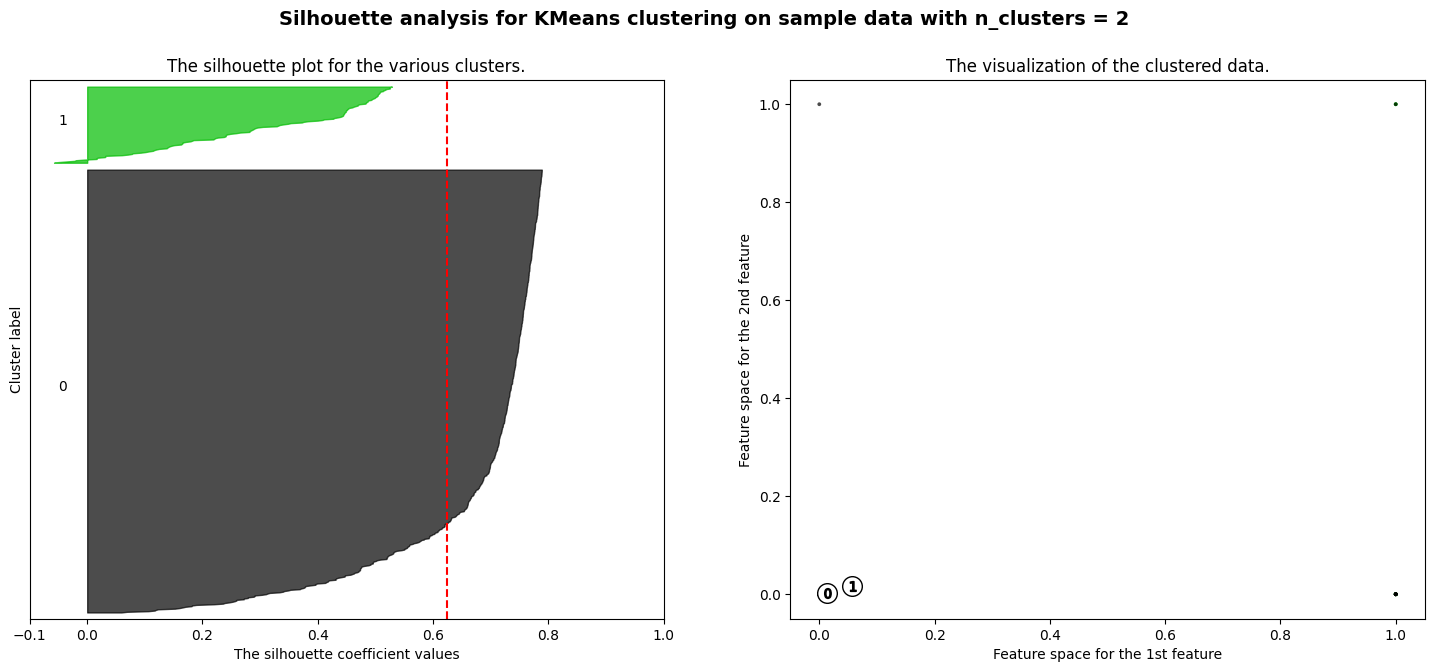

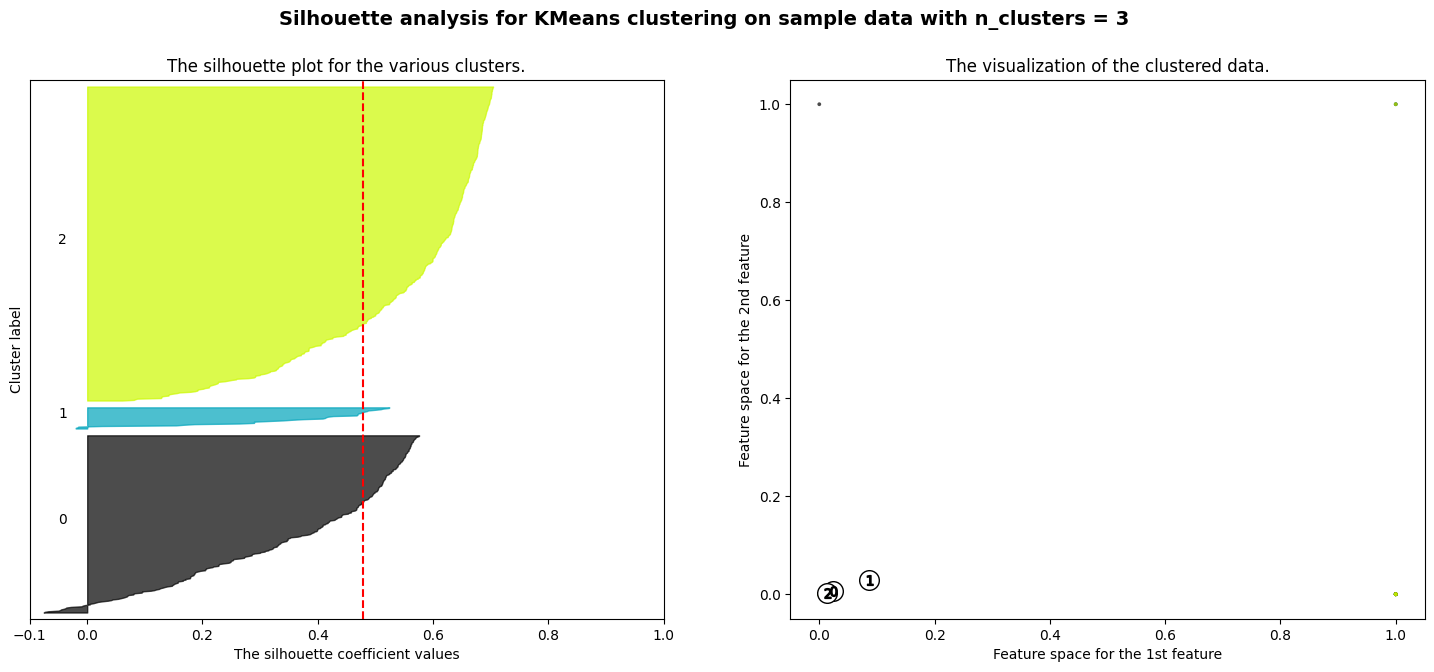

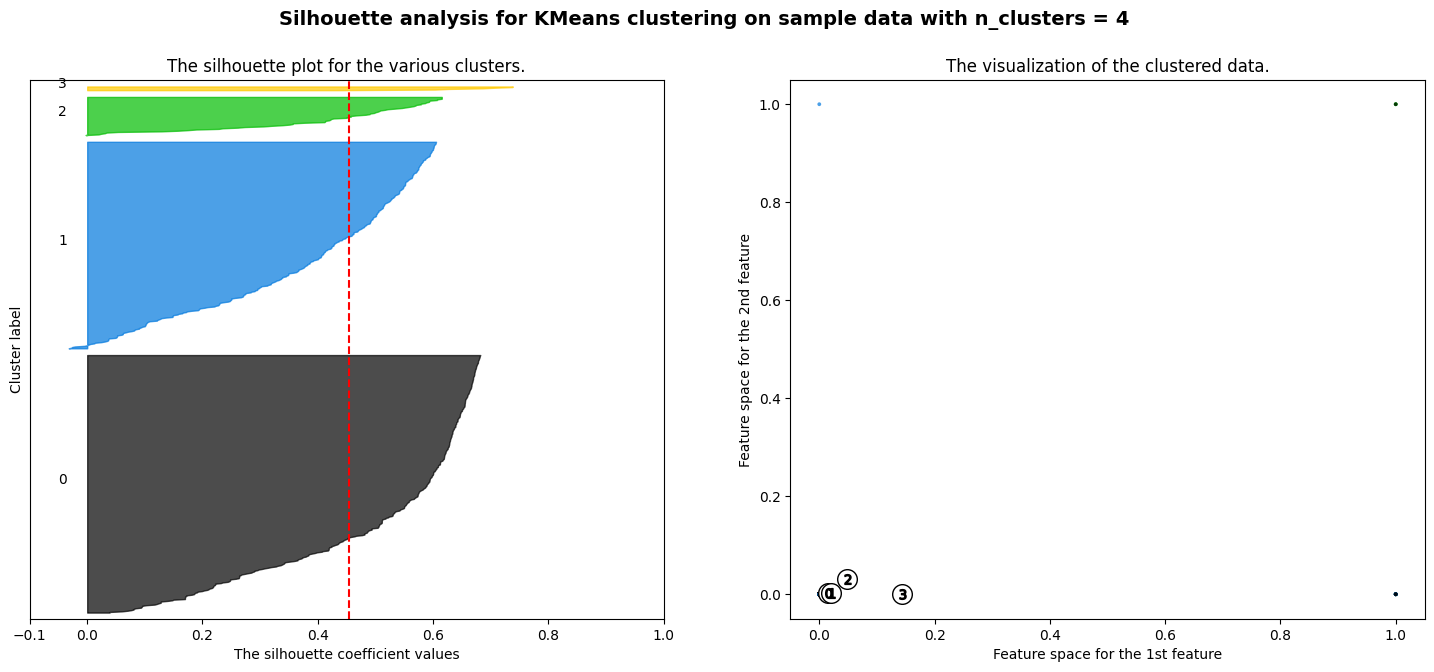

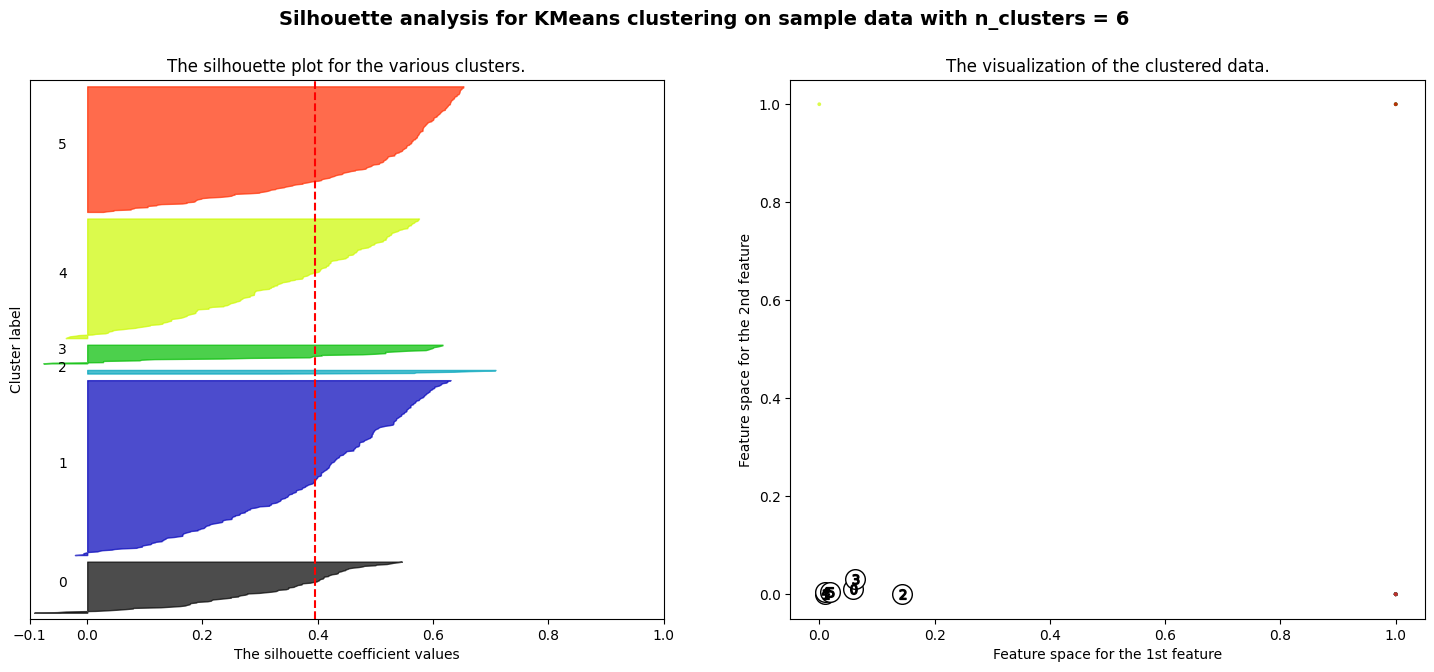

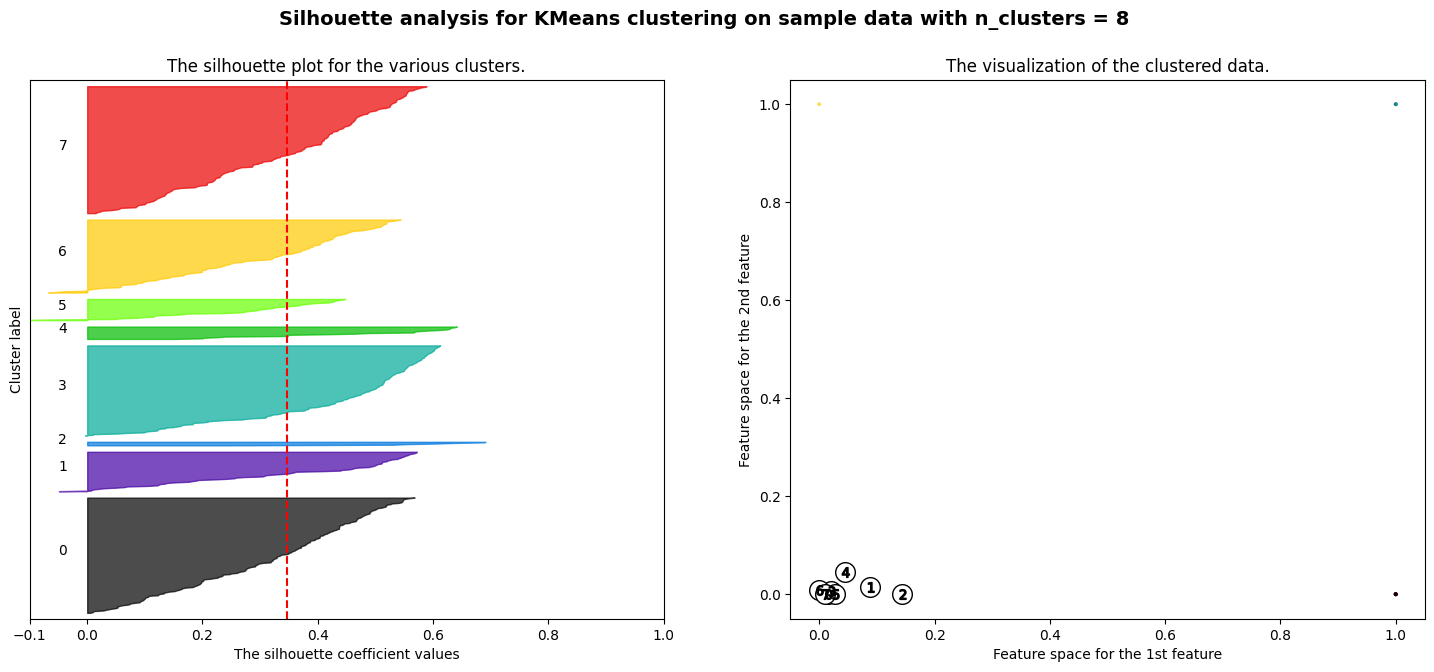

In [ ]:
range_n_clusters = [2, 3, 4, 6, 8]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

So as we can see not a sigle one is perfect but if we have to pick one we'll pick k = 2 or 3